In [89]:
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Convolution
from scipy.ndimage import convolve, generate_binary_structure

# Geometry
h = np.zeros([80, 440])
lhead = 105
rhead = 80

# Left head
h[0,0:200]= lhead
# Right head
h[0,241:439]= rhead

# Error and tolerance
tolerance = 1.E-9
error = 1.0
step = 0

# Residual
residual = np.zeros([80, 440])

(nrows, ncols) = h.shape

while error > tolerance:
    step = step + 1
    # Copy the FDM grid to residual
    residual = h.copy()
    
    for i in range(0, nrows):
        for j in range(0, ncols):
            # Top left side of dam boundary assign head
            if i == 0 and j < 202:
                h[i,j] = lhead
            
            # Top boundary beneath the dam
            elif i == 0 and j > 201 and j < 241:
                h[i,j] = (h[i,j-1]+h[i,j+1]+2*h[i+1,j])/4;
            
            # Top right side of dam boundary assign head
            elif i == 0 and j > 240:
                h[i,j]= rhead
                
            # Left boundary
            elif j == 0 and i > 0 and i < (nrows -1):
                h[i,j]=(h[i-1,j]+h[i+1,j]+2*h[i,j+1])/4

            # Right boundary
            elif j == (ncols -1) and i > 0 and i < (nrows - 1):
                h[i,j]=(2*h[i,j-1]+h[i-1,j]+h[i+1,j])/4
            
            # Left bottom corner
            elif i == (nrows -1) and j == 0:
                h[i,j]=(h[i-1,j]+h[i,j+1])/2
            
            # Bottom boundary
            elif i == (nrows -1) and j > 0 and j < (ncols - 1):
                h[i,j]=(h[i,j-1]+h[i,j+1]+2*h[i-1,j])/4
            
            # Right bottom corner
            elif i == (nrows -1) and  j == (ncols -1):
                h[i,j]=(h[i,j-1]+h[i-1,j])/2
            
            # Domain
            else:
                h[i,j]=(h[i-1,j]+h[i+1,j]+h[i,j-1]+h[i,j+1])/4
                
    error = (np.square(np.subtract(h, residual))).sum()
    print(step, error)


1 466669.17209270486
2 121644.0526415461
3 56227.53855638404
4 33581.41429331586
5 22941.139544434456
6 16969.660928871075
7 13223.660382229218
8 10689.612370090217
9 8879.677380836923
10 7532.835228492208
11 6497.969490389418
12 5682.090145163697
13 5025.125717573846
14 4486.700145104798
15 4038.7650696719015
16 3661.284965166472
17 3339.602099109999
18 3062.7688646545375
19 2822.459317536936
20 2612.239401307419
21 2427.0659496077005
22 2262.9354537904155
23 2116.6331674554494
24 1985.5508398932225
25 1867.552274590119
26 1760.8727830430378
27 1664.043033383375
28 1575.8307044748954
29 1495.1953045097835
30 1421.2528389284173
31 1353.2479285327604
32 1290.5316205691663
33 1232.5435912680832
34 1178.797765795785
35 1128.870619554034
36 1082.391599542017
37 1039.0352341262749
38 998.5145966014538
39 960.5758611977576
40 924.9937459715679
41 891.567679809208
42 860.1185638437415
43 830.486023316344
44 802.52606606724
45 776.1090797235314
46 751.118112241419
47 727.4473904969401
48 705.0

376 34.06881061426599
377 33.937910007530085
378 33.807859897781476
379 33.67865250205052
380 33.55028012943674
381 33.42273517978254
382 33.29601014236808
383 33.17009759462914
384 33.044990200896386
385 32.92068071115603
386 32.797161959831826
387 32.674426864585826
388 32.55246842514133
389 32.43127972212423
390 32.31085391592385
391 32.19118424557315
392 32.072264027646256
393 31.954086655176233
394 31.836645596588596
395 31.719934394654114
396 31.603946665456437
397 31.48867609738044
398 31.37411645011293
399 31.260261553661813
400 31.14710530739135
401 31.0346416790719
402 30.9228647039462
403 30.811768483809047
404 30.701347186104396
405 30.591595043033358
406 30.482506350680396
407 30.37407546815012
408 30.26629681671976
409 30.159164879004347
410 30.052674198135378
411 29.94681937695215
412 29.841595077206506
413 29.736996018778765
414 29.633016978907683
415 29.5296527914309
416 29.4268983460383
417 29.324748587535918
418 29.22319851512271
419 29.12224318167749
420 29.02187769

740 12.86813713734963
741 12.843855206103294
742 12.819658635534342
743 12.79554704179674
744 12.771520043251975
745 12.747577260453633
746 12.723718316130375
747 12.699942835170907
748 12.676250444606666
749 12.652640773597563
750 12.62911345341513
751 12.605668117427525
752 12.58230440108448
753 12.559021941901394
754 12.535820379444658
755 12.512699355316695
756 12.489658513141062
757 12.466697498547859
758 12.44381595915871
759 12.421013544573208
760 12.398289906353817
761 12.375644698011943
762 12.353077574993977
763 12.330588194667367
764 12.308176216306562
765 12.28584130107966
766 12.263583112034508
767 12.241401314085751
768 12.219295574000647
769 12.197265560386898
770 12.175310943678573
771 12.153431396123848
772 12.131626591771873
773 12.109896206459593
774 12.088239917799948
775 12.06665740516865
776 12.04514834969198
777 12.023712434234465
778 12.002349343386493
779 11.98105876345257
780 11.959840382438802
781 11.93869389004157
782 11.917618977635076
783 11.89661533826027

1105 7.639679045566723
1106 7.63164195517424
1107 7.62362572987961
1108 7.615630297441999
1109 7.6076555858974935
1110 7.599701523558024
1111 7.591768039010041
1112 7.583855061113566
1113 7.5759625190005915
1114 7.5680903420742895
1115 7.560238460007608
1116 7.552406802742056
1117 7.544595300486923
1118 7.53680388371743
1119 7.529032483174187
1120 7.521281029861879
1121 7.513549455047849
1122 7.505837690261352
1123 7.4981456672921345
1124 7.490473318189521
1125 7.482820575261058
1126 7.475187371071681
1127 7.467573638442316
1128 7.459979310448914
1129 7.452404320421503
1130 7.444848601942752
1131 7.437312088847201
1132 7.429794715220184
1133 7.422296415396367
1134 7.414817123958986
1135 7.4073567757389815
1136 7.399915305813458
1137 7.392492649504932
1138 7.385088742380283
1139 7.377703520249643
1140 7.370336919165323
1141 7.362988875420853
1142 7.355659325549932
1143 7.348348206325546
1144 7.341055454758662
1145 7.333781008097335
1146 7.3265248038259285
1147 7.319286779663797
1148 7.3

1463 5.690224243283374
1464 5.686547268833562
1465 5.682876766922375
1466 5.679212717679975
1467 5.675555101304971
1468 5.671903898064457
1469 5.668259088293488
1470 5.664620652395087
1471 5.660988570839758
1472 5.657362824165419
1473 5.65374339297714
1474 5.650130257946698
1475 5.646523399812602
1476 5.64292279937985
1477 5.639328437519428
1478 5.6357402951683895
1479 5.632158353329233
1480 5.6285825930701066
1481 5.625012995524266
1482 5.6214495418899215
1483 5.61789221343013
1484 5.614340991472279
1485 5.610795857408133
1486 5.607256792693517
1487 5.6037237788480105
1488 5.600196797454763
1489 5.59667583016034
1490 5.593160858674376
1491 5.589651864769413
1492 5.586148830280655
1493 5.582651737105883
1494 5.579160567204765
1495 5.575675302599377
1496 5.572195925373338
1497 5.568722417671838
1498 5.565254761701501
1499 5.561792939729933
1500 5.558336934085773
1501 5.5548867271582285
1502 5.551442301397024
1503 5.548003639312177
1504 5.544570723473614
1505 5.541143536511158
1506 5.537

1822 4.671124515871042
1823 4.668887013381351
1824 4.66665185993098
1825 4.664419049596001
1826 4.662188576471849
1827 4.659960434673376
1828 4.657734618334738
1829 4.6555111216092095
1830 4.653289938669353
1831 4.65107106370672
1832 4.648854490931949
1833 4.646640214574628
1834 4.6444282288831165
1835 4.642218528124804
1836 4.640011106585671
1837 4.637805958570555
1838 4.635603078402689
1839 4.633402460424165
1840 4.631204098995398
1841 4.629007988495306
1842 4.626814123321106
1843 4.624622497888471
1844 4.622433106631246
1845 4.620245944001325
1846 4.618061004469054
1847 4.615878282522586
1848 4.6136977726681705
1849 4.611519469430014
1850 4.609343367350071
1851 4.607169460988349
1852 4.604997744922347
1853 4.602828213747459
1854 4.600660862076684
1855 4.5984956845405565
1856 4.596332675787026
1857 4.594171830481696
1858 4.5920131433074305
1859 4.589856608964471
1860 4.587702222170392
1861 4.585549977659844
1862 4.583399870184689
1863 4.581251894513964
1864 4.579106045433683
1865 4.5

2182 3.982403211411743
2183 3.98074177727248
2184 3.9790814270360952
2185 3.9774221588060197
2186 3.975763970691395
2187 3.9741068608070456
2188 3.9724508272734727
2189 3.9707958682167868
2190 3.969141981768863
2191 3.967489166066973
2192 3.9658374192541035
2193 3.9641867394788624
2194 3.962537124895344
2195 3.960888573663084
2196 3.959241083947325
2197 3.9575946539187252
2198 3.955949281753441
2199 3.954304965632982
2200 3.9526617037444725
2201 3.951019494280314
2202 3.9493783354383907
2203 3.947738225422003
2204 3.9460991624397552
2205 3.944461144705664
2206 3.9428241704389975
2207 3.941188237864426
2208 3.93955334521189
2209 3.937919490716609
2210 3.936286672619004
2211 3.9346548891649387
2212 3.933024138605267
2213 3.93139441919621
2214 3.929765729199066
2215 3.9281380668804915
2216 3.926511430512096
2217 3.9248858183707336
2218 3.923261228738432
2219 3.921637659902185
2220 3.9200151101542513
2221 3.918393577791737
2222 3.9167730611171283
2223 3.915153558437584
2224 3.9135350680656

2535 3.452395193386153
2536 3.451030270691942
2537 3.4496660112260016
2538 3.448302414278862
2539 3.446939479142844
2540 3.445577205112135
2541 3.444215591482552
2542 3.442854637551686
2543 3.4414943426191713
2544 3.4401347059859604
2545 3.4387757269549595
2546 3.437417404830886
2547 3.4360597389200644
2548 3.434702728530647
2549 3.433346372972388
2550 3.4319906715568598
2551 3.4306356235972895
2552 3.429281228408688
2553 3.427927485307655
2554 3.42657439361256
2555 3.4252219526434096
2556 3.423870161722031
2557 3.422519020171724
2558 3.421168527317606
2559 3.4198186824863694
2560 3.418469485006488
2561 3.4171209342079965
2562 3.415773029422665
2563 3.4144257699837204
2564 3.413079155226259
2565 3.4117331844868595
2566 3.410387857103907
2567 3.4090431724171735
2568 3.4076991297682375
2569 3.406355728500169
2570 3.4050129679577736
2571 3.403670847487361
2572 3.402329366436835
2573 3.4009885241557978
2574 3.399648319995314
2575 3.3983087533081076
2576 3.396969823448507
2577 3.39563152977

2886 3.009875993142317
2887 3.008710124055746
2888 3.0075447470963264
2889 3.0063798619317117
2890 3.0052154682302756
2891 3.0040515656609292
2892 3.002888153893091
2893 3.001725232596927
2894 3.000562801442988
2895 2.9994008601026074
2896 2.9982394082475845
2897 2.997078445550394
2898 2.9959179716839834
2899 2.994757986321847
2900 2.993598489138253
2901 2.9924394798078335
2902 2.991280958005973
2903 2.990122923408494
2904 2.9889653756918264
2905 2.987808314533011
2906 2.9866517396095076
2907 2.9854956505996126
2908 2.984340047181909
2909 2.9831849290356836
2910 2.9820302958408127
2911 2.9808761472776033
2912 2.979722483027032
2913 2.9785693027705684
2914 2.977416606190189
2915 2.976264392968634
2916 2.9751126627888644
2917 2.9739614153347254
2918 2.9728106502904224
2919 2.971660367340673
2920 2.970510566170841
2921 2.9693612464667867
2922 2.9682124079148835
2923 2.9670640502021155
2924 2.965916173015992
2925 2.9647687760444965
2926 2.9636218589761523
2927 2.9624754215000615
2928 2.961

3238 2.6278054195668195
3239 2.6267956313241605
3240 2.6257862451222307
3241 2.6247772607604984
3242 2.623768678038824
3243 2.622760496757095
3244 2.621752716715484
3245 2.6207453377144714
3246 2.6197383595545984
3247 2.618731782036769
3248 2.6177256049620055
3249 2.616719828131667
3250 2.615714451347185
3251 2.614709474410363
3252 2.613704897123016
3253 2.6127007192874703
3254 2.6116969407059534
3255 2.6106935611811437
3256 2.609690580515837
3257 2.608687998513079
3258 2.6076858149760396
3259 2.606684029708245
3260 2.6056826425133073
3261 2.6046816531951937
3262 2.603681061557787
3263 2.6026808674056494
3264 2.601681070543128
3265 2.600681670775075
3266 2.5996826679062486
3267 2.598684061741901
3268 2.597685852087457
3269 2.596688038748401
3270 2.5956906215304976
3271 2.5946936002397827
3272 2.5936969746823584
3273 2.592700744664703
3274 2.5917049099933647
3275 2.590709470475195
3276 2.589714425917189
3277 2.588719776126541
3278 2.5877255209106775
3279 2.5867316600771986
3280 2.585738

3590 2.295871255120152
3591 2.294991922138967
3592 2.294112931285597
3593 2.2932342824132617
3594 2.2923559753754286
3595 2.291478010025646
3596 2.2906003862174757
3597 2.2897231038046777
3598 2.2888461626410495
3599 2.2879695625805443
3600 2.2870933034771803
3601 2.2862173851850813
3602 2.2853418075585425
3603 2.2844665704519067
3604 2.2835916737195685
3605 2.2827171172160257
3606 2.281842900796022
3607 2.2809690243142313
3608 2.280095487625545
3609 2.2792222905848907
3610 2.2783494330472474
3611 2.27747691486788
3612 2.2766047359019446
3613 2.2757328960048646
3614 2.2748613950319636
3615 2.2739902328388726
3616 2.273119409281244
3617 2.272248924214828
3618 2.2713787774953933
3619 2.270508968978964
3620 2.269639498521506
3621 2.2687703659792717
3622 2.2679015712083253
3623 2.267033114065134
3624 2.2661649944061355
3625 2.2652972120878037
3626 2.264429766966728
3627 2.263562658899705
3628 2.262695887743538
3629 2.2618294533551695
3630 2.2609633555915765
3631 2.2600975943098907
3632 2.2

3942 2.0064820634423457
3943 2.005714744211321
3944 2.0049477207809145
3945 2.0041809930322843
3946 2.0034145608465197
3947 2.002648424104903
3948 2.0018825826887263
3949 2.0011170364793793
3950 2.0003517853581845
3951 1.999586829206708
3952 1.998822167906482
3953 1.9980578013390742
3954 1.997293729386171
3955 1.9965299519295168
3956 1.9957664688508359
3957 1.9950032800320154
3958 1.9942403853549382
3959 1.9934777847016245
3960 1.9927154779540122
3961 1.9919534649942445
3962 1.991191745704441
3963 1.9904303199668159
3964 1.9896691876636037
3965 1.988908348677183
3966 1.988147802889943
3967 1.9873875501842244
3968 1.98662759044271
3969 1.9858679235477763
3970 1.9851085493821423
3971 1.9843494678285105
3972 1.9835906787695936
3973 1.9828321820881634
3974 1.9820739776671474
3975 1.9813160653894517
3976 1.9805584451379588
3977 1.9798011167958038
3978 1.9790440802461142
3979 1.978287335371983
3980 1.9775308820565924
3981 1.9767747201832815
3982 1.9760188496354112
3983 1.9752632702962816
398

4289 1.7571925719884487
4290 1.7565211453169869
4291 1.7558499764636806
4292 1.75517906532769
4293 1.7545084118080514
4294 1.75383801580388
4295 1.7531678772144135
4296 1.7524979959388352
4297 1.7518283718764363
4298 1.751159004926526
4299 1.7504898949884586
4300 1.749821041961683
4301 1.7491524457455376
4302 1.7484841062396297
4303 1.7478160233434026
4304 1.7471481969565286
4305 1.7464806269785114
4306 1.7458133133091307
4307 1.745146255848058
4308 1.7444794544950022
4309 1.743812909149782
4310 1.7431466197123264
4311 1.742480586082401
4312 1.7418148081599671
4313 1.741149285845033
4314 1.740484019037577
4315 1.7398190076376747
4316 1.739154251545417
4317 1.7384897506609711
4318 1.7378255048845253
4319 1.7371615141162715
4320 1.7364977782565019
4321 1.7358342972055756
4322 1.735171070863841
4323 1.7345080991317046
4324 1.7338453819095494
4325 1.733182919098025
4326 1.7325207105974747
4327 1.7318587563085988
4328 1.7311970561320393
4329 1.730535609968301
4330 1.7298744177183014
4331 1.

4634 1.5401888906587842
4635 1.5396007041108244
4636 1.5390127429856846
4637 1.538425007195904
4638 1.5378374966543036
4639 1.5372502112736162
4640 1.5366631509666304
4641 1.5360763156461936
4642 1.535489705225287
4643 1.5349033196166126
4644 1.5343171587332756
4645 1.5337312224882396
4646 1.533145510794488
4647 1.5325600235650827
4648 1.5319747607130507
4649 1.5313897221515802
4650 1.5308049077938726
4651 1.5302203175530238
4652 1.5296359513422844
4653 1.5290518090749678
4654 1.5284678906643443
4655 1.5278841960237228
4656 1.5273007250665147
4657 1.5267174777060695
4658 1.5261344538559296
4659 1.5255516534294498
4660 1.5249690763402006
4661 1.5243867225017582
4662 1.523804591827603
4663 1.5232226842314716
4664 1.522640999626952
4665 1.5220595379277035
4666 1.5214782990474602
4667 1.5208972829000842
4668 1.5203164893991772
4669 1.5197359184586925
4670 1.5191555699925074
4671 1.5185754439144847
4672 1.5179955401384606
4673 1.5174158585786008
4674 1.516836399148693
4675 1.516257161762923

4979 1.3500687382298715
4980 1.3495533731156972
4981 1.3490382052982133
4982 1.3485232347013814
4983 1.3480084612491785
4984 1.3474938848656746
4985 1.3469795054749487
4986 1.3464653230010355
4987 1.3459513373680974
4988 1.3454375485002215
4989 1.344923956321663
4990 1.3444105607565908
4991 1.343897361729236
4992 1.3433843591639225
4993 1.3428715529848796
4994 1.3423589431164853
4995 1.3418465294830586
4996 1.341334312008984
4997 1.3408222906187617
4998 1.3403104652367563
4999 1.339798835787439
5000 1.3392874021953856
5001 1.3387761643851095
5002 1.3382651222811635
5003 1.3377542758081022
5004 1.3372436248906598
5005 1.3367331694533495
5006 1.33622290942103
5007 1.3357128447182687
5008 1.3352029752698955
5009 1.3346933010006758
5010 1.3341838218353912
5011 1.3336745376988215
5012 1.333165448515972
5013 1.3326565542116473
5014 1.3321478547108274
5015 1.3316393499383496
5016 1.3311310398192946
5017 1.330622924278645
5018 1.3301150032414497
5019 1.3296072766327793
5020 1.3290997443777486


5325 1.18302482731217
5326 1.182573387019651
5327 1.182122119423235
5328 1.1816710244565245
5329 1.181220102053191
5330 1.1807693521469138
5331 1.180318774671317
5332 1.179868369560214
5333 1.1794181367473517
5334 1.178968076166348
5335 1.1785181877512396
5336 1.1780684714356715
5337 1.1776189271535835
5338 1.1771695548388332
5339 1.1767203544252838
5340 1.1762713258469217
5341 1.175822469037691
5342 1.175373783931525
5343 1.1749252704624358
5344 1.1744769285645213
5345 1.1740287581717814
5346 1.173580759218311
5347 1.1731329316381869
5348 1.172685275365625
5349 1.172237790334739
5350 1.1717904764796963
5351 1.1713433337347723
5352 1.1708963620340942
5353 1.170449561312028
5354 1.1700029315027842
5355 1.169556472540725
5356 1.169110184360232
5357 1.1686640668955772
5358 1.1682181200811441
5359 1.1677723438514662
5360 1.1673267381408585
5361 1.1668813028838267
5362 1.166436038014931
5363 1.1659909434686058
5364 1.1655460191794274
5365 1.1651012650819916
5366 1.1646566811108365
5367 1.16

5673 1.0359035091214097
5674 1.0355083330717327
5675 1.0351133081083415
5676 1.0347184341732452
5677 1.034323711208426
5678 1.033929139156017
5679 1.0335347179579988
5680 1.0331404475565762
5681 1.0327463278938098
5682 1.0323523589118688
5683 1.0319585405529454
5684 1.0315648727591955
5685 1.031171355472822
5686 1.0307779886360577
5687 1.0303847721912183
5688 1.0299917060805757
5689 1.0295987902463801
5690 1.0292060246310077
5691 1.0288134091768169
5692 1.0284209438261138
5693 1.0280286285213638
5694 1.0276364632049306
5695 1.0272444478192642
5696 1.026852582306854
5697 1.0264608666101327
5698 1.0260693006716428
5699 1.0256778844339294
5700 1.0252866178394975
5701 1.024895500830964
5702 1.0245045333508607
5703 1.0241137153417834
5704 1.023723046746483
5705 1.0233325275075533
5706 1.0229421575676787
5707 1.0225519368695486
5708 1.0221618653559401
5709 1.0217719429695435
5710 1.0213821696531733
5711 1.0209925453496635
5712 1.0206030700016842
5713 1.0202137435522067
5714 1.019824565944065

6019 0.9078061493044736
6020 0.9074599367116986
6021 0.9071138564227618
6022 0.9067679083869378
6023 0.9064220925535023
6024 0.9060764088718002
6025 0.9057308572911266
6026 0.905385437760861
6027 0.9050401502303825
6028 0.9046949946490722
6029 0.904349970966308
6030 0.904005079131625
6031 0.903660319094343
6032 0.9033156908039506
6033 0.9029711942100318
6034 0.9026268292619702
6035 0.9022825959093705
6036 0.9019384941018089
6037 0.9015945237887946
6038 0.9012506849199003
6039 0.9009069774447507
6040 0.9005634013129711
6041 0.9002199564742419
6042 0.89987664287814
6043 0.8995334604744766
6044 0.8991904092128411
6045 0.8988474890429862
6046 0.8985046999146717
6047 0.8981620417776189
6048 0.8978195145816626
6049 0.8974771182765809
6050 0.8971348528122233
6051 0.8967927181383072
6052 0.8964507142048523
6053 0.8961088409615657
6054 0.8957670983585176
6055 0.8954254863455097
6056 0.8950840048725205
6057 0.8947426538894907
6058 0.8944014333463681
6059 0.8940603431931734
6060 0.893719383379951

6364 0.7958806164955702
6365 0.7955771670893313
6366 0.7952738335975555
6367 0.7949706159757896
6368 0.7946675141796663
6369 0.7943645281648211
6370 0.794061657886892
6371 0.7937589033015736
6372 0.7934562643644475
6373 0.7931537410313091
6374 0.7928513332578195
6375 0.7925490409997024
6376 0.7922468642126902
6377 0.791944802852627
6378 0.7916428568751962
6379 0.7913410262362471
6380 0.7910393108915635
6381 0.7907377107970655
6382 0.7904362259084802
6383 0.7901348561817167
6384 0.7898336015726365
6385 0.7895324620371721
6386 0.7892314375312732
6387 0.7889305280107712
6388 0.7886297334317133
6389 0.7883290537500374
6390 0.7880284889216849
6391 0.7877280389026363
6392 0.7874277036490391
6393 0.7871274831168342
6394 0.7868273772621045
6395 0.7865273860408188
6396 0.7862275094092075
6397 0.7859277473232942
6398 0.7856280997391878
6399 0.7853285666131103
6400 0.7850291479010945
6401 0.7847298435593927
6402 0.7844306535441459
6403 0.7841315778116116
6404 0.7838326163179341
6405 0.78353376901

6708 0.6980433916304545
6709 0.697777308190974
6710 0.6975113263551247
6711 0.6972454460841553
6712 0.6969796673389599
6713 0.6967139900808493
6714 0.6964484142708547
6715 0.6961829398701924
6716 0.6959175668400363
6717 0.6956522951415502
6718 0.6953871247360093
6719 0.6951220555844826
6720 0.6948570876483375
6721 0.6945922208887771
6722 0.6943274552670229
6723 0.6940627907444605
6724 0.6937982272823013
6725 0.6935337648418638
6726 0.6932694033844988
6727 0.6930051428715049
6728 0.6927409832642559
6729 0.6924769245241029
6730 0.6922129666125074
6731 0.6919491094907549
6732 0.6916853531203023
6733 0.6914216974626247
6734 0.6911581424790848
6735 0.6908946881311624
6736 0.6906313343803865
6737 0.6903680811881554
6738 0.6901049285160317
6739 0.6898418763254859
6740 0.6895789245781039
6741 0.6893160732353859
6742 0.6890533222589447
6743 0.6887906716103012
6744 0.6885281212510498
6745 0.6882656711428451
6746 0.6880033212472029
6747 0.6877410715258914
6748 0.6874789219404687
6749 0.6872168724

7051 0.612485044990395
7052 0.6122516265033564
7053 0.6120182971170652
7054 0.6117850567974423
7055 0.6115519055104105
7056 0.6113188432218668
7057 0.6110858698977972
7058 0.6108529855042152
7059 0.6106201900070148
7060 0.6103874833721594
7061 0.6101548655656691
7062 0.6099223365536242
7063 0.6096898963019224
7064 0.6094575447766704
7065 0.6092252819439206
7066 0.6089931077697239
7067 0.6087610222201563
7068 0.6085290252612937
7069 0.6082971168592983
7070 0.6080652969801786
7071 0.607833565590143
7072 0.6076019226553037
7073 0.6073703681418113
7074 0.6071389020158388
7075 0.6069075242435611
7076 0.606676234791143
7077 0.6064450336248864
7078 0.6062139207109123
7079 0.6059828960154318
7080 0.6057519595047912
7081 0.6055211111451703
7082 0.6052903509029249
7083 0.60505967874419
7084 0.6048290946354029
7085 0.604598598542785
7086 0.6043681904326925
7087 0.6041378702714708
7088 0.6039076380254345
7089 0.6036774936609851
7090 0.6034474371444649
7091 0.6032174684422597
7092 0.602987587520781

7398 0.5366098359407296
7399 0.5364053761593209
7400 0.5362009944002033
7401 0.5359966906334519
7402 0.5357924648293582
7403 0.5355883169580424
7404 0.5353842469896899
7405 0.5351802548945029
7406 0.5349763406427775
7407 0.5347725042045615
7408 0.5345687455502881
7409 0.5343650646500981
7410 0.5341614614742979
7411 0.5339579359931486
7412 0.533754488176921
7413 0.5335511179959577
7414 0.5333478254204992
7415 0.5331446104208927
7416 0.5329414729674764
7417 0.5327384130306244
7418 0.5325354305806136
7419 0.5323325255878524
7420 0.5321296980227066
7421 0.531926947855599
7422 0.5317242750569053
7423 0.5315216795970246
7424 0.5313191614463507
7425 0.5311167205753843
7426 0.5309143569545063
7427 0.5307120705542366
7428 0.5305098613449719
7429 0.5303077292972318
7430 0.5301056743815296
7431 0.5299036965682995
7432 0.5297017958280873
7433 0.5294999721314241
7434 0.5292982254488825
7435 0.5290965557508993
7436 0.5288949630081344
7437 0.5286934471911136
7438 0.5284920082704464
7439 0.52829064621

7740 0.47104319234288483
7741 0.47086374940385867
7742 0.47068437492106524
7743 0.4705050688684117
7744 0.47032583121966354
7745 0.4701466619486942
7746 0.4699675610293754
7747 0.4697885284355975
7748 0.4696095641411802
7749 0.4694306681200785
7750 0.4692518403461207
7751 0.46907308079328996
7752 0.4688943894354364
7753 0.46871576624652467
7754 0.46853721120048436
7755 0.46835872427131736
7756 0.46818030543288397
7757 0.46800195465924355
7758 0.46782367192436225
7759 0.46764545720215556
7760 0.4674673104666764
7761 0.46728923169197384
7762 0.4671112208520048
7763 0.4669332779208623
7764 0.4667554028725044
7765 0.46657759568104873
7766 0.46639985632048814
7767 0.46622218476493704
7768 0.46604458098845114
7769 0.46586704496518594
7770 0.46568957666915556
7771 0.46551217607446893
7772 0.46533484315535734
7773 0.46515757788581774
7774 0.46498038024009175
7775 0.46480325019222046
7776 0.46462618771644704
7777 0.4644491927869285
7778 0.46427226537778993
7779 0.46409540546330946
7780 0.463918

8078 0.4141285600002213
8079 0.4139708267930542
8080 0.41381315374422084
8081 0.4136555408307825
8082 0.4134979880296991
8083 0.4133404953179908
8084 0.4131830626727726
8085 0.4130256900710063
8086 0.41286837748977695
8087 0.41271112490616124
8088 0.41255393229721016
8089 0.4123967996400074
8090 0.41223972691167626
8091 0.41208271408927444
8092 0.41192576114990925
8093 0.4117688680707229
8094 0.4116120348288344
8095 0.41145526140141275
8096 0.4112985477654978
8097 0.41114189389835615
8098 0.41098529977703624
8099 0.4108287653788446
8100 0.4106722906808297
8101 0.4105158756602354
8102 0.41035952029429557
8103 0.4102032245601317
8104 0.41004698843500237
8105 0.4098908118961201
8106 0.40973469492070014
8107 0.40957863748601736
8108 0.4094226395692926
8109 0.40926670114779945
8110 0.4091108221988087
8111 0.40895500269954616
8112 0.40879924262731526
8113 0.40864354195944785
8114 0.40848790067323915
8115 0.40833231874591336
8116 0.4081767961548691
8117 0.4080213328774159
8118 0.4078659288908

8414 0.36437634874126035
8415 0.36423758839251963
8416 0.3640988809531013
8417 0.36396022640279874
8418 0.36382162472130086
8419 0.363683075888521
8420 0.3635445798842458
8421 0.3634061366882676
8422 0.36326774628046127
8423 0.36312940864064625
8424 0.3629911237485891
8425 0.3628528915842673
8426 0.3627147121274258
8427 0.3625765853580036
8428 0.36243851125585824
8429 0.3623004898008069
8430 0.3621625209728893
8431 0.3620246047518379
8432 0.361886741117636
8433 0.36174893005019565
8434 0.36161117152940103
8435 0.36147346553525556
8436 0.36133581204758497
8437 0.3611982110463998
8438 0.36106066251165503
8439 0.36092316642330846
8440 0.3607857227613144
8441 0.3606483315056131
8442 0.36051099263624076
8443 0.36037370613315445
8444 0.36023647197636355
8445 0.36009929014585945
8446 0.35996216062167297
8447 0.3598250833837818
8448 0.35968805841226825
8449 0.3595510856871361
8450 0.359414165188443
8451 0.3592772968962038
8452 0.35914048079053507
8453 0.3590037168514778
8454 0.3588670050590691

8751 0.3204858287575666
8752 0.32036380195985464
8753 0.32024182168026144
8754 0.3201198879009692
8755 0.31999800060429673
8756 0.31987615977243666
8757 0.31975436538765944
8758 0.3196326174322445
8759 0.3195109158884729
8760 0.31938926073856533
8761 0.31926765196486856
8762 0.3191460895496175
8763 0.31902457347515145
8764 0.3189031037237453
8765 0.31878168027770926
8766 0.31866030311941873
8767 0.31853897223113803
8768 0.31841768759522276
8769 0.31829644919398103
8770 0.3181752570097821
8771 0.318054111025013
8772 0.31793301122194645
8773 0.3178119575830064
8774 0.31769095009053044
8775 0.3175699887269482
8776 0.31744907347460394
8777 0.3173282043158862
8778 0.3172073812332141
8779 0.3170866042090018
8780 0.31696587322562514
8781 0.316845188265555
8782 0.3167245493111383
8783 0.3166039563448918
8784 0.3164834093492111
8785 0.31636290830651126
8786 0.31624245319931726
8787 0.31612204401002725
8788 0.3160016807211516
8789 0.31588136331515365
8790 0.31576109177446765
8791 0.3156408660816

9087 0.2819950162667925
9088 0.28188766107933444
9089 0.28178034680820435
9090 0.28167307343774584
9091 0.28156584095233084
9092 0.28145864933636106
9093 0.28135149857429864
9094 0.2812443886504444
9095 0.2811373195492787
9096 0.2810302912551967
9097 0.28092330375260954
9098 0.2808163570259732
9099 0.280709451059701
9100 0.28060258583825987
9101 0.28049576134602916
9102 0.28038897756754416
9103 0.2802822344872201
9104 0.2801755320894833
9105 0.28006887035885303
9106 0.2799622492798196
9107 0.27985566883684043
9108 0.2797491290143869
9109 0.2796426297969649
9110 0.279536171169087
9111 0.27942975311525303
9112 0.2793233756199459
9113 0.27921703866772773
9114 0.2791107422430944
9115 0.27900448633057734
9116 0.2788982709147297
9117 0.2787920959800484
9118 0.2786859615111432
9119 0.27857986749250185
9120 0.2784738139087329
9121 0.278367800744382
9122 0.27826182798397875
9123 0.2781558956122009
9124 0.2780500036135158
9125 0.27794415197260214
9126 0.27783834067399266
9127 0.27773256970233434

9427 0.2477540266190316
9428 0.2476597203874768
9429 0.24756545009154854
9430 0.2474712157174798
9431 0.24737701725158776
9432 0.24728285468011202
9433 0.24718872798943384
9434 0.2470946371658133
9435 0.24700058219554138
9436 0.2469065630649666
9437 0.2468125797604474
9438 0.24671863226826352
9439 0.24662472057474327
9440 0.2465308446662446
9441 0.2464370045291044
9442 0.246343200149682
9443 0.24624943151430242
9444 0.24615569860937703
9445 0.24606200142119009
9446 0.24596833993618616
9447 0.2458747141406732
9448 0.24578112402111063
9449 0.24568756956380994
9450 0.2455940507552175
9451 0.24550056758172342
9452 0.24540712002966275
9453 0.2453137080855011
9454 0.24522033173566005
9455 0.24512699096650564
9456 0.24503368576445847
9457 0.24494041611604428
9458 0.24484718200755473
9459 0.24475398342554675
9460 0.2446608203563776
9461 0.24456769278651713
9462 0.24447460070246754
9463 0.2443815440906107
9464 0.24428852293744086
9465 0.24419553722947637
9466 0.2441025869531041
9467 0.244009672

9762 0.21808932731513875
9763 0.21800632381994106
9764 0.2179233519474115
9765 0.21784041168546014
9766 0.21775750302204833
9767 0.2176746259450733
9768 0.21759178044249033
9769 0.21750896650230078
9770 0.21742618411242437
9771 0.217343433260805
9772 0.21726071393548044
9773 0.21717802612434178
9774 0.21709536981543925
9775 0.21701274499669515
9776 0.21693015165612767
9777 0.21684758978169827
9778 0.21676505936140722
9779 0.21668256038332614
9780 0.216600092835357
9781 0.216517656705529
9782 0.21643525198191876
9783 0.21635287865249844
9784 0.21627053670530866
9785 0.2161882261283171
9786 0.21610594690963786
9787 0.2160236990372424
9788 0.21594148249920034
9789 0.21585929728357434
9790 0.21577714337838916
9791 0.21569502077172156
9792 0.21561292945158972
9793 0.2155308694060922
9794 0.2154488406232763
9795 0.21536684309124646
9796 0.21528487679802638
9797 0.21520294173175986
9798 0.21512103788049783
9799 0.2150391652323344
9800 0.2149573237753364
9801 0.21487551349766165
9802 0.2147937

10091 0.19241860900214877
10092 0.1923453846791409
10093 0.19227218824821693
10094 0.1921990196986979
10095 0.19212587901996467
10096 0.19205276620141337
10097 0.19197968123235093
10098 0.19190662410223328
10099 0.19183359480040166
10100 0.19176059331625048
10101 0.19168761963914036
10102 0.19161467375850688
10103 0.19154175566373527
10104 0.1914688653442066
10105 0.19139600278934715
10106 0.19132316798855933
10107 0.19125036093125886
10108 0.19117758160685477
10109 0.19110483000480025
10110 0.1910321061144598
10111 0.190959409925339
10112 0.19088674142680306
10113 0.19081410060833812
10114 0.1907414874593688
10115 0.19066890196936795
10116 0.19059634412771917
10117 0.19052381392393994
10118 0.19045131134746757
10119 0.19037883638775013
10120 0.19030638903427463
10121 0.19023396927648062
10122 0.19016157710391354
10123 0.19008921250593858
10124 0.19001687547214488
10125 0.18994456599197565
10126 0.1898722840548916
10127 0.1898000296504573
10128 0.18972780276810036
10129 0.1896556033973

10414 0.1701601917176891
10415 0.17009544522168615
10416 0.17003072338442776
10417 0.169966026196454
10418 0.1699013536484027
10419 0.16983670573087714
10420 0.16977208243447928
10421 0.16970748374979866
10422 0.16964290966751938
10423 0.1695783601781584
10424 0.16951383527239947
10425 0.16944933494088926
10426 0.16938485917419124
10427 0.16932040796301137
10428 0.16925598129794206
10429 0.16919157916961308
10430 0.1691272015686814
10431 0.1690628484857833
10432 0.16899851991156523
10433 0.1689342158367242
10434 0.16886993625188218
10435 0.1688056811477088
10436 0.1687414505148991
10437 0.16867724434406645
10438 0.16861306262589124
10439 0.16854890535105294
10440 0.1684847725102627
10441 0.1684206640941914
10442 0.16835658009350118
10443 0.1682925204988907
10444 0.16822848530106713
10445 0.1681644744907217
10446 0.16810048805853756
10447 0.16803652599524083
10448 0.1679725882915209
10449 0.16790867493810502
10450 0.16784478592567342
10451 0.1677809212450055
10452 0.1677170808867973
104

10736 0.1505359113503569
10737 0.15047863819818366
10738 0.15042138685516934
10739 0.15036415731298608
10740 0.15030694956328694
10741 0.15024976359776626
10742 0.15019259940815444
10743 0.1501354569861432
10744 0.15007833632338
10745 0.15002123741162354
10746 0.14996416024257883
10747 0.14990710480792
10748 0.149850071099408
10749 0.14979305910872046
10750 0.1497360688276062
10751 0.14967910024776038
10752 0.14962215336092696
10753 0.14956522815881781
10754 0.1495083246331904
10755 0.14945144277577713
10756 0.14939458257830843
10757 0.14933774403251399
10758 0.1492809271301666
10759 0.1492241318629843
10760 0.14916735822274874
10761 0.14911060620117678
10762 0.14905387579008542
10763 0.14899716698117574
10764 0.14894047976625496
10765 0.14888381413705984
10766 0.14882717008536134
10767 0.14877054760297195
10768 0.14871394668163088
10769 0.1486573673131084
10770 0.14860080948922616
10771 0.148544273201737
10772 0.14848775844244982
10773 0.14843126520314232
10774 0.14837479347565638
107

11056 0.13327798431252658
11057 0.13322728236144848
11058 0.1331765997144353
11059 0.13312593636409473
11060 0.13307529230316054
11061 0.133024667524194
11062 0.13297406201988715
11063 0.1329234757828766
11064 0.132872908805807
11065 0.1328223610813951
11066 0.13277183260226078
11067 0.13272132336101808
11068 0.13267083335041552
11069 0.13262036256309376
11070 0.13256991099172794
11071 0.13251947862895164
11072 0.13246906546750398
11073 0.13241867150005482
11074 0.13236829671927547
11075 0.1323179411178375
11076 0.1322676046884455
11077 0.13221728742379413
11078 0.13216698931656523
11079 0.13211671035946648
11080 0.13206645054520225
11081 0.13201620986649037
11082 0.1319659883159988
11083 0.13191578588646014
11084 0.13186560257057886
11085 0.1318154383610894
11086 0.13176529325066616
11087 0.13171516723205257
11088 0.13166506029800734
11089 0.13161497244119585
11090 0.13156490365437543
11091 0.13151485393028792
11092 0.13146482326163794
11093 0.13141481164117327
11094 0.131364819061677

11376 0.11800000539455528
11377 0.11795511992726174
11378 0.11791025154711746
11379 0.11786540024764162
11380 0.1178205660222997
11381 0.11777574886458989
11382 0.11773094876802648
11383 0.11768616572606268
11384 0.11764139973226705
11385 0.11759665078008018
11386 0.1175519188630409
11387 0.11750720397462835
11388 0.11746250610840445
11389 0.11741782525781823
11390 0.11737316141643639
11391 0.1173285145777482
11392 0.11728388473527904
11393 0.11723927188258285
11394 0.11719467601312253
11395 0.11715009712046269
11396 0.11710553519815536
11397 0.11706099023969947
11398 0.11701646223862955
11399 0.11697195118848006
11400 0.11692745708283091
11401 0.11688297991522226
11402 0.1168385196791342
11403 0.11679407636815357
11404 0.11674964997583952
11405 0.11670524049574434
11406 0.11666084792139013
11407 0.11661647224638474
11408 0.11657211346427007
11409 0.11652777156857565
11410 0.11648344655291176
11411 0.11643913841079266
11412 0.1163948471358295
11413 0.11635057272161846
11414 0.116306315

11695 0.10451434591918062
11696 0.10447459389239164
11697 0.10443485699657393
11698 0.10439513522597024
11699 0.10435542857481221
11700 0.10431573703735202
11701 0.104276060607797
11702 0.104236399280428
11703 0.10419675304944936
11704 0.10415712190915398
11705 0.10411750585375862
11706 0.10407790487753829
11707 0.1040383189747284
11708 0.10399874813959119
11709 0.10395919236640824
11710 0.10391965164940391
11711 0.10388012598286264
11712 0.10384061536105368
11713 0.10380111977822656
11714 0.10376163922867183
11715 0.1037221737066309
11716 0.1036827232064029
11717 0.10364328772226516
11718 0.10360386724848829
11719 0.1035644617793537
11720 0.10352507130914074
11721 0.10348569583214322
11722 0.10344633534263317
11723 0.10340698983490904
11724 0.103367659303267
11725 0.10332834374200514
11726 0.1032890431454132
11727 0.10324975750779009
11728 0.10321048682339987
11729 0.10317123108660481
11730 0.10313199029168872
11731 0.1030927644329379
11732 0.1030535535046779
11733 0.10301435750123711

12016 0.0925005182605067
12017 0.09246533882468624
12018 0.09243017277770342
12019 0.09239502011443466
12020 0.09235988082976693
12021 0.09232475491865079
12022 0.0922896423759509
12023 0.09225454319658086
12024 0.09221945737547907
12025 0.09218438490752867
12026 0.09214932578765947
12027 0.09211428001075585
12028 0.09207924757177552
12029 0.0920442284656065
12030 0.09200922268718228
12031 0.09197423023140261
12032 0.09193925109323271
12033 0.09190428526758235
12034 0.09186933274936679
12035 0.09183439353354114
12036 0.09179946761500934
12037 0.09176455498871755
12038 0.09172965564960626
12039 0.0916947695925874
12040 0.09165989681266072
12041 0.0916250373047282
12042 0.09159019106373387
12043 0.0915553580846232
12044 0.09152053836234136
12045 0.09148573189183752
12046 0.09145093866807802
12047 0.0914161586860208
12048 0.09138139194058945
12049 0.09134663842677254
12050 0.09131189813951836
12051 0.09127717107378559
12052 0.0912424572245383
12053 0.09120775658674045
12054 0.091173069155

12336 0.08189968301086153
12337 0.08186853787647115
12338 0.08183740459410782
12339 0.08180628315926651
12340 0.08177517356740859
12341 0.08174407581403982
12342 0.08171298989462561
12343 0.08168191580470163
12344 0.08165085353972572
12345 0.08161980309521681
12346 0.08158876446666116
12347 0.08155773764956471
12348 0.0815267226394007
12349 0.08149571943172147
12350 0.08146472802199346
12351 0.08143374840575632
12352 0.08140278057845848
12353 0.0813718245356749
12354 0.08134088027286304
12355 0.08130994778557799
12356 0.08127902706932177
12357 0.08124811811958549
12358 0.08121722093194435
12359 0.08118633550184819
12360 0.0811554618248801
12361 0.08112459989652207
12362 0.08109374971230639
12363 0.08106291126778939
12364 0.08103208455846586
12365 0.08100126957987619
12366 0.08097046632756022
12367 0.0809396747970254
12368 0.08090889498384453
12369 0.08087812688353077
12370 0.08084737049162313
12371 0.08081662580368054
12372 0.08078589281521698
12373 0.0807551715217939
12374 0.080724461

12657 0.07248688991584215
12658 0.07245932654332263
12659 0.0724317736586388
12660 0.0724042312577939
12661 0.07237669933679795
12662 0.07234917789163944
12663 0.0723216669183568
12664 0.07229416641295829
12665 0.07226667637144688
12666 0.07223919678983363
12667 0.07221172766414553
12668 0.07218426899040534
12669 0.07215682076460328
12670 0.07212938298279734
12671 0.07210195564100136
12672 0.07207453873521513
12673 0.0720471322614896
12674 0.07201973621584735
12675 0.07199235059431529
12676 0.07196497539291062
12677 0.07193761060767637
12678 0.07191025623466149
12679 0.07188291226987069
12680 0.0718555787093567
12681 0.07182825554915376
12682 0.0718009427852987
12683 0.07177364041383551
12684 0.07174634843081197
12685 0.07171906683224942
12686 0.07169179561423222
12687 0.07166453477278659
12688 0.07163728430394019
12689 0.0716100442037538
12690 0.07158281446830188
12691 0.07155559509362427
12692 0.07152838607577594
12693 0.07150118741079303
12694 0.07147399909476262
12695 0.07144682112

12978 0.06415653461550969
12979 0.06413214076703419
12980 0.06410775619941045
12981 0.06408338090907056
12982 0.0640590148925118
12983 0.06403465814620676
12984 0.06401031066659696
12985 0.06398597245017672
12986 0.06396164349340977
12987 0.06393732379277503
12988 0.06391301334474425
12989 0.06388871214581023
12990 0.06386442019241007
12991 0.06384013748105867
12992 0.06381586400823269
12993 0.06379159977041723
12994 0.06376734476407836
12995 0.06374309898570768
12996 0.06371886243179588
12997 0.06369463509884216
12998 0.06367041698331097
12999 0.06364620808170401
13000 0.0636220083905032
13001 0.06359781790622854
13002 0.06357363662534464
13003 0.06354946454435205
13004 0.0635253016597826
13005 0.06350114796808587
13006 0.06347700346578829
13007 0.06345286814938104
13008 0.06342874201536162
13009 0.06340462506024955
13010 0.06338051728053798
13011 0.06335641867273992
13012 0.06333232923335023
13013 0.06330824895889811
13014 0.06328417784589231
13015 0.06326011589082514
13016 0.0632360

13291 0.0569570527263957
13292 0.056935397845896206
13293 0.056913751203385515
13294 0.05689211279567428
13295 0.05687048261966267
13296 0.05684886067220165
13297 0.05682724695016012
13298 0.05680564145040684
13299 0.0567840441698024
13300 0.056762455105225346
13301 0.05674087425356912
13302 0.056719301611672164
13303 0.05669773717642605
13304 0.05667618094471905
13305 0.056654632913387
13306 0.056633093079359875
13307 0.056611561439475155
13308 0.05659003799062365
13309 0.05656852272969328
13310 0.05654701565357344
13311 0.0565255167591388
13312 0.05650402604326487
13313 0.05648254350285432
13314 0.05646106913479459
13315 0.056439602935955964
13316 0.05641814490323835
13317 0.05639669503354918
13318 0.056375253323750416
13319 0.0563538197707638
13320 0.056332394371454826
13321 0.056310977122733086
13322 0.05628956802151948
13323 0.05626816706468969
13324 0.056246774249115665
13325 0.05622538957172756
13326 0.0562040130294577
13327 0.05618264461915351
13328 0.056161284337742416
13329 0

13605 0.05054667652930711
13606 0.05052746017294388
13607 0.05050825112615805
13608 0.05048904938621121
13609 0.05046985495028503
13610 0.05045066781563838
13611 0.05043148797944256
13612 0.050412315438944824
13613 0.05039315019138755
13614 0.05037399223396186
13615 0.05035484156391219
13616 0.05033569817845866
13617 0.0503165620748361
13618 0.05029743325023199
13619 0.05027831170193539
13620 0.05025919742714622
13621 0.050240090423088996
13622 0.05022099068701428
13623 0.050201898216137096
13624 0.050182813007695865
13625 0.050163735058935253
13626 0.050144664367088955
13627 0.05012560092938776
13628 0.050106544743078255
13629 0.05008749580539962
13630 0.050068454113585
13631 0.0500494196648828
13632 0.05003039245653152
13633 0.050011372485782406
13634 0.04999235974987245
13635 0.0499733542460401
13636 0.04995435597156134
13637 0.04993536492364281
13638 0.049916381099567905
13639 0.049897404496560056
13640 0.049878435111906455
13641 0.04985947294282632
13642 0.04984051798658166
13643 

13918 0.04487519142072903
13919 0.044858132312621764
13920 0.04484107969297291
13921 0.044824033559251866
13922 0.044806993909058
13923 0.044789960739869114
13924 0.04477293404924111
13925 0.044755913834723486
13926 0.044738900093805795
13927 0.0447218928240738
13928 0.04470489202302841
13929 0.044687897688235695
13930 0.04467090981723716
13931 0.04465392840751347
13932 0.044636953456675205
13933 0.04461998496222695
13934 0.04460302292171599
13935 0.04458606733269596
13936 0.04456911819271747
13937 0.0445521754993218
13938 0.04453523925001657
13939 0.04451830944239397
13940 0.044501386073984184
13941 0.044484469142337967
13942 0.04446755864501303
13943 0.044450654579563265
13944 0.044433756943522695
13945 0.04441686573444984
13946 0.04439998094992063
13947 0.04438310258744988
13948 0.044366230644620766
13949 0.04434936511898113
13950 0.04433250600809623
13951 0.044315653309510976
13952 0.04429880702079599
13953 0.04428196713951766
13954 0.044265133663212566
13955 0.044248306589477926
1

14232 0.03982522296596153
14233 0.03981008453194605
14234 0.0397949518553291
14235 0.039779824933928225
14236 0.03976470376555645
14237 0.039749588348014495
14238 0.03973447867914161
14239 0.039719374756705964
14240 0.03970427657854296
14241 0.03968918414247384
14242 0.03967409744629752
14243 0.039659016487858884
14244 0.039643941264941994
14245 0.03962887177536488
14246 0.03961380801696045
14247 0.03959874998753743
14248 0.03958369768493305
14249 0.03956865110695207
14250 0.03955361025141891
14251 0.039538575116159234
14252 0.03952354569898243
14253 0.03950852199773465
14254 0.03949350401022038
14255 0.03947849173427909
14256 0.03946348516771861
14257 0.03944848430839336
14258 0.03943348915410736
14259 0.03941849970270558
14260 0.03940351595200034
14261 0.03938853789984825
14262 0.039373565544050415
14263 0.03935859888246039
14264 0.03934363791289692
14265 0.03932868263320717
14266 0.039313733041230016
14267 0.03929878913476743
14268 0.03928385091168454
14269 0.03926891836981373
14270

14549 0.03530351791220276
14550 0.035290099090141566
14551 0.035276685371075554
14552 0.035263276753053734
14553 0.035249873234141596
14554 0.03523647481238172
14555 0.03522308148583337
14556 0.035209693252580276
14557 0.03519631011067984
14558 0.03518293205818069
14559 0.03516955909313051
14560 0.035156191213646694
14561 0.035142828417756344
14562 0.03512947070352514
14563 0.03511611806902285
14564 0.03510277051232174
14565 0.03508942803148922
14566 0.035076090624581356
14567 0.03506275828967608
14568 0.035049431024861785
14569 0.035036108828176815
14570 0.035022791697708784
14571 0.03500947963152673
14572 0.034996172627707975
14573 0.03498287068432903
14574 0.03496957379945735
14575 0.034956281971157493
14576 0.03494299519751616
14577 0.034929713476620466
14578 0.034916436806526126
14579 0.034903165185329266
14580 0.03488989861111259
14581 0.034876637081934225
14582 0.03486338059587849
14583 0.03485012915104978
14584 0.034836882745495845
14585 0.0348236413773299
14586 0.0348104050446

14864 0.031319228049884275
14865 0.031307324337249295
14866 0.03129542515107629
14867 0.031283530489636724
14868 0.03127164035121009
14869 0.03125975473405739
14870 0.031247873636492025
14871 0.0312359970567741
14872 0.03122412499317616
14873 0.031212257444002377
14874 0.031200394407511996
14875 0.03118853588199294
14876 0.03117668186574452
14877 0.031164832357051354
14878 0.031152987354169517
14879 0.031141146855416295
14880 0.031129310859052815
14881 0.03111747936337872
14882 0.031105652366690974
14883 0.031093829867263993
14884 0.031082011863385682
14885 0.031070198353347015
14886 0.031058389335451422
14887 0.031046584807979595
14888 0.031034784769206163
14889 0.031022989217449413
14890 0.031011198150989364
14891 0.03099941156812184
14892 0.030987629467148708
14893 0.030975851846351467
14894 0.030964078704031
14895 0.030952310038476216
14896 0.030940545848000718
14897 0.03092878613088313
14898 0.030917030885426293
14899 0.030905280109944526
14900 0.030893533802720825
14901 0.0308817

15176 0.02781648882377819
15177 0.027805916998784784
15178 0.027795349193482505
15179 0.02778478540634189
15180 0.02777422563585617
15181 0.02776366988047307
15182 0.027753118138676657
15183 0.027742570408917307
15184 0.027732026689710077
15185 0.027721486979502385
15186 0.02771095127677036
15187 0.027700419579996666
15188 0.027689891887638853
15189 0.027679368198200178
15190 0.02766884851014193
15191 0.027658332821948642
15192 0.027647821132085984
15193 0.02763731343905001
15194 0.027626809741303604
15195 0.027616310037341454
15196 0.027605814325629155
15197 0.027595322604662607
15198 0.02758483487291534
15199 0.02757435112888289
15200 0.027563871371011597
15201 0.027553395597822748
15202 0.02754292380778621
15203 0.02753245599938458
15204 0.0275219921711161
15205 0.027511532321445244
15206 0.027501076448874888
15207 0.02749062455188269
15208 0.027480176628962738
15209 0.027469732678602497
15210 0.02745929269927774
15211 0.02744885668949502
15212 0.027438424647738602
15213 0.027427996

15485 0.024733840884086356
15486 0.024724441125472073
15487 0.024715044940645966
15488 0.02470565232824495
15489 0.024696263286921132
15490 0.02468687781531482
15491 0.024677495912066298
15492 0.024668117575821998
15493 0.024658742805219167
15494 0.024649371598902205
15495 0.024640003955511584
15496 0.024630639873706985
15497 0.02462127935212984
15498 0.024611922389399715
15499 0.024602568984192295
15500 0.024593219135152628
15501 0.024583872840904034
15502 0.024574530100122186
15503 0.024565190911435004
15504 0.024555855273497375
15505 0.024546523184965377
15506 0.02453719464447961
15507 0.024527869650698163
15508 0.02451854820226834
15509 0.024509230297842157
15510 0.02449991593606259
15511 0.02449060511560003
15512 0.02448129783508593
15513 0.024471994093186213
15514 0.024462693888560438
15515 0.02445339721984669
15516 0.024444104085715207
15517 0.02443481448480316
15518 0.02442552841579536
15519 0.024416245877326936
15520 0.024406966868053465
15521 0.024397691386628364
15522 0.0243

15793 0.02200130677587434
15794 0.02199294589382807
15795 0.02198458819037839
15796 0.021976233664312384
15797 0.021967882314423065
15798 0.02195953413951751
15799 0.02195118913836252
15800 0.02194284730977576
15801 0.021934508652540534
15802 0.021926173165442743
15803 0.021917840847286176
15804 0.02190951169686435
15805 0.021901185712970804
15806 0.021892862894397014
15807 0.02188454323994557
15808 0.021876226748399084
15809 0.021867913418578886
15810 0.021859603249265662
15811 0.021851296239257724
15812 0.021842992387362887
15813 0.021834691692352404
15814 0.021826394153076495
15815 0.021818099768279763
15816 0.021809808536796354
15817 0.02180152045741466
15818 0.021793235528935424
15819 0.021784953750173364
15820 0.021776675119906934
15821 0.021768399636955392
15822 0.021760127300109466
15823 0.021751858108199417
15824 0.021743592059996746
15825 0.021735329154322438
15826 0.021727069389979495
15827 0.021718812765763235
15828 0.021710559280495506
15829 0.021702308932969056
15830 0.02

16102 0.01956333067235667
16103 0.01955589661840875
16104 0.01954846539051377
16105 0.01954103698760028
16106 0.019533611408602422
16107 0.01952618865243301
16108 0.019518768718027747
16109 0.019511351604313595
16110 0.01950393731021282
16111 0.01949652583466667
16112 0.019489117176578436
16113 0.019481711334895215
16114 0.019474308308552186
16115 0.01946690809644808
16116 0.01945951069752584
16117 0.01945211611073041
16118 0.019444724334985272
16119 0.019437335369213795
16120 0.01942994921235801
16121 0.01942256586334191
16122 0.01941518532109437
16123 0.01940780758456315
16124 0.019400432652654565
16125 0.019393060524334132
16126 0.019385691198498915
16127 0.019378324674115672
16128 0.019370960950104606
16129 0.019363600025411383
16130 0.019356241898948603
16131 0.01934888656966872
16132 0.019341534036513498
16133 0.01933418429840497
16134 0.019326837354273478
16135 0.01931949320309079
16136 0.019312151843755208
16137 0.019304813275228982
16138 0.01929747749644542
16139 0.01929014450

16414 0.01737578088404904
16415 0.017369178402646634
16416 0.017362578431009877
16417 0.01735598096820955
16418 0.017349386013272718
16419 0.017342793565254744
16420 0.017336203623207452
16421 0.017329616186165443
16422 0.017323031253177787
16423 0.017316448823298542
16424 0.01730986889557733
16425 0.017303291469052955
16426 0.017296716542787284
16427 0.017290144115816166
16428 0.017283574187198416
16429 0.017277006755975235
16430 0.01727044182120168
16431 0.017263879381925216
16432 0.01725731943720691
16433 0.0172507619860945
16434 0.017244207027627037
16435 0.017237654560873145
16436 0.017231104584872186
16437 0.01722455709867285
16438 0.01721801210135727
16439 0.017211469591948407
16440 0.017204929569514523
16441 0.017198392033103093
16442 0.01719185698175815
16443 0.017185324414576972
16444 0.017178794330564077
16445 0.0171722667288028
16446 0.017165741608348863
16447 0.01715921896824452
16448 0.01715269880756155
16449 0.017146181125343815
16450 0.017139665920656168
16451 0.0171331

16724 0.015444657912241769
16725 0.015438789480927737
16726 0.015432923280247226
16727 0.015427059309319872
16728 0.01542119756731156
16729 0.015415338053387465
16730 0.015409480766677742
16731 0.01540362570634979
16732 0.015397772871549278
16733 0.015391922261436044
16734 0.015386073875154498
16735 0.015380227711875229
16736 0.015374383770737566
16737 0.015368542050900838
16738 0.015362702551523862
16739 0.015356865271760722
16740 0.015351030210766503
16741 0.01534519736769617
16742 0.015339366741711529
16743 0.015333538331960606
16744 0.015327712137604673
16745 0.015321888157809922
16746 0.015316066391715708
16747 0.015310246838489004
16748 0.015304429497304982
16749 0.01529861436729546
16750 0.0152928014476377
16751 0.015286990737483217
16752 0.015281182235982727
16753 0.015275375942327779
16754 0.01526957185564418
16755 0.015263769975102297
16756 0.015257970299877136
16757 0.015252172829117725
16758 0.015246377561990099
16759 0.015240584497654048
16760 0.01523479363526518
16761 0.0

17033 0.013733445394565915
17034 0.013728227384254953
17035 0.013723011357224316
17036 0.013717797312709916
17037 0.013712585249957982
17038 0.013707375168226305
17039 0.013702167066754624
17040 0.013696960944787347
17041 0.013691756801579386
17042 0.013686554636364284
17043 0.013681354448410905
17044 0.01367615623694909
17045 0.013670960001236632
17046 0.013665765740525004
17047 0.01366057345404625
17048 0.013655383141071831
17049 0.01365019480084054
17050 0.013645008432589374
17051 0.01363982403558928
17052 0.013634641609082123
17053 0.013629461152320803
17054 0.013624282664553343
17055 0.013619106145039278
17056 0.013613931593019268
17057 0.013608759007744914
17058 0.013603588388473902
17059 0.013598419734468962
17060 0.013593253044960427
17061 0.013588088319212762
17062 0.013582925556475847
17063 0.013577764756003646
17064 0.013572605917063968
17065 0.013567449038890195
17066 0.01356229412074761
17067 0.013557141161890001
17068 0.01355199016157696
17069 0.013546841119046592
17070 0

17339 0.012225818030988158
17340 0.012221173028632376
17341 0.012216529791657202
17342 0.012211888319403704
17343 0.012207248611198417
17344 0.012202610666377562
17345 0.01219797448425699
17346 0.012193340064169382
17347 0.012188707405450508
17348 0.012184076507432588
17349 0.012179447369433653
17350 0.012174819990799942
17351 0.01217019437085176
17352 0.012165570508928346
17353 0.01216094840435596
17354 0.01215632805646543
17355 0.012151709464594639
17356 0.012147092628063436
17357 0.012142477546222285
17358 0.012137864218381752
17359 0.012133252643904425
17360 0.012128642822099217
17361 0.012124034752304141
17362 0.01211942843385971
17363 0.012114823866095576
17364 0.012110221048344826
17365 0.012105619979950768
17366 0.012101020660236866
17367 0.012096423088540994
17368 0.01209182726421425
17369 0.012087233186561807
17370 0.012082640854940239
17371 0.012078050268692686
17372 0.012073461427133916
17373 0.012068874329611174
17374 0.012064288975468268
17375 0.012059705364028107
17376 0

17646 0.010879609510614651
17647 0.010875476138337396
17648 0.010871344336923142
17649 0.010867214105766857
17650 0.010863085444279323
17651 0.010858958351852365
17652 0.010854832827899636
17653 0.01085070887181252
17654 0.010846586483012711
17655 0.010842465660892125
17656 0.010838346404854182
17657 0.010834228714309318
17658 0.010830112588660174
17659 0.010825998027317223
17660 0.010821885029671017
17661 0.0108177735951341
17662 0.01081366372312632
17663 0.010809555413035242
17664 0.010805448664266956
17665 0.010801343476244034
17666 0.01079723984835641
17667 0.010793137780020659
17668 0.010789037270635515
17669 0.01078493831961648
17670 0.010780840926369523
17671 0.010776745090303283
17672 0.010772650810818352
17673 0.010768558087326584
17674 0.01076446691924574
17675 0.010760377305967022
17676 0.010756289246914807
17677 0.01075220274148685
17678 0.010748117789105343
17679 0.010744034389168215
17680 0.010739952541089122
17681 0.010735872244276167
17682 0.010731793498140534
17683 0.0

17954 0.009677999353123915
17955 0.009674322632784574
17956 0.00967064730969507
17957 0.009666973383301636
17958 0.009663300853100906
17959 0.009659629718546335
17960 0.009655959979104822
17961 0.00965229163424881
17962 0.009648624683451491
17963 0.009644959126183543
17964 0.009641294961903982
17965 0.0096376321901053
17966 0.009633970810236469
17967 0.009630310821779004
17968 0.009626652224200132
17969 0.009622995016970934
17970 0.009619339199565416
17971 0.009615684771459038
17972 0.009612031732117608
17973 0.009608380081013761
17974 0.009604729817612921
17975 0.00960108094140201
17976 0.009597433451841605
17977 0.009593787348411851
17978 0.009590142630584171
17979 0.009586499297825412
17980 0.009582857349621285
17981 0.00957921678543382
17982 0.009575577604744763
17983 0.009571939807023165
17984 0.009568303391747829
17985 0.009564668358387363
17986 0.009561034706419416
17987 0.00955740243531974
17988 0.009553771544561582
17989 0.009550142033625031
17990 0.0095465139019755
17991 0.00

18263 0.008605868666474755
18264 0.00860259937166597
18265 0.0085993313192138
18266 0.008596064508642387
18267 0.008592798939470504
18268 0.008589534611228307
18269 0.008586271523457064
18270 0.00858300967567066
18271 0.008579749067405593
18272 0.008576489698189905
18273 0.008573231567546129
18274 0.008569974675015003
18275 0.008566719020117188
18276 0.00856346460238591
18277 0.008560211421344655
18278 0.008556959476529484
18279 0.008553708767466204
18280 0.008550459293691989
18281 0.008547211054731007
18282 0.008543964050115323
18283 0.008540718279377196
18284 0.008537473742052683
18285 0.00853423043765388
18286 0.008530988365733804
18287 0.008527747525809037
18288 0.008524507917420664
18289 0.008521269540098842
18290 0.008518032393373098
18291 0.008514796476773357
18292 0.008511561789834454
18293 0.008508328332089098
18294 0.008505096103074147
18295 0.008501865102317208
18296 0.008498635329357084
18297 0.008495406783713851
18298 0.008492179464936302
18299 0.008488953372551997
18300 0

18572 0.007652540573525495
18573 0.0076496335405129325
18574 0.007646727612129776
18575 0.0076438227879688765
18576 0.007640919067607074
18577 0.0076380164506216755
18578 0.007635114936598564
18579 0.007632214525116206
18580 0.007629315215749758
18581 0.007626417008088324
18582 0.007623519901708798
18583 0.0076206238961943895
18584 0.007617728991126593
18585 0.007614835186087313
18586 0.007611942480662265
18587 0.007609050874417162
18588 0.007606160366954419
18589 0.007603270957844566
18590 0.0076003826466698845
18591 0.007597495433020189
18592 0.007594609316473305
18593 0.0075917242966192944
18594 0.0075888403730289475
18595 0.00758595754529867
18596 0.007583075812994862
18597 0.007580195175717477
18598 0.007577315633041553
18599 0.0075744371845560925
18600 0.007571559829839428
18601 0.007568683568483556
18602 0.0075658084000657586
18603 0.00756293432417434
18604 0.007560061340387827
18605 0.007557189448304779
18606 0.007554318647491992
18607 0.007551448937550068
18608 0.0075485803180

18879 0.00681001880411623
18880 0.00680743191244296
18881 0.0068048460037126845
18882 0.006802261077556179
18883 0.006799677133600761
18884 0.006797094171470169
18885 0.006794512190779347
18886 0.006791931191170969
18887 0.00678935117227738
18888 0.006786772133713923
18889 0.006784194075103554
18890 0.006781616996083832
18891 0.006779040896277956
18892 0.006776465775317491
18893 0.006773891632821219
18894 0.006771318468432336
18895 0.006768746281766182
18896 0.006766175072457633
18897 0.006763604840135922
18898 0.006761035584420124
18899 0.006758467304947916
18900 0.006755900001348869
18901 0.006753333673242691
18902 0.006750768320272349
18903 0.006748203942056424
18904 0.0067456405382288805
18905 0.006743078108417914
18906 0.006740516652254882
18907 0.006737956169366451
18908 0.006735396659379451
18909 0.006732838121942044
18910 0.006730280556661913
18911 0.0067277239631821344
18912 0.00672516834113289
18913 0.006722613690138836
18914 0.006720060009837364
18915 0.006717507299856963
18

19183 0.006067190455736036
19184 0.006064885811828402
19185 0.006062582043590924
19186 0.006060279150678083
19187 0.006057977132762859
19188 0.006055675989514003
19189 0.006053375720592786
19190 0.006051076325672819
19191 0.006048777804420768
19192 0.006046480156505255
19193 0.006044183381589378
19194 0.006041887479344597
19195 0.006039592449444931
19196 0.006037298291553553
19197 0.006035005005331863
19198 0.006032712590458403
19199 0.006030421046603625
19200 0.006028130373427962
19201 0.006025840570604573
19202 0.0060235516378030676
19203 0.006021263574691497
19204 0.006018976380942745
19205 0.0060166900562221275
19206 0.006014404600199547
19207 0.006012120012548292
19208 0.006009836292935884
19209 0.006007553441029695
19210 0.006005271456504662
19211 0.006002990339032948
19212 0.006000710088278607
19213 0.005998430703915418
19214 0.005996152185612118
19215 0.005993874533044317
19216 0.005991597745875586
19217 0.005989321823786746
19218 0.0059870467664402734
19219 0.00598477257350370

19488 0.005403355076688435
19489 0.005401302655764467
19490 0.0053992510146313195
19491 0.005397200152999553
19492 0.005395150070570826
19493 0.00539310076706024
19494 0.0053910522421531555
19495 0.005389004495568783
19496 0.005386957526999435
19497 0.005384911336159288
19498 0.00538286592275066
19499 0.005380821286473
19500 0.005378777427032774
19501 0.005376734344143221
19502 0.005374692037493606
19503 0.005372650506799693
19504 0.0053706097517626054
19505 0.005368569772093797
19506 0.005366530567488776
19507 0.005364492137662003
19508 0.005362454482308445
19509 0.005360417601150406
19510 0.005358381493876314
19511 0.005356346160204078
19512 0.005354311599834555
19513 0.005352277812470818
19514 0.0053502447978229116
19515 0.005348212555596865
19516 0.005346181085496115
19517 0.005344150387239203
19518 0.0053421204605205806
19519 0.00534009130504386
19520 0.005338062920526096
19521 0.00533603530667061
19522 0.00533400846318492
19523 0.005331982389776661
19524 0.005329957086148498
1952

19793 0.004812169302217171
19794 0.004810341492316616
19795 0.004808514376855671
19796 0.004806687955562233
19797 0.004804862228164564
19798 0.004803037194408665
19799 0.004801212854034625
19800 0.004799389206769674
19801 0.004797566252357551
19802 0.004795743990529264
19803 0.004793922421030642
19804 0.004792101543582314
19805 0.00479028135793501
19806 0.004788461863822863
19807 0.004786643060981597
19808 0.004784824949150354
19809 0.004783007528065313
19810 0.004781190797460703
19811 0.004779374757078029
19812 0.00477755940665485
19813 0.004775744745928451
19814 0.004773930774637705
19815 0.004772117492517584
19816 0.0047703048993084675
19817 0.004768492994752061
19818 0.0047666817785793104
19819 0.004764871250529128
19820 0.004763061410344075
19821 0.004761252257762132
19822 0.004759443792521623
19823 0.0047576360143562835
19824 0.00475582892301912
19825 0.004754022518233603
19826 0.004752216799747248
19827 0.004750411767292951
19828 0.0047486074206167204
19829 0.004746803759459941


20098 0.0042856800553535915
20099 0.0042840522685397625
20100 0.004282425100141565
20101 0.0042807985499274765
20102 0.004279172617649217
20103 0.00427754730308772
20104 0.004275922605998542
20105 0.004274298526150775
20106 0.004272675063312025
20107 0.004271052217238535
20108 0.004269429987708723
20109 0.004267808374478741
20110 0.0042661873773149695
20111 0.004264566995992481
20112 0.004262947230267702
20113 0.004261328079908923
20114 0.0042597095446822355
20115 0.004258091624354709
20116 0.004256474318693779
20117 0.004254857627464162
20118 0.004253241550429547
20119 0.004251626087362792
20120 0.004250011238026841
20121 0.004248397002190396
20122 0.004246783379620336
20123 0.004245170370077538
20124 0.004243557973336844
20125 0.004241946189161477
20126 0.0042403350173209325
20127 0.00423872445758127
20128 0.004237114509706726
20129 0.004235505173465533
20130 0.0042338964486331905
20131 0.004232288334973971
20132 0.004230680832244932
20133 0.004229073940225222
20134 0.004227467658684

20401 0.0038197062055109103
20402 0.003818255444403976
20403 0.0038168052344385453
20404 0.0038153555754084916
20405 0.0038139064670961523
20406 0.0038124579092973713
20407 0.0038110099018052283
20408 0.0038095624444056623
20409 0.0038081155368937213
20410 0.0038066691790579876
20411 0.0038052233706900177
20412 0.003803778111576722
20413 0.0038023334015153286
20414 0.0038008892403006826
20415 0.0037994456277161567
20416 0.0037980025635538034
20417 0.0037965600476110454
20418 0.0037951180796760506
20419 0.0037936766595388152
20420 0.003792235786993785
20421 0.003790795461832537
20422 0.003789355683846591
20423 0.003787916452828392
20424 0.003786477768570084
20425 0.0037850396308611854
20426 0.0037836020394980997
20427 0.0037821649942734624
20428 0.0037807284949747796
20429 0.003779292541396367
20430 0.0037778571333364755
20431 0.003776422270582132
20432 0.0037749879529288496
20433 0.0037735541801626723
20434 0.0037721209520820537
20435 0.0037706882684848753
20436 0.0037692561291563904
2

20702 0.0034069947631681237
20703 0.0034057007876644257
20704 0.003404407303714981
20705 0.0034031143111460157
20706 0.0034018218097648044
20707 0.003400529799382668
20708 0.003399238279817524
20709 0.003397947250880425
20710 0.003396656712389802
20711 0.003395366664147397
20712 0.003394077105981515
20713 0.0033927880376915676
20714 0.0033914994591060688
20715 0.0033902113700292535
20716 0.0033889237702744743
20717 0.0033876366596615522
20718 0.00338635003800139
20719 0.0033850639051073387
20720 0.003383778260796458
20721 0.0033824931048825994
20722 0.0033812084371783414
20723 0.0033799242574985944
20724 0.0033786405656608324
20725 0.003377357361470701
20726 0.0033760746447570695
20727 0.0033747924153201964
20728 0.003373510672987421
20729 0.0033722294175663687
20730 0.0033709486488732207
20731 0.003369668366724434
20732 0.0033683885709293736
20733 0.003367109261315147
20734 0.003365830437683764
20735 0.0033645520998575188
20736 0.003363274247655836
20737 0.0033619968808815755
20738 0.

21000 0.003042349925938917
21001 0.0030411944713187506
21002 0.0030400394556257763
21003 0.0030388848786891643
21004 0.0030377307403434096
21005 0.0030365770404260847
21006 0.00303542377876425
21007 0.003034270955200955
21008 0.003033118569559285
21009 0.0030319666216742152
21010 0.003030815111386642
21011 0.003029664038524428
21012 0.0030285134029220165
21013 0.003027363204417151
21014 0.003026213442836292
21015 0.0030250641180199858
21016 0.0030239152298042523
21017 0.003022766778011259
21018 0.003021618762485655
21019 0.003020471183063318
21020 0.0030193240395672565
21021 0.0030181773318457995
21022 0.0030170310597218203
21023 0.003015885223033257
21024 0.003014739821617606
21025 0.0030135948553083993
21026 0.0030124503239398917
21027 0.003011306227342623
21028 0.003010162565358752
21029 0.003009019337818654
21030 0.0030078765445594744
21031 0.0030067341854114263
21032 0.0030055922602151013
21033 0.0030044507688048493
21034 0.003003309711011808
21035 0.003002169086675165
21036 0.003

21302 0.0027126152534732466
21303 0.0027115850540748478
21304 0.0027105552460154232
21305 0.0027095258291348814
21306 0.00270849680328798
21307 0.002707468168332303
21308 0.0027064399241099046
21309 0.0027054120704785595
21310 0.0027043846072883028
21311 0.0027033575343902647
21312 0.002702330851637093
21313 0.0027013045588751994
21314 0.0027002786559656993
21315 0.0026992531427579456
21316 0.0026982280190985543
21317 0.002697203284841118
21318 0.002696178939842058
21319 0.002695154983948565
21320 0.002694131417017606
21321 0.0026931082389000313
21322 0.002692085449442053
21323 0.002691063048502398
21324 0.002690041035929686
21325 0.0026890194115809967
21326 0.002687998175308389
21327 0.0026869773269566485
21328 0.0026859568663869238
21329 0.002684936793449639
21330 0.0026839171079987303
21331 0.0026828978098820833
21332 0.002681878898953027
21333 0.0026808603750711375
21334 0.0026798422380856614
21335 0.002678824487844674
21336 0.0026778071242104847
21337 0.002676790147026452
21338 0.

21602 0.0024204625258212507
21603 0.0024195433020688757
21604 0.0024186244274820834
21605 0.002417705901928422
21606 0.002416787725277754
21607 0.0024158698973935694
21608 0.002414952418147446
21609 0.0024140352874038595
21610 0.002413118505037057
21611 0.0024122020708990046
21612 0.0024112859848714908
21613 0.00241037024681649
21614 0.0024094548566045574
21615 0.0024085398141037422
21616 0.002407625119178371
21617 0.002406710771699725
21618 0.0024057967715343646
21619 0.0024048831185491514
21620 0.002403969812617519
21621 0.002403056853599957
21622 0.00240214424136824
21623 0.0024012319757909803
21624 0.002400320056737795
21625 0.002399408484073334
21626 0.0023984972576709786
21627 0.0023975863773955707
21628 0.0023966758431130356
21629 0.0023957656546994203
21630 0.0023948558120178826
21631 0.0023939463149360283
21632 0.002393037163327356
21633 0.002392128357056154
21634 0.0023912198959959957
21635 0.0023903117800095084
21636 0.0023894040089721654
21637 0.002388496582748458
21638 0.0

21902 0.0021597807801739177
21903 0.002158960574696147
21904 0.0021581406807645695
21905 0.0021573210982566106
21906 0.0021565018270631392
21907 0.002155682867054905
21908 0.0021548642181211533
21909 0.0021540458801406876
21910 0.0021532278529927404
21911 0.0021524101365651502
21912 0.0021515927307374145
21913 0.0021507756353890796
21914 0.002149958850405259
21915 0.0021491423756677085
21916 0.0021483262110556216
21917 0.0021475103564554546
21918 0.0021466948117472816
21919 0.0021458795768108403
21920 0.002145064651532535
21921 0.0021442500357948596
21922 0.0021434357294798376
21923 0.002142621732463843
21924 0.002141808044636014
21925 0.002140994665878923
21926 0.0021401815960706526
21927 0.0021393688350969655
21928 0.002138556382842075
21929 0.0021377442391828367
21930 0.0021369324040101958
21931 0.0021361208771987707
21932 0.002135309658637803
21933 0.002134498748207799
21934 0.0021336881457883388
21935 0.002132877851266685
21936 0.0021320678645243753
21937 0.0021312581854443795
219

22202 0.0019271791519726259
22203 0.0019264472961710692
22204 0.0019257157183452983
22205 0.00192498441839412
22206 0.0019242533962115491
22207 0.0019235226516882218
22208 0.0019227921847200578
22209 0.0019220619952063538
22210 0.001921332083038779
22211 0.001920602448110706
22212 0.0019198730903150123
22213 0.0019191440095503412
22214 0.0019184152057113183
22215 0.0019176866786911092
22216 0.0019169584283844736
22217 0.0019162304546867749
22218 0.0019155027574936834
22219 0.001914775336697943
22220 0.0019140481921975144
22221 0.0019133213238839509
22222 0.0019125947316552525
22223 0.0019118684154018819
22224 0.0019111423750272133
22225 0.0019104166104212724
22226 0.0019096911214772825
22227 0.0019089659080957844
22228 0.0019082409701685087
22229 0.0019075163075916903
22230 0.0019067919202593797
22231 0.0019060678080720986
22232 0.0019053439709149898
22233 0.0019046204086964097
22234 0.0019038971213029415
22235 0.0019031741086333895
22236 0.0019024513705850478
22237 0.00190172890704594

22499 0.0017215927998763712
22500 0.0017209390302979893
22501 0.0017202855090338997
22502 0.001719632235989217
22503 0.0017189792110675868
22504 0.0017183264341758225
22505 0.0017176739052206051
22506 0.0017170216241033055
22507 0.001716369590734716
22508 0.0017157178050222334
22509 0.001715066266863986
22510 0.001714414976176588
22511 0.001713763932854891
22512 0.001713113136809218
22513 0.001712462587952651
22514 0.001711812286180618
22515 0.0017111622314042669
22516 0.0017105124235325666
22517 0.0017098628624653545
22518 0.0017092135481110253
22519 0.0017085644803787692
22520 0.0017079156591711436
22521 0.0017072670843981867
22522 0.0017066187559658713
22523 0.0017059706737741639
22524 0.001705322837739177
22525 0.0017046752477590044
22526 0.0017040279037447033
22527 0.0017033808056052626
22528 0.0017027339532405803
22529 0.0017020873465629443
22530 0.0017014409854745687
22531 0.0017007948698848985
22532 0.0017001489997020209
22533 0.0016995033748306262
22534 0.0016988579951745001
2

22799 0.0015361900724337391
22800 0.0015356067210125885
22801 0.0015350235911526396
22802 0.001534440682767615
22803 0.0015338579957765042
22804 0.0015332755300931403
22805 0.001532693285633999
22806 0.0015321112623161868
22807 0.0015315294600551888
22808 0.001530947878764068
22809 0.0015303665183634542
22810 0.0015297853787680008
22811 0.0015292044598896547
22812 0.001528623761650893
22813 0.0015280432839648043
22814 0.001527463026746619
22815 0.0015268829899116652
22816 0.0015263031733828076
22817 0.0015257235770689819
22818 0.0015251442008913448
22819 0.0015245650447637382
22820 0.0015239861086030026
22821 0.0015234073923261317
22822 0.0015228288958488837
22823 0.0015222506190863921
22824 0.0015216725619572337
22825 0.0015210947243807684
22826 0.001520517106267025
22827 0.0015199397075379183
22828 0.0015193625281063443
22829 0.0015187855678943363
22830 0.0015182088268115145
22831 0.001517632304781965
22832 0.0015170560017147546
22833 0.0015164799175333803
22834 0.0015159040521518195

23095 0.0013728410684658127
23096 0.0013723197573301442
23097 0.001371798644186182
23098 0.0013712777289614662
23099 0.0013707570115768512
23100 0.0013702364919613266
23101 0.0013697161700372993
23102 0.0013691960457286063
23103 0.0013686761189624836
23104 0.0013681563896638868
23105 0.0013676368577550196
23106 0.0013671175231636874
23107 0.0013665983858140226
23108 0.0013660794456320465
23109 0.001365560702538692
23110 0.0013650421564646168
23111 0.0013645238073335525
23112 0.0013640056550680748
23113 0.0013634876995967697
23114 0.0013629699408424603
23115 0.0013624523787302274
23116 0.0013619350131882425
23117 0.0013614178441377698
23118 0.0013609008715081018
23119 0.0013603840952195044
23120 0.0013598675152032885
23121 0.0013593511313826502
23122 0.0013588349436827612
23123 0.0013583189520286305
23124 0.001357803156344085
23125 0.0013572875565599112
23126 0.0013567721525970442
23127 0.0013562569443830305
23128 0.0013557419318424538
23129 0.0013552271149035705
23130 0.001354712493490

23390 0.0012273303195498393
23391 0.0012268642723257575
23392 0.0012263984021009776
23393 0.0012259327088075666
23394 0.0012254671923799516
23395 0.0012250018527491862
23396 0.001224536689848292
23397 0.0012240717036113829
23398 0.0012236068939694856
23399 0.001223142260857516
23400 0.0012226778042066242
23401 0.0012222135239506552
23402 0.0012217494200246455
23403 0.001221285492357374
23404 0.0012208217408837287
23405 0.0012203581655392422
23406 0.001219894766254142
23407 0.0012194315429627084
23408 0.0012189684955965362
23409 0.001218505624091263
23410 0.001218042928377712
23411 0.0012175804083898749
23412 0.0012171180640612271
23413 0.001216655895327845
23414 0.0012161939021156077
23415 0.0012157320843647265
23416 0.001215270442005906
23417 0.001214808974973897
23418 0.001214347683199207
23419 0.0012138865666200737
23420 0.001213425625163816
23421 0.0012129648587703404
23422 0.001212504267368937
23423 0.0012120438508935562
23424 0.0012115836092791389
23425 0.001211123542457033
23426

23687 0.0010964117872855053
23688 0.001095995460763907
23689 0.0010955792923539333
23690 0.0010951632819945966
23691 0.0010947474296285498
23692 0.0010943317351947385
23693 0.0010939161986316939
23694 0.0010935008198810822
23695 0.0010930855988830037
23696 0.0010926705355770961
23697 0.0010922556299021295
23698 0.001091840881800449
23699 0.0010914262912112209
23700 0.001091011858073434
23701 0.0010905975823294284
23702 0.0010901834639201603
23703 0.001089769502782098
23704 0.0010893556988571089
23705 0.001088942052087837
23706 0.0010885285624131352
23707 0.0010881152297690425
23708 0.0010877020541032558
23709 0.0010872890353505421
23710 0.0010868761734545553
23711 0.0010864634683553128
23712 0.0010860509199900773
23713 0.001085638528305667
23714 0.0010852262932348324
23715 0.001084814214723759
23716 0.0010844022927112217
23717 0.0010839905271373272
23718 0.0010835789179418549
23719 0.0010831674650676605
23720 0.0010827561684530818
23721 0.0010823450280408602
23722 0.0010819340437709676

23985 0.000979088363593285
23986 0.0009787165935352241
23987 0.000978344964662205
23988 0.0009779734769246162
23989 0.000977602130264843
23990 0.000977230924634542
23991 0.0009768598599743774
23992 0.0009764889362344726
23993 0.0009761181533608628
23994 0.0009757475112974418
23995 0.0009753770099951615
23996 0.0009750066493986197
23997 0.0009746364294529559
23998 0.0009742663501041586
23999 0.0009738964113015672
24000 0.0009735266129898655
24001 0.0009731569551184901
24002 0.0009727874376296536
24003 0.0009724180604732541
24004 0.0009720488235951026
24005 0.0009716797269415085
24006 0.000971310770461905
24007 0.0009709419540975556
24008 0.0009705732778005431
24009 0.0009702047415163667
24010 0.0009698363451873436
24011 0.0009694680887667043
24012 0.0009690999721984441
24013 0.0009687319954283498
24014 0.0009683641584063173
24015 0.0009679964610758467
24016 0.0009676289033876208
24017 0.0009672614852838933
24018 0.0009668942067170747
24019 0.0009665270676310548
24020 0.00096616006797187

24282 0.0008746532078470499
24283 0.00087432109871803
24284 0.0008739891157100834
24285 0.0008736572587767947
24286 0.0008733255278721118
24287 0.0008729939229457456
24288 0.0008726624439494839
24289 0.0008723310908352641
24290 0.0008719998635588861
24291 0.0008716687620685358
24292 0.000871337786318213
24293 0.0008710069362596294
24294 0.0008706762118443248
24295 0.000870345613025866
24296 0.000870015139756008
24297 0.0008696847919858011
24298 0.0008693545696721864
24299 0.0008690244727614347
24300 0.0008686945012106577
24301 0.0008683646549687431
24302 0.0008680349339916747
24303 0.000867705338228368
24304 0.0008673758676323824
24305 0.0008670465221558608
24306 0.0008667173017559696
24307 0.0008663882063762062
24308 0.0008660592359773546
24309 0.000865730390508065
24310 0.0008654016699196848
24311 0.0008650730741674877
24312 0.000864744603205362
24313 0.0008644162569804961
24314 0.0008640880354512099
24315 0.0008637599385659164
24316 0.0008634319662799074
24317 0.0008631041185450176


24579 0.000781359222068872
24580 0.0007810625420580483
24581 0.00078076597471381
24582 0.0007804695199882557
24583 0.0007801731778468876
24584 0.0007798769482388576
24585 0.0007795808311285555
24586 0.0007792848264664563
24587 0.0007789889342155237
24588 0.0007786931543277995
24589 0.0007783974867691973
24590 0.0007781019314854721
24591 0.0007778064884427313
24592 0.0007775111575950321
24593 0.0007772159388989586
24594 0.0007769208323152481
24595 0.0007766258377988278
24596 0.0007763309553066534
24597 0.0007760361847967517
24598 0.0007757415262274991
24599 0.0007754469795557247
24600 0.0007751525447397108
24601 0.0007748582217353996
24602 0.0007745640105018183
24603 0.0007742699109955272
24604 0.0007739759231732509
24605 0.0007736820469949496
24606 0.000773388282416373
24607 0.0007730946293956291
24608 0.0007728010878915698
24609 0.0007725076578594896
24610 0.0007722143392601138
24611 0.0007719211320466897
24612 0.0007716280361807714
24613 0.0007713350516205058
24614 0.0007710421783198

24874 0.0006985480255118999
24875 0.0006982827930352482
24876 0.0006980176612791672
24877 0.0006977526302071404
24878 0.0006974876997793906
24879 0.0006972228699561572
24880 0.000696958140702805
24881 0.0006966935119773003
24882 0.0006964289837456148
24883 0.0006961645559660762
24884 0.0006959002286022143
24885 0.0006956360016141331
24886 0.0006953718749667542
24887 0.0006951078486214394
24888 0.0006948439225370286
24889 0.0006945800966766508
24890 0.00069431637100344
24891 0.0006940527454793495
24892 0.000693789220066959
24893 0.0006935257947244759
24894 0.0006932624694189796
24895 0.0006929992441066311
24896 0.000692736118756749
24897 0.0006924730933274576
24898 0.0006922101677781598
24899 0.0006919473420733309
24900 0.0006916846161784285
24901 0.0006914219900503156
24902 0.0006911594636527024
24903 0.000690897036950615
24904 0.0006906347099001137
24905 0.0006903724824703686
24906 0.0006901103546185478
24907 0.0006898483263107566
24908 0.0006895863975026454
24909 0.000689324568163486

25171 0.0006240404325465766
25172 0.0006238034937360369
25173 0.0006235666448985751
25174 0.0006233298860029267
25175 0.0006230932170135943
25176 0.000622856637894289
25177 0.0006226201486160813
25178 0.0006223837491405669
25179 0.0006221474394347443
25180 0.0006219112194658764
25181 0.000621675089198208
25182 0.0006214390485970354
25183 0.0006212030976295366
25184 0.0006209672362627616
25185 0.0006207314644603996
25186 0.0006204957821900435
25187 0.0006202601894196325
25188 0.0006200246861075491
25189 0.0006197892722284474
25190 0.0006195539477453983
25191 0.0006193187126214073
25192 0.0006190835668256386
25193 0.0006188485103236253
25194 0.0006186135430832538
25195 0.0006183786650676463
25196 0.0006181438762441168
25197 0.0006179091765790692
25198 0.0006176745660363437
25199 0.0006174400445864978
25200 0.0006172056121909333
25201 0.0006169712688198832
25202 0.0006167370144362596
25203 0.0006165028490089721
25204 0.0006162687725030903
25205 0.0006160347848847338
25206 0.00061580088612

25469 0.0005572691973564753
25470 0.0005570576138869499
25471 0.000556846110761229
25472 0.0005566346879484035
25473 0.0005564233454214456
25474 0.0005562120831460249
25475 0.0005560009010946533
25476 0.0005557897992342443
25477 0.0005555787775381766
25478 0.0005553678359720811
25479 0.0005551569745069761
25480 0.0005549461931115797
25481 0.0005547354917567779
25482 0.0005545248704104216
25483 0.0005543143290453617
25484 0.0005541038676277067
25485 0.0005538934861295707
25486 0.0005536831845207523
25487 0.0005534729627681095
25488 0.0005532628208440671
25489 0.0005530527587176999
25490 0.000552842776355582
25491 0.0005526328737332152
25492 0.0005524230508150125
25493 0.0005522133075742788
25494 0.0005520036439783228
25495 0.0005517940599995165
25496 0.0005515845556051927
25497 0.0005513751307658839
25498 0.0005511657854520948
25499 0.0005509565196315412
25500 0.0005507473332767658
25501 0.0005505382263551331
25502 0.0005503291988392207
25503 0.0005501202506950347
25504 0.00054991138189

25765 0.0004980213332230818
25766 0.0004978322477770365
25767 0.000497643234130301
25768 0.0004974542922575175
25769 0.0004972654221305163
25770 0.000497076623720885
25771 0.0004968878970027955
25772 0.0004966992419486598
25773 0.0004965106585328971
25774 0.0004963221467232998
25775 0.0004961337064989605
25776 0.0004959453378287489
25777 0.0004957570406867388
25778 0.0004955688150444874
25779 0.0004953806608771752
25780 0.0004951925781552913
25781 0.00049500456685325
25782 0.0004948166269442897
25783 0.0004946287583997672
25784 0.0004944409611938715
25785 0.0004942532352979728
25786 0.0004940655806853372
25787 0.0004938779973305286
25788 0.0004936904852057697
25789 0.0004935030442828481
25790 0.000493315674535272
25791 0.0004931283759371404
25792 0.0004929411484616129
25793 0.0004927539920795606
25794 0.0004925669067644419
25795 0.0004923798924916
25796 0.0004921929492306273
25797 0.0004920060769573049
25798 0.0004918192756430578
25799 0.0004916325452604031
25800 0.0004914458857848279


26055 0.00044608856812580343
26056 0.0004459192025979512
26057 0.00044574990138161285
26058 0.00044558066445180987
26059 0.00044541149178440524
26060 0.0004452423833533821
26061 0.0004450733391364894
26062 0.0004449043591099427
26063 0.00044473544324547963
26064 0.00044456659152246466
26065 0.00044439780391489594
26066 0.0004442290803985925
26067 0.00044406042094936675
26068 0.0004438918255428385
26069 0.00044372329415659376
26070 0.000443554826761383
26071 0.00044338642333706423
26072 0.00044321808386004716
26073 0.0004430498083022158
26074 0.0004428815966431947
26075 0.0004427134488547903
26076 0.0004425453649168665
26077 0.0004423773448014169
26078 0.0004422093884872676
26079 0.0004420414959493437
26080 0.0004418736671611348
26081 0.0004417059021023134
26082 0.0004415382007437149
26083 0.00044137056306591807
26084 0.00044120298904257367
26085 0.00044103547864952143
26086 0.00044086803186333334
26087 0.0004407006486581804
26088 0.00044053332901337905
26089 0.0004403660729003666
26090

26347 0.0003992685334427978
26348 0.00039911694611157074
26349 0.00039896541634097953
26350 0.00039881394410705147
26351 0.0003986625293877496
26352 0.0003985111721629645
26353 0.00039835987240983896
26354 0.0003982086301062681
26355 0.0003980574452320734
26356 0.0003979063177621435
26357 0.00039775524767900666
26358 0.000397604234957474
26359 0.0003974532795774368
26360 0.00039730238151633023
26361 0.0003971515407525788
26362 0.00039700075726446717
26363 0.0003968500310319528
26364 0.0003966993620304307
26365 0.00039654875023907576
26366 0.00039639819563685953
26367 0.00039624769820093204
26368 0.0003960972579111908
26369 0.00039594687474514773
26370 0.0003957965486814875
26371 0.0003956462796969594
26372 0.000395496067770432
26373 0.00039534591288277823
26374 0.00039519581500941996
26375 0.0003950457741293031
26376 0.00039489579022116913
26377 0.00039474586326462764
26378 0.00039459599323521735
26379 0.00039444618011389923
26380 0.000394296423877379
26381 0.00039414672450416776
26382

26638 0.00035749885695371777
26639 0.0003573631298564076
26640 0.0003572274542957948
26641 0.00035709183025090457
26642 0.00035695625770368664
26643 0.0003568207366334005
26644 0.00035668526702106106
26645 0.00035654984884602895
26646 0.0003564144820913237
26647 0.00035627916673529
26648 0.00035614390275944436
26649 0.00035600869014328415
26650 0.00035587352886776413
26651 0.00035573841891323383
26652 0.00035560336026083794
26653 0.00035546835289018735
26654 0.0003553333967818504
26655 0.0003551984919186004
26656 0.00035506363827795
26657 0.00035492883584075334
26658 0.0003547940845897924
26659 0.0003546593845045527
26660 0.00035452473556419446
26661 0.00035439013775106186
26662 0.0003542555910455424
26663 0.0003541210954271763
26664 0.00035398665087768284
26665 0.0003538522573761154
26666 0.0003537179149068365
26667 0.00035358362344521427
26668 0.00035344938297544924
26669 0.00035331519347706275
26670 0.00035318105492994844
26671 0.00035304696731654336
26672 0.0003529129306167334
2667

26930 0.00031997788512964497
26931 0.00031985640476573957
26932 0.0003197349705275856
26933 0.0003196135823958896
26934 0.00031949224035698523
26935 0.000319370944389971
26936 0.0003192496944792863
26937 0.00031912849060700295
26938 0.0003190073327536403
26939 0.0003188862209054174
26940 0.0003187651550431373
26941 0.000318644135149114
26942 0.0003185231612046934
26943 0.0003184022331954952
26944 0.0003182813511010651
26945 0.0003181605149053512
26946 0.00031803972459174196
26947 0.00031791898014077387
26948 0.00031779828153660956
26949 0.00031767762876184943
26950 0.0003175570217983204
26951 0.00031743646062806904
26952 0.000317315945235588
26953 0.0003171954756012184
26954 0.00031707505170926073
26955 0.00031695467354270245
26956 0.00031683434108210326
26957 0.0003167140543126469
26958 0.00031659381321413004
26959 0.00031647361777231725
26960 0.00031635346796771375
26961 0.0003162333637830395
26962 0.0003161133052018434
26963 0.00031599329220727686
26964 0.0003158733247802024
26965 0

27219 0.00028672174593754305
27220 0.000286612892740999
27221 0.0002865040808757442
27222 0.0002863953103244977
27223 0.00028628658107353696
27224 0.00028617789310540244
27225 0.00028606924640600136
27226 0.0002859606409570575
27227 0.00028585207674561514
27228 0.0002857435537551922
27229 0.0002856350719694255
27230 0.00028552663137376596
27231 0.0002854182319514645
27232 0.00028530987368754915
27233 0.0002852015565666179
27234 0.0002850932805742127
27235 0.000284985045691713
27236 0.00028487685190451236
27237 0.0002847686991973224
27238 0.000284660587555836
27239 0.0002845525169637912
27240 0.0002844444874034884
27241 0.00028433649886222583
27242 0.00028422855132228625
27243 0.0002841206447697423
27244 0.0002840127791878469
27245 0.0002839049545623694
27246 0.00028379717087658986
27247 0.00028368942811474336
27248 0.00028358172626303906
27249 0.00028347406530323925
27250 0.00028336644522152616
27251 0.00028325886600393186
27252 0.00028315132763103714
27253 0.00028304383008947797
27254

27510 0.0002567273208728903
27511 0.00025662985621043754
27512 0.00025653242855408503
27513 0.0002564350378908557
27514 0.00025633768420358033
27515 0.0002562403674809193
27516 0.00025614308770826124
27517 0.0002560458448714612
27518 0.00025594863895572273
27519 0.0002558514699480014
27520 0.00025575433783402325
27521 0.0002556572425995985
27522 0.0002555601842305913
27523 0.00025546316271342416
27524 0.0002553661780334057
27525 0.0002552692301776941
27526 0.00025517231913137564
27527 0.0002550754448802543
27528 0.0002549786074114974
27529 0.00025488180671010355
27530 0.0002547850427628268
27531 0.00025468831555507527
27532 0.0002545916250732912
27533 0.0002544949713032605
27534 0.00025439835423103765
27535 0.0002543017738432839
27536 0.0002542052301258867
27537 0.0002541087230639183
27538 0.00025401225264449253
27539 0.00025391581885388586
27540 0.00025381942167777204
27541 0.0002537230611015126
27542 0.0002536267371124304
27543 0.00025353044969562695
27544 0.00025343419883760884
2754

27798 0.0002301329786697306
27799 0.00023004561141523074
27800 0.0002299582773327668
27801 0.00022987097640968847
27802 0.0002297837086336526
27803 0.0002296964739897158
27804 0.00022960927246801395
27805 0.00022952210405471796
27806 0.0002294349687383289
27807 0.0002293478665051211
27808 0.00022926079734149807
27809 0.00022917376123767676
27810 0.00022908675817927924
27811 0.00022899978815357254
27812 0.0002289128511492834
27813 0.00022882594715245745
27814 0.0002287390761514803
27815 0.0002286522381347904
27816 0.00022856543308724507
27817 0.00022847866099899269
27818 0.00022839192185544866
27819 0.00022830521564523294
27820 0.00022821854235601405
27821 0.0002281319019742625
27822 0.00022804529448808695
27823 0.00022795871988501887
27824 0.00022787217815245639
27825 0.00022778566927840742
27826 0.00022769919324971212
27827 0.00022761275005349417
27828 0.00022752633967979897
27829 0.00022743996211306154
27830 0.0002273536173417707
27831 0.0002272673053543191
27832 0.000227181026137003

28084 0.00020645053162649402
28085 0.00020637215605243283
28086 0.00020629381023492714
28087 0.0002062154941641776
28088 0.0002061372078281009
28089 0.0002060589512146613
28090 0.00020598072431350366
28091 0.00020590252711414378
28092 0.0002058243596029341
28093 0.00020574622176972244
28094 0.0002056681136044622
28095 0.0002055900350938743
28096 0.00020551198622789844
28097 0.00020543396699479783
28098 0.00020535597738462953
28099 0.00020527801738462335
28100 0.0002052000869832136
28101 0.00020512218617085674
28102 0.00020504431493525028
28103 0.00020496647326466411
28104 0.00020488866114870522
28105 0.00020481087857664377
28106 0.00020473312553624944
28107 0.0002046554020169601
28108 0.00020457770800689026
28109 0.0002045000434949059
28110 0.00020442240847060129
28111 0.00020434480292234127
28112 0.0002042672268378564
28113 0.00020418968020804044
28114 0.0002041121630209734
28115 0.00020403467526432177
28116 0.00020395721692720105
28117 0.000203879787999865
28118 0.0002038023884707041

28373 0.00018499457482774181
28374 0.000184924345470594
28375 0.00018485414277529796
28376 0.0001847839667353147
28377 0.00018471381733790106
28378 0.00018464369457384238
28379 0.00018457359843359575
28380 0.00018450352890664171
28381 0.00018443348598310702
28382 0.00018436346965256247
28383 0.00018429347990530642
28384 0.0001842235167303935
28385 0.00018415358011890042
28386 0.00018408367006077898
28387 0.0001840137865437037
28388 0.00018394392955971297
28389 0.00018387409909770454
28390 0.0001838042951490635
28391 0.0001837345177028453
28392 0.00018366476674789583
28393 0.00018359504227586732
28394 0.00018352534427676896
28395 0.00018345567273877092
28396 0.00018338602765274287
28397 0.0001833164090091901
28398 0.00018324681679813138
28399 0.00018317725100875547
28400 0.00018310771163072473
28401 0.00018303819865488497
28402 0.00018296871207080045
28403 0.00018289925186874262
28404 0.00018282981803859552
28405 0.00018276041057040728
28406 0.00018269102945329144
28407 0.00018262167467

28659 0.00016595763013512577
28660 0.000165894628461463
28661 0.00016583165070761753
28662 0.00016576869686312
28663 0.00016570576692019555
28664 0.00016564286086960626
28665 0.0001655799787022814
28666 0.00016551712040904193
28667 0.00016545428598098647
28668 0.00016539147540711355
28669 0.0001653286886829358
28670 0.00016526592579458707
28671 0.00016520318673636815
28672 0.00016514047149726488
28673 0.0001650777800680649
28674 0.00016501511244134884
28675 0.00016495246860654436
28676 0.00016488984855577598
28677 0.0001648272522794506
28678 0.0001647646797689409
28679 0.0001647021310142733
28680 0.00016463960600782043
28681 0.00016457710474013858
28682 0.0001645146272008203
28683 0.00016445217338195554
28684 0.00016438974327544372
28685 0.00016432733687027882
28686 0.00016426495415893409
28687 0.0001642025951327816
28688 0.00016414025978101935
28689 0.00016407794809583117
28690 0.00016401566006802053
28691 0.00016395339568954736
28692 0.0001638911549491917
28693 0.00016382893784059937

28946 0.00014882335051881804
28947 0.00014876685406338953
28948 0.00014871037905758665
28949 0.00014865392549282333
28950 0.00014859749336129327
28951 0.0001485410826549353
28952 0.00014848469336560267
28953 0.00014842832548387367
28954 0.00014837197900308713
28955 0.0001483156539148853
28956 0.00014825935021089412
28957 0.00014820306788353735
28958 0.00014814680692395147
28959 0.00014809056732408514
28960 0.00014803434907644127
28961 0.00014797815217232758
28962 0.00014792197660370987
28963 0.00014786582236288158
28964 0.00014780968944081061
28965 0.00014775357783035158
28966 0.0001476974875237532
28967 0.00014764141851100732
28968 0.00014758537078689418
28969 0.0001475293443405023
28970 0.00014747333916567503
28971 0.00014741735525381102
28972 0.00014736139259637914
28973 0.00014730545118475435
28974 0.00014724953101287165
28975 0.00014719363207120847
28976 0.00014713775435243396
28977 0.00014708189784802094
28978 0.00014702606254872957
28979 0.00014697024844885178
28980 0.0001469144

29231 0.00013355963858546147
29232 0.0001335089370905979
29233 0.00013345825484486538
29234 0.00013340759184038214
29235 0.00013335694807123505
29236 0.00013330632352958322
29237 0.00013325571820631233
29238 0.00013320513209579316
29239 0.00013315456519134573
29240 0.00013310401748405326
29241 0.00013305348896779323
29242 0.00013300297963448723
29243 0.00013295248947733644
29244 0.00013290201848866666
29245 0.00013285156666250307
29246 0.0001328011339893574
29247 0.00013275072046360192
29248 0.0001327003260777985
29249 0.00013264995082381664
29250 0.0001325995946947741
29251 0.0001325492576841452
29252 0.00013249893978422818
29253 0.00013244864098790538
29254 0.00013239836128703893
29255 0.0001323481006752306
29256 0.00013229785914516427
29257 0.00013224763668977097
29258 0.0001321974333004399
29259 0.00013214724897175252
29260 0.00013209708369487028
29261 0.0001320469374637804
29262 0.0001319968102714887
29263 0.00013194670211000886
29264 0.00013189661297192024
29265 0.000131846542850

29517 0.0001198160474463583
29518 0.00011977056372238587
29519 0.00011972509726600991
29520 0.00011967964807158948
29521 0.00011963421613076231
29522 0.00011958880143883379
29523 0.00011954340398824188
29524 0.00011949802377288421
29525 0.00011945266078643019
29526 0.00011940731502182319
29527 0.00011936198647234623
29528 0.00011931667513138245
29529 0.00011927138099371712
29530 0.00011922610405161231
29531 0.00011918084429889029
29532 0.00011913560172818956
29533 0.00011909037633483142
29534 0.00011904516811015325
29535 0.00011899997705030406
29536 0.00011895480314598101
29537 0.00011890964639242916
29538 0.00011886450678188204
29539 0.00011881938430862498
29540 0.00011877427896656727
29541 0.00011872919074792476
29542 0.00011868411964791314
29543 0.00011863906565849215
29544 0.00011859402877324518
29545 0.00011854900898696435
29546 0.00011850400629210912
29547 0.00011845902068259524
29548 0.00011841405215194976
29549 0.0001183691006935553
29550 0.00011832416630021053
29551 0.00011827

29803 0.00010748682265536262
29804 0.00010744601967758018
29805 0.00010740523218946
29806 0.00010736446018736093
29807 0.00010732370366350403
29808 0.00010728296261275259
29809 0.000107242237028906
29810 0.00010720152690624973
29811 0.00010716083223928298
29812 0.00010712015302152635
29813 0.00010707948924809677
29814 0.00010703884091113616
29815 0.00010699820800699789
29816 0.0001069575905292187
29817 0.00010691698847055749
29818 0.00010687640182676491
29819 0.0001068358305914093
29820 0.00010679527475833545
29821 0.00010675473432248796
29822 0.00010671420927754798
29823 0.00010667369961739136
29824 0.00010663320533674245
29825 0.00010659272642958052
29826 0.00010655226288938617
29827 0.00010651181471171652
29828 0.00010647138188998584
29829 0.00010643096441731223
29830 0.00010639056228959586
29831 0.00010635017549976768
29832 0.00010630980404308428
29833 0.00010626944791269819
29834 0.00010622910710413238
29835 0.00010618878160939877
29836 0.0001061484714250294
29837 0.00010610817654

30091 9.635320148656008e-05
30092 9.631662529587074e-05
30093 9.628006299062441e-05
30094 9.624351456768898e-05
30095 9.620698001853482e-05
30096 9.617045933996821e-05
30097 9.613395252535777e-05
30098 9.609745957105322e-05
30099 9.606098047055755e-05
30100 9.602451521871573e-05
30101 9.598806381143494e-05
30102 9.595162624122373e-05
30103 9.59152025051321e-05
30104 9.587879259656881e-05
30105 9.584239651030877e-05
30106 9.580601424187429e-05
30107 9.576964578525174e-05
30108 9.57332911359806e-05
30109 9.569695028843751e-05
30110 9.566062323650417e-05
30111 9.562430997640107e-05
30112 9.558801050195012e-05
30113 9.555172480817942e-05
30114 9.551545288997896e-05
30115 9.547919474229697e-05
30116 9.544295035944046e-05
30117 9.540671973600405e-05
30118 9.537050286757536e-05
30119 9.533429974853757e-05
30120 9.529811037332666e-05
30121 9.526193473718377e-05
30122 9.522577283452291e-05
30123 9.51896246602631e-05
30124 9.51534902096448e-05
30125 9.511736947683247e-05
30126 9.50812624571308e-

30388 8.607826970153442e-05
30389 8.604559425757672e-05
30390 8.601293121805142e-05
30391 8.598028057876301e-05
30392 8.594764233394708e-05
30393 8.591501648060095e-05
30394 8.58824030133556e-05
30395 8.584980192612555e-05
30396 8.58172132164774e-05
30397 8.578463687855629e-05
30398 8.575207290776761e-05
30399 8.571952129880512e-05
30400 8.568698204808075e-05
30401 8.56544551503864e-05
30402 8.562194060077648e-05
30403 8.558943839495651e-05
30404 8.555694852771234e-05
30405 8.552447099534216e-05
30406 8.549200579167111e-05
30407 8.545955291448329e-05
30408 8.542711235633793e-05
30409 8.53946841139655e-05
30410 8.536226818269988e-05
30411 8.532986455730935e-05
30412 8.529747323364873e-05
30413 8.526509420718757e-05
30414 8.523272747202243e-05
30415 8.520037302449092e-05
30416 8.51680308604939e-05
30417 8.513570097455736e-05
30418 8.510338336183251e-05
30419 8.507107801854598e-05
30420 8.50387849389683e-05
30421 8.500650411876177e-05
30422 8.49742355536788e-05
30423 8.49419792392779e-05


30685 7.68991238586723e-05
30686 7.686993311718636e-05
30687 7.684075345777656e-05
30688 7.681158487571189e-05
30689 7.678242736686317e-05
30690 7.67532809269161e-05
30691 7.672414555160932e-05
30692 7.669502123783313e-05
30693 7.666590797965968e-05
30694 7.663680577447797e-05
30695 7.660771461750002e-05
30696 7.65786345040988e-05
30697 7.654956542994453e-05
30698 7.652050739182532e-05
30699 7.649146038451549e-05
30700 7.646242440452133e-05
30701 7.643339944752808e-05
30702 7.640438551008374e-05
30703 7.63753825859009e-05
30704 7.634639067249498e-05
30705 7.631740976582268e-05
30706 7.628843986028174e-05
30707 7.625948095367366e-05
30708 7.623053304002609e-05
30709 7.62015961158034e-05
30710 7.61726701766637e-05
30711 7.614375521962881e-05
30712 7.611485123906833e-05
30713 7.608595823088026e-05
30714 7.605707619196016e-05
30715 7.602820511735736e-05
30716 7.599934500346043e-05
30717 7.597049584463482e-05
30718 7.594165763893274e-05
30719 7.591283038030154e-05
30720 7.588401406566308e-0

30982 6.869889119035656e-05
30983 6.86728134874135e-05
30984 6.864674568574706e-05
30985 6.862068777893448e-05
30986 6.859463976507794e-05
30987 6.85686016397536e-05
30988 6.854257339859688e-05
30989 6.851655503884632e-05
30990 6.849054655632146e-05
30991 6.846454794712153e-05
30992 6.843855920776448e-05
30993 6.84125803344174e-05
30994 6.838661132296601e-05
30995 6.836065217044872e-05
30996 6.833470287219381e-05
30997 6.830876342577436e-05
30998 6.828283382629902e-05
30999 6.825691407037011e-05
31000 6.82310041541998e-05
31001 6.820510407393415e-05
31002 6.817921382593334e-05
31003 6.815333340683846e-05
31004 6.812746281297537e-05
31005 6.810160203959289e-05
31006 6.807575108323203e-05
31007 6.804990994107827e-05
31008 6.802407860909124e-05
31009 6.799825708367643e-05
31010 6.797244535995252e-05
31011 6.794664343489845e-05
31012 6.792085130593059e-05
31013 6.789506896729187e-05
31014 6.786929641684217e-05
31015 6.784353365049255e-05
31016 6.781778066403486e-05
31017 6.779203745392167e

31280 6.134986891792379e-05
31281 6.132658107961981e-05
31282 6.13033020820344e-05
31283 6.128003192147699e-05
31284 6.125677059468378e-05
31285 6.123351809833748e-05
31286 6.121027442907681e-05
31287 6.118703958396493e-05
31288 6.11638135588928e-05
31289 6.114059635102335e-05
31290 6.111738795719402e-05
31291 6.109418837399566e-05
31292 6.10709975972901e-05
31293 6.104781562454331e-05
31294 6.102464245238296e-05
31295 6.100147807634462e-05
31296 6.097832249449662e-05
31297 6.095517570343877e-05
31298 6.093203769916355e-05
31299 6.090890847853953e-05
31300 6.088578803831286e-05
31301 6.086267637492784e-05
31302 6.083957348545345e-05
31303 6.081647936587708e-05
31304 6.079339401357799e-05
31305 6.077031742539108e-05
31306 6.0747249596763776e-05
31307 6.072419052569735e-05
31308 6.070114020863917e-05
31309 6.0678098641233085e-05
31310 6.0655065821532755e-05
31311 6.063204174541481e-05
31312 6.060902640927019e-05
31313 6.058601981077175e-05
31314 6.0563021945794604e-05
31315 6.05400328114

31574 5.487032591866017e-05
31575 5.484949784185873e-05
31576 5.482867767134903e-05
31577 5.480786540492737e-05
31578 5.478706103941939e-05
31579 5.47662645711132e-05
31580 5.474547599788906e-05
31581 5.472469531600238e-05
31582 5.470392252306795e-05
31583 5.4683157615449e-05
31584 5.466240059115282e-05
31585 5.464165144622931e-05
31586 5.4620910178335826e-05
31587 5.4600176783810375e-05
31588 5.4579451259975934e-05
31589 5.4558733604235656e-05
31590 5.4538023813154104e-05
31591 5.451732188403575e-05
31592 5.4496627813166086e-05
31593 5.447594159907934e-05
31594 5.445526323680062e-05
31595 5.443459272499615e-05
31596 5.441393006016269e-05
31597 5.4393275238397773e-05
31598 5.437262825825965e-05
31599 5.4351989116444933e-05
31600 5.433135780894024e-05
31601 5.43107343343189e-05
31602 5.4290118687807985e-05
31603 5.42695108670164e-05
31604 5.424891087026905e-05
31605 5.4228318693348224e-05
31606 5.420773433276907e-05
31607 5.418715778752541e-05
31608 5.4166589052840694e-05
31609 5.414602

31869 4.905654849574494e-05
31870 4.903792741870387e-05
31871 4.901931341028985e-05
31872 4.900070646867179e-05
31873 4.898210658964761e-05
31874 4.8963513772329475e-05
31875 4.894492801285441e-05
31876 4.892634930814516e-05
31877 4.890777765693472e-05
31878 4.888921305529664e-05
31879 4.8870655501364124e-05
31880 4.8852104991825644e-05
31881 4.883356152418169e-05
31882 4.8815025095989664e-05
31883 4.879649570486243e-05
31884 4.8777973347496546e-05
31885 4.875945802151079e-05
31886 4.874094972382615e-05
31887 4.8722448452785275e-05
31888 4.8703954204141467e-05
31889 4.86854669770243e-05
31890 4.866698676779478e-05
31891 4.864851357330017e-05
31892 4.863004739212054e-05
31893 4.861158822086692e-05
31894 4.859313605660215e-05
31895 4.857469089706165e-05
31896 4.855625273969114e-05
31897 4.853782158191951e-05
31898 4.851939742050069e-05
31899 4.850098025294858e-05
31900 4.848257007762985e-05
31901 4.846416689020935e-05
31902 4.8445770689278984e-05
31903 4.842738147197941e-05
31904 4.84089

32162 4.38921267059939e-05
32163 4.387546610289803e-05
32164 4.385881182441599e-05
32165 4.384216386825344e-05
32166 4.382552223154781e-05
32167 4.3808886912540654e-05
32168 4.3792257908154756e-05
32169 4.377563521635441e-05
32170 4.375901883439617e-05
32171 4.374240876086856e-05
32172 4.372580499231713e-05
32173 4.3709207526291254e-05
32174 4.369261636134707e-05
32175 4.367603149485152e-05
32176 4.365945292329275e-05
32177 4.364288064566828e-05
32178 4.362631465874447e-05
32179 4.36097549602625e-05
32180 4.3593201548494055e-05
32181 4.3576654420329475e-05
32182 4.356011357363795e-05
32183 4.3543579006005115e-05
32184 4.352705071504927e-05
32185 4.35105286986656e-05
32186 4.349401295410371e-05
32187 4.347750347846434e-05
32188 4.3461000270409206e-05
32189 4.344450332704797e-05
32190 4.342801264616782e-05
32191 4.341152822537833e-05
32192 4.3395050062023646e-05
32193 4.3378578153789184e-05
32194 4.336211249900725e-05
32195 4.3345653094569174e-05
32196 4.332919993759786e-05
32197 4.33127

32452 3.931617932474947e-05
32453 3.9301255786281054e-05
32454 3.928633791308596e-05
32455 3.92714257029098e-05
32456 3.9256519153040833e-05
32457 3.9241618262483174e-05
32458 3.922672302755703e-05
32459 3.921183344766409e-05
32460 3.91969495198216e-05
32461 3.9182071241852856e-05
32462 3.916719861184242e-05
32463 3.915233162743124e-05
32464 3.9137470286741504e-05
32465 3.912261458762484e-05
32466 3.910776452745126e-05
32467 3.9092920104684525e-05
32468 3.907808131681307e-05
32469 3.906324816201808e-05
32470 3.9048420637877024e-05
32471 3.90335987422864e-05
32472 3.901878247322487e-05
32473 3.900397182855713e-05
32474 3.898916680626817e-05
32475 3.897436740351743e-05
32476 3.895957361898007e-05
32477 3.894478545050709e-05
32478 3.893000289524864e-05
32479 3.891522595169068e-05
32480 3.890045461729462e-05
32481 3.8885688890506507e-05
32482 3.887092876894278e-05
32483 3.885617425017009e-05
32484 3.884142533231485e-05
32485 3.882668201376265e-05
32486 3.881194429106317e-05
32487 3.8797212

32744 3.519059621190155e-05
32745 3.517723876094936e-05
32746 3.516388638098038e-05
32747 3.51505390694384e-05
32748 3.513719682420389e-05
32749 3.51238596442014e-05
32750 3.511052752645094e-05
32751 3.509720046985965e-05
32752 3.508387847222377e-05
32753 3.507056153176011e-05
32754 3.505724964637549e-05
32755 3.504394281435398e-05
32756 3.5030641033223426e-05
32757 3.501734430204944e-05
32758 3.5004052617929096e-05
32759 3.499076597955989e-05
32760 3.497748438437587e-05
32761 3.496420783148282e-05
32762 3.4950936318355507e-05
32763 3.4937669842722117e-05
32764 3.492440840315539e-05
32765 3.4911151997698084e-05
32766 3.489790062467107e-05
32767 3.488465428112504e-05
32768 3.487141296710864e-05
32769 3.4858176678870783e-05
32770 3.484494541516192e-05
32771 3.483171917421081e-05
32772 3.481849795331543e-05
32773 3.480528175201849e-05
32774 3.4792070566950614e-05
32775 3.477886439748516e-05
32776 3.476566324083271e-05
32777 3.475246709523763e-05
32778 3.473927595919807e-05
32779 3.4726089

33038 3.147404607762128e-05
33039 3.146209943001135e-05
33040 3.145015731745262e-05
33041 3.1438219737932216e-05
33042 3.142628668975647e-05
33043 3.1414358172079745e-05
33044 3.1402434181782705e-05
33045 3.139051471786642e-05
33046 3.137859977899859e-05
33047 3.136668936277352e-05
33048 3.1354783467165586e-05
33049 3.13428820918181e-05
33050 3.1330985233831896e-05
33051 3.131909289178729e-05
33052 3.130720506430048e-05
33053 3.129532174937871e-05
33054 3.128344294515888e-05
33055 3.127156865000097e-05
33056 3.1259698862774265e-05
33057 3.124783358106787e-05
33058 3.123597280340735e-05
33059 3.122411652795807e-05
33060 3.121226475312231e-05
33061 3.120041747742675e-05
33062 3.118857469872954e-05
33063 3.1176736415775745e-05
33064 3.116490262622722e-05
33065 3.1153073329055194e-05
33066 3.114124852214616e-05
33067 3.112942820382563e-05
33068 3.111761237324358e-05
33069 3.1105801026866204e-05
33070 3.1093994164296475e-05
33071 3.108219178372434e-05
33072 3.107039388351664e-05
33073 3.105

33328 2.8192813294606666e-05
33329 2.8182112191877576e-05
33330 2.8171415151281477e-05
33331 2.8160722171180463e-05
33332 2.8150033250218432e-05
33333 2.8139348386707083e-05
33334 2.8128667579309455e-05
33335 2.8117990825819593e-05
33336 2.8107318125274252e-05
33337 2.8096649476042158e-05
33338 2.8085984876798774e-05
33339 2.8075324325603847e-05
33340 2.806466782121345e-05
33341 2.805401536183347e-05
33342 2.8043366946122822e-05
33343 2.803272257274975e-05
33344 2.802208223966667e-05
33345 2.801144594542612e-05
33346 2.8000813688923108e-05
33347 2.7990185468221772e-05
33348 2.7979561282009678e-05
33349 2.796894112864817e-05
33350 2.7958325006695485e-05
33351 2.7947712914394326e-05
33352 2.79371048509063e-05
33353 2.7926500813656635e-05
33354 2.791590080165349e-05
33355 2.790530481366618e-05
33356 2.7894712847725883e-05
33357 2.788412490211356e-05
33358 2.7873540976178207e-05
33359 2.786296106749453e-05
33360 2.7852385174935445e-05
33361 2.784181329707512e-05
33362 2.7831245431973317e-0

33617 2.5263265991275333e-05
33618 2.5253676924312096e-05
33619 2.5244091497929236e-05
33620 2.523450970966851e-05
33621 2.5224931558706945e-05
33622 2.5215357043418985e-05
33623 2.520578616271328e-05
33624 2.5196218915074233e-05
33625 2.5186655298884006e-05
33626 2.5177095312963186e-05
33627 2.5167538955912127e-05
33628 2.5157986226613335e-05
33629 2.5148437123285262e-05
33630 2.5138891644787422e-05
33631 2.512934978971228e-05
33632 2.5119811556177757e-05
33633 2.5110276943725624e-05
33634 2.5100745950641568e-05
33635 2.509121857500472e-05
33636 2.508169481629528e-05
33637 2.5072174672438256e-05
33638 2.506265814257252e-05
33639 2.5053145224971238e-05
33640 2.5043635918000543e-05
33641 2.503413022137778e-05
33642 2.5024628132703992e-05
33643 2.5015129650916617e-05
33644 2.5005634774480994e-05
33645 2.4996143502443953e-05
33646 2.4986655833378335e-05
33647 2.4977171765671075e-05
33648 2.496769129797331e-05
33649 2.495821442873228e-05
33650 2.4948741157420256e-05
33651 2.4939271481451e-

33905 2.2646745675457517e-05
33906 2.263814981329289e-05
33907 2.2629557214165667e-05
33908 2.2620967876011224e-05
33909 2.2612381798799556e-05
33910 2.2603798980601413e-05
33911 2.2595219420426367e-05
33912 2.2586643116703633e-05
33913 2.2578070068920175e-05
33914 2.2569500275051898e-05
33915 2.256093373395971e-05
33916 2.2552370444924075e-05
33917 2.254381040632323e-05
33918 2.253525361694833e-05
33919 2.252670007561888e-05
33920 2.2518149781552528e-05
33921 2.2509602732455174e-05
33922 2.2501058928258456e-05
33923 2.2492518366725684e-05
33924 2.24839810471603e-05
33925 2.2475446968295035e-05
33926 2.246691612898146e-05
33927 2.2458388527605238e-05
33928 2.244986416350002e-05
33929 2.2441343035387914e-05
33930 2.2432825141311487e-05
33931 2.2424310480708408e-05
33932 2.241579905201036e-05
33933 2.2407290854277536e-05
33934 2.239878588610774e-05
33935 2.239028414633236e-05
33936 2.238178563380955e-05
33937 2.237329034703351e-05
33938 2.236479828532838e-05
33939 2.2356309446594167e-05


34194 2.0293529382535547e-05
34195 2.0285826768868143e-05
34196 2.0278127079848114e-05
34197 2.0270430312687773e-05
34198 2.026273646752521e-05
34199 2.0255045542896513e-05
34200 2.0247357537489484e-05
34201 2.0239672450186118e-05
34202 2.023199028041096e-05
34203 2.0224311026232274e-05
34204 2.0216634686914974e-05
34205 2.0208961261816125e-05
34206 2.0201290749364148e-05
34207 2.0193623148401567e-05
34208 2.0185958458045502e-05
34209 2.017829667706366e-05
34210 2.0170637804407116e-05
34211 2.0162981838522182e-05
34212 2.015532877939054e-05
34213 2.0147678624868945e-05
34214 2.0140031374380386e-05
34215 2.0132387026436794e-05
34216 2.012474558026725e-05
34217 2.0117107034794975e-05
34218 2.0109471388773654e-05
34219 2.0101838641039148e-05
34220 2.00942087906534e-05
34221 2.0086581836180358e-05
34222 2.007895777713862e-05
34223 2.0071336611744532e-05
34224 2.0063718339896495e-05
34225 2.0056102959030833e-05
34226 2.004849046890511e-05
34227 2.0040880868898535e-05
34228 2.003327415709566

34482 1.819175413486705e-05
34483 1.8184849319946526e-05
34484 1.8177947126420653e-05
34485 1.817104755248138e-05
34486 1.816415059750135e-05
34487 1.8157256260622635e-05
34488 1.8150364540719897e-05
34489 1.814347543647415e-05
34490 1.8136588947908627e-05
34491 1.812970507272199e-05
34492 1.8122823810750913e-05
34493 1.811594516064508e-05
34494 1.810906912166335e-05
34495 1.8102195692595684e-05
34496 1.8095324872568987e-05
34497 1.8088456660754736e-05
34498 1.8081591056010476e-05
34499 1.8074728056796827e-05
34500 1.806786766330924e-05
34501 1.806100987348355e-05
34502 1.8054154686930742e-05
34503 1.8047302102405932e-05
34504 1.8040452119336927e-05
34505 1.8033604735816993e-05
34506 1.8026759951819755e-05
34507 1.801991776565081e-05
34508 1.8013078176832966e-05
34509 1.8006241184173724e-05
34510 1.799940678672698e-05
34511 1.7992574983446255e-05
34512 1.798574577328027e-05
34513 1.7978919155830447e-05
34514 1.797209512925926e-05
34515 1.7965273692893603e-05
34516 1.7958454845940687e-0

34770 1.630766952948564e-05
34771 1.6301479875746557e-05
34772 1.629529257148137e-05
34773 1.6289107615844597e-05
34774 1.6282925007653805e-05
34775 1.6276744746195088e-05
34776 1.627056683077184e-05
34777 1.6264391260591118e-05
34778 1.625821803417099e-05
34779 1.6252047151024035e-05
34780 1.624587861055877e-05
34781 1.6239712411024163e-05
34782 1.6233548552625428e-05
34783 1.62273870333793e-05
34784 1.622122785320178e-05
34785 1.6215071010878116e-05
34786 1.6208916505132445e-05
34787 1.6202764335990098e-05
34788 1.619661450191121e-05
34789 1.619046700220817e-05
34790 1.6184321836043167e-05
34791 1.6178179002353572e-05
34792 1.6172038500276796e-05
34793 1.6165900329254728e-05
34794 1.6159764488025933e-05
34795 1.615363097562981e-05
34796 1.6147499791660633e-05
34797 1.6141370934713697e-05
34798 1.6135244404219353e-05
34799 1.6129120199559552e-05
34800 1.6122998319054793e-05
34801 1.6116878762336613e-05
34802 1.611076152860447e-05
34803 1.6104646616963817e-05
34804 1.6098534026202495e-

35057 1.4624277490474018e-05
35058 1.461872681351915e-05
35059 1.4613178243448942e-05
35060 1.4607631779568603e-05
35061 1.460208742078765e-05
35062 1.45965451666075e-05
35063 1.45910050162226e-05
35064 1.4585466968740884e-05
35065 1.4579931023120395e-05
35066 1.4574397178903901e-05
35067 1.4568865435639073e-05
35068 1.4563335791663473e-05
35069 1.455780824679613e-05
35070 1.4552282799764758e-05
35071 1.4546759450323429e-05
35072 1.4541238197024864e-05
35073 1.453571903994965e-05
35074 1.4530201977430627e-05
35075 1.4524687009349083e-05
35076 1.451917413452215e-05
35077 1.45136633522495e-05
35078 1.4508154661639236e-05
35079 1.450264806200765e-05
35080 1.4497143552719164e-05
35081 1.4491641132902536e-05
35082 1.448614080129535e-05
35083 1.4480642557335167e-05
35084 1.4475146400886646e-05
35085 1.4469652330380419e-05
35086 1.4464160345102482e-05
35087 1.4458670444840371e-05
35088 1.4453182628200969e-05
35089 1.4447696894656986e-05
35090 1.4442213243445845e-05
35091 1.4436731673398876e-0

35344 1.3114666503928322e-05
35345 1.3109688835940392e-05
35346 1.310471305735354e-05
35347 1.3099739167366923e-05
35348 1.3094767165469833e-05
35349 1.3089797050864105e-05
35350 1.3084828822537602e-05
35351 1.3079862480154927e-05
35352 1.3074898022935572e-05
35353 1.3069935450116172e-05
35354 1.3064974760804356e-05
35355 1.306001595437283e-05
35356 1.3055059030302278e-05
35357 1.3050103987889521e-05
35358 1.3045150826014646e-05
35359 1.3040199544268896e-05
35360 1.3035250141956468e-05
35361 1.3030302618113257e-05
35362 1.3025356972471466e-05
35363 1.3020413203888024e-05
35364 1.3015471311831012e-05
35365 1.3010531295794385e-05
35366 1.300559315474929e-05
35367 1.300065688790541e-05
35368 1.2995722494879689e-05
35369 1.2990789974826722e-05
35370 1.2985859326818611e-05
35371 1.2980930550579095e-05
35372 1.2976003645018361e-05
35373 1.2971078609697595e-05
35374 1.2966155443571588e-05
35375 1.2961234146447718e-05
35376 1.295631471728433e-05
35377 1.2951397155209532e-05
35378 1.29464814597

35631 1.1760895529759515e-05
35632 1.1756431714202617e-05
35633 1.1751969592840004e-05
35634 1.1747509165082754e-05
35635 1.1743050430325498e-05
35636 1.173859338800328e-05
35637 1.1734138037608985e-05
35638 1.1729684378059541e-05
35639 1.1725232408999882e-05
35640 1.1720782130000715e-05
35641 1.1716333540100793e-05
35642 1.1711886638750433e-05
35643 1.1707441425186668e-05
35644 1.1702997899100091e-05
35645 1.1698556059461923e-05
35646 1.1694115905902027e-05
35647 1.168967743767898e-05
35648 1.1685240654310455e-05
35649 1.168080555458601e-05
35650 1.1676372138660802e-05
35651 1.1671940405465045e-05
35652 1.166751035425912e-05
35653 1.1663081984694725e-05
35654 1.1658655296096812e-05
35655 1.1654230287520682e-05
35656 1.1649806958588336e-05
35657 1.16453853088886e-05
35658 1.1640965337121834e-05
35659 1.1636547043354261e-05
35660 1.1632130426462704e-05
35661 1.1627715485825267e-05
35662 1.162330222120696e-05
35663 1.1618890631702196e-05
35664 1.1614480716599639e-05
35665 1.1610072475349

35919 1.0542872878858628e-05
35920 1.0538871385489469e-05
35921 1.0534871411350928e-05
35922 1.053087295518462e-05
35923 1.0526876016733739e-05
35924 1.0522880595711363e-05
35925 1.0518886690559818e-05
35926 1.0514894301828729e-05
35927 1.0510903428410757e-05
35928 1.0506914069721853e-05
35929 1.0502926225505504e-05
35930 1.0498939894656333e-05
35931 1.049495507686252e-05
35932 1.0490971771668673e-05
35933 1.0486989978448587e-05
35934 1.0483009696639553e-05
35935 1.047903092562683e-05
35936 1.0475053664569452e-05
35937 1.0471077913383771e-05
35938 1.0467103671118636e-05
35939 1.0463130937341838e-05
35940 1.0459159711503479e-05
35941 1.0455189993093927e-05
35942 1.0451221781414033e-05
35943 1.0447255075891504e-05
35944 1.0443289875959507e-05
35945 1.0439326181310741e-05
35946 1.0435363990931455e-05
35947 1.043140330464624e-05
35948 1.0427444121567234e-05
35949 1.0423486441176915e-05
35950 1.041953026306655e-05
35951 1.0415575586599383e-05
35952 1.041162241125022e-05
35953 1.040767073621

36212 9.433080131152372e-06
36213 9.429499876824291e-06
36214 9.425920981342944e-06
36215 9.422343444163363e-06
36216 9.418767265027131e-06
36217 9.415192443198828e-06
36218 9.41161897841935e-06
36219 9.408046869868318e-06
36220 9.404476117103991e-06
36221 9.40090671971364e-06
36222 9.39733867721528e-06
36223 9.393771988942569e-06
36224 9.390206654574146e-06
36225 9.386642673355744e-06
36226 9.383080044782295e-06
36227 9.37951876873623e-06
36228 9.375958844176882e-06
36229 9.372400270984173e-06
36230 9.36884304842639e-06
36231 9.365287176072913e-06
36232 9.36173265337789e-06
36233 9.358179479903808e-06
36234 9.354627654958657e-06
36235 9.351077178370437e-06
36236 9.347528049328515e-06
36237 9.343980267322273e-06
36238 9.340433831905259e-06
36239 9.336888742678047e-06
36240 9.333344999027846e-06
36241 9.329802600461455e-06
36242 9.326261546508559e-06
36243 9.322721836449969e-06
36244 9.319183470122148e-06
36245 9.315646446946959e-06
36246 9.312110765938778e-06
36247 9.308576427060135e-0

36507 8.433709793638101e-06
36508 8.430508862665362e-06
36509 8.427309146589283e-06
36510 8.424110645092827e-06
36511 8.420913357581494e-06
36512 8.417717283672798e-06
36513 8.414522422854926e-06
36514 8.411328774461944e-06
36515 8.408136338610159e-06
36516 8.404945114307018e-06
36517 8.401755101221008e-06
36518 8.398566299047511e-06
36519 8.39537870717818e-06
36520 8.39219232504102e-06
36521 8.389007152567806e-06
36522 8.385823188901014e-06
36523 8.38264043387061e-06
36524 8.379458886822488e-06
36525 8.376278547357923e-06
36526 8.37309941498605e-06
36527 8.369921489421424e-06
36528 8.366744769989757e-06
36529 8.36356925640736e-06
36530 8.360394948012538e-06
36531 8.357221844343129e-06
36532 8.354049945312126e-06
36533 8.350879249925634e-06
36534 8.347709758333742e-06
36535 8.34454146952157e-06
36536 8.34137438339361e-06
36537 8.338208499274437e-06
36538 8.335043816914685e-06
36539 8.331880335694838e-06
36540 8.32871805517235e-06
36541 8.325556975018203e-06
36542 8.322397094516331e-06


36804 7.534498610766412e-06
36805 7.531638984122104e-06
36806 7.528780442880906e-06
36807 7.525922986274329e-06
36808 7.523066614705306e-06
36809 7.520211327233157e-06
36810 7.517357123449834e-06
36811 7.514504002560618e-06
36812 7.511651965139654e-06
36813 7.508801010221749e-06
36814 7.505951137118466e-06
36815 7.5031023457847385e-06
36816 7.500254635869886e-06
36817 7.497408006742535e-06
36818 7.494562458015965e-06
36819 7.491717989478363e-06
36820 7.488874600580523e-06
36821 7.486032290938491e-06
36822 7.483191060014094e-06
36823 7.480350907302608e-06
36824 7.477511832679149e-06
36825 7.474673835844123e-06
36826 7.471836916364623e-06
36827 7.469001073265679e-06
36828 7.466166306771808e-06
36829 7.463332616035664e-06
36830 7.460500000994873e-06
36831 7.457668461019254e-06
36832 7.4548379959191485e-06
36833 7.452008604938361e-06
36834 7.449180287980081e-06
36835 7.446353044594877e-06
36836 7.443526874226495e-06
36837 7.4407017764332364e-06
36838 7.437877751211407e-06
36839 7.435054797

37100 6.733722594151794e-06
37101 6.73116690753508e-06
37102 6.7286121909925395e-06
37103 6.726058444080541e-06
37104 6.723505666320813e-06
37105 6.720953857493356e-06
37106 6.718403017367993e-06
37107 6.71585314539916e-06
37108 6.71330424129313e-06
37109 6.710756304549111e-06
37110 6.708209334738528e-06
37111 6.705663331809107e-06
37112 6.703118295326441e-06
37113 6.7005742247192245e-06
37114 6.698031119796346e-06
37115 6.6954889801402694e-06
37116 6.692947805119484e-06
37117 6.690407594858659e-06
37118 6.687868348553969e-06
37119 6.685330066125156e-06
37120 6.682792747280289e-06
37121 6.680256391375497e-06
37122 6.677720998004093e-06
37123 6.675186567101028e-06
37124 6.672653098204674e-06
37125 6.670120590772378e-06
37126 6.667589044545981e-06
37127 6.66505845930518e-06
37128 6.662528834531981e-06
37129 6.66000016999766e-06
37130 6.657472464966055e-06
37131 6.654945719565035e-06
37132 6.652419933141624e-06
37133 6.6498951053947055e-06
37134 6.647371235866831e-06
37135 6.6448483244338

37395 6.020343001229678e-06
37396 6.018058080826821e-06
37397 6.0157740276472644e-06
37398 6.013490841248898e-06
37399 6.011208521722598e-06
37400 6.008927068460261e-06
37401 6.006646481026848e-06
37402 6.004366759276519e-06
37403 6.00208790270594e-06
37404 5.999809911007848e-06
37405 5.9975327840266935e-06
37406 5.995256521359083e-06
37407 5.9929811225728475e-06
37408 5.990706587506135e-06
37409 5.9884329158492625e-06
37410 5.986160106981961e-06
37411 5.983888160694151e-06
37412 5.981617076980637e-06
37413 5.979346855189337e-06
37414 5.9770774948870915e-06
37415 5.974808996186273e-06
37416 5.972541358330044e-06
37417 5.9702745811891995e-06
37418 5.968008664498866e-06
37419 5.9657436076227765e-06
37420 5.963479410626346e-06
37421 5.9612160730317484e-06
37422 5.958953594552176e-06
37423 5.956691974558109e-06
37424 5.954431213244676e-06
37425 5.952171309709475e-06
37426 5.949912264126686e-06
37427 5.94765407595291e-06
37428 5.9453967448475885e-06
37429 5.943140270614226e-06
37430 5.94088

37690 5.382543295057996e-06
37691 5.380500452696738e-06
37692 5.378458385696057e-06
37693 5.376417093664119e-06
37694 5.374376576397143e-06
37695 5.372336833591609e-06
37696 5.370297865144036e-06
37697 5.368259670311312e-06
37698 5.366222249250785e-06
37699 5.364185601465558e-06
37700 5.362149726766949e-06
37701 5.360114624638813e-06
37702 5.3580802949924536e-06
37703 5.3560467375602425e-06
37704 5.354013951912997e-06
37705 5.351981937693803e-06
37706 5.349950694802773e-06
37707 5.3479202228018284e-06
37708 5.34589052158792e-06
37709 5.343861590683464e-06
37710 5.3418334300018226e-06
37711 5.339806039038221e-06
37712 5.337779417395525e-06
37713 5.335753565198398e-06
37714 5.3337284817604295e-06
37715 5.331704166984568e-06
37716 5.329680620412687e-06
37717 5.327657842157009e-06
37718 5.3256358314761345e-06
37719 5.3236145882059266e-06
37720 5.3215941121628224e-06
37721 5.319574402977607e-06
37722 5.317555460445473e-06
37723 5.315537284298409e-06
37724 5.313519873877118e-06
37725 5.31150

37982 4.817799039062708e-06
37983 4.815970544735319e-06
37984 4.814142744446332e-06
37985 4.812315637899103e-06
37986 4.810489224938033e-06
37987 4.808663505004576e-06
37988 4.806838478140116e-06
37989 4.805014143872182e-06
37990 4.803190502165429e-06
37991 4.801367552583863e-06
37992 4.799545294880605e-06
37993 4.797723728652582e-06
37994 4.795902853908417e-06
37995 4.794082670312918e-06
37996 4.792263177558947e-06
37997 4.790444375326568e-06
37998 4.788626263468566e-06
37999 4.786808841740641e-06
38000 4.784992109682827e-06
38001 4.783176067104591e-06
38002 4.78136071403563e-06
38003 4.779546049882357e-06
38004 4.77773207444181e-06
38005 4.775918787415645e-06
38006 4.7741061888173815e-06
38007 4.772294278029477e-06
38008 4.7704830550638065e-06
38009 4.768672519419678e-06
38010 4.766862671092181e-06
38011 4.765053509596079e-06
38012 4.7632450347301145e-06
38013 4.761437246336579e-06
38014 4.759630144055856e-06
38015 4.757823727590095e-06
38016 4.756017996791157e-06
38017 4.75421295146

38278 4.305768380542982e-06
38279 4.304134225756196e-06
38280 4.3025006912936985e-06
38281 4.3008677767862666e-06
38282 4.29923548202166e-06
38283 4.297603806740456e-06
38284 4.2959727507446975e-06
38285 4.294342313953118e-06
38286 4.292712495872898e-06
38287 4.2910832963721234e-06
38288 4.289454715349615e-06
38289 4.28782675230892e-06
38290 4.286199407244239e-06
38291 4.284572679839783e-06
38292 4.282946569785977e-06
38293 4.281321076994645e-06
38294 4.279696201151153e-06
38295 4.2780719418470765e-06
38296 4.2764482991677085e-06
38297 4.274825272674797e-06
38298 4.273202862233331e-06
38299 4.271581067670113e-06
38300 4.2699598883511874e-06
38301 4.268339324603718e-06
38302 4.266719376032359e-06
38303 4.265100042102422e-06
38304 4.2634813227476605e-06
38305 4.261863217878411e-06
38306 4.260245727023273e-06
38307 4.2586288502200494e-06
38308 4.257012587011594e-06
38309 4.255396937350967e-06
38310 4.2537819008140485e-06
38311 4.252167477275721e-06
38312 4.250553666453457e-06
38313 4.2489

38570 3.854005609399002e-06
38571 3.852542918572483e-06
38572 3.851080782882305e-06
38573 3.849619202134335e-06
38574 3.848158176095638e-06
38575 3.846697704774411e-06
38576 3.845237787443024e-06
38577 3.843778424584988e-06
38578 3.842319615257257e-06
38579 3.840861359846824e-06
38580 3.839403657849456e-06
38581 3.837946509030453e-06
38582 3.836489913401726e-06
38583 3.835033870471706e-06
38584 3.8335783803140925e-06
38585 3.832123442421993e-06
38586 3.830669056831239e-06
38587 3.82921522333596e-06
38588 3.82776194143385e-06
38589 3.8263092113044835e-06
38590 3.8248570323446225e-06
38591 3.823405404637381e-06
38592 3.821954327873856e-06
38593 3.8205038020264885e-06
38594 3.819053826522392e-06
38595 3.817604401386943e-06
38596 3.816155526388305e-06
38597 3.814707201298637e-06
38598 3.813259425825239e-06
38599 3.811812199935698e-06
38600 3.810365523422306e-06
38601 3.80891939588172e-06
38602 3.807473817218442e-06
38603 3.806028787121524e-06
38604 3.8045843055435767e-06
38605 3.8031403723

38861 3.4509536935882857e-06
38862 3.4496439777029676e-06
38863 3.4483347590761572e-06
38864 3.447026037307993e-06
38865 3.445717812225416e-06
38866 3.4444100836663204e-06
38867 3.443102851524557e-06
38868 3.4417961154691595e-06
38869 3.440489875316806e-06
38870 3.439184131072099e-06
38871 3.4378788823666822e-06
38872 3.4365741290286987e-06
38873 3.4352698709282216e-06
38874 3.4339661077599076e-06
38875 3.4326628394460096e-06
38876 3.431360065812279e-06
38877 3.4300577866087464e-06
38878 3.4287560016309926e-06
38879 3.4274547109176116e-06
38880 3.426153913856879e-06
38881 3.4248536106347945e-06
38882 3.4235538008857566e-06
38883 3.4222544845204305e-06
38884 3.420955661250717e-06
38885 3.4196573309804932e-06
38886 3.4183594934603074e-06
38887 3.4170621485339507e-06
38888 3.415765295946191e-06
38889 3.414468935592622e-06
38890 3.4131730673063168e-06
38891 3.411877690773698e-06
38892 3.4105828058502536e-06
38893 3.4092884127412593e-06
38894 3.407994510533538e-06
38895 3.406701099535597e-0

39151 3.091227901543356e-06
39152 3.0900547159300083e-06
39153 3.0888819756970612e-06
39154 3.0877096803861645e-06
39155 3.0865378300791457e-06
39156 3.085366424530075e-06
39157 3.0841954635696866e-06
39158 3.0830249470599965e-06
39159 3.0818548747811665e-06
39160 3.080685246612818e-06
39161 3.079516062284521e-06
39162 3.078347321730421e-06
39163 3.0771790247670325e-06
39164 3.0760111713503483e-06
39165 3.0748437610248405e-06
39166 3.073676793769793e-06
39167 3.0725102695453593e-06
39168 3.0713441880128096e-06
39169 3.070178548974751e-06
39170 3.0690133524658697e-06
39171 3.067848598103274e-06
39172 3.066684285846681e-06
39173 3.065520415464425e-06
39174 3.0643569867832254e-06
39175 3.0631939998162023e-06
39176 3.062031454013142e-06
39177 3.0608693495914343e-06
39178 3.0597076862511493e-06
39179 3.058546463727686e-06
39180 3.057385682009503e-06
39181 3.0562253408140678e-06
39182 3.0550654399409014e-06
39183 3.0539059793960526e-06
39184 3.0527469588682226e-06
39185 3.05158837825512e-06


39440 2.770052588040225e-06
39441 2.7690013004022303e-06
39442 2.767950411780173e-06
39443 2.766899922055237e-06
39444 2.765849830889364e-06
39445 2.764800138540711e-06
39446 2.763750844264623e-06
39447 2.7627019484527274e-06
39448 2.761653450636747e-06
39449 2.7606053508860227e-06
39450 2.7595576487970634e-06
39451 2.7585103443302236e-06
39452 2.7574634374488103e-06
39453 2.7564169278388007e-06
39454 2.755370815571825e-06
39455 2.7543251001698547e-06
39456 2.7532797816918686e-06
39457 2.7522348599262674e-06
39458 2.7511903347517874e-06
39459 2.7501462060813413e-06
39460 2.7491024736735043e-06
39461 2.748059137399879e-06
39462 2.7470161970532647e-06
39463 2.7459736524938987e-06
39464 2.744931503829287e-06
39465 2.743889750491359e-06
39466 2.742848392562763e-06
39467 2.741807430100735e-06
39468 2.7407668624263133e-06
39469 2.739726689824012e-06
39470 2.7386869119498053e-06
39471 2.737647528781708e-06
39472 2.7366085400550333e-06
39473 2.735569945644237e-06
39474 2.7345317454344408e-06
3

39729 2.482248397808396e-06
39730 2.481306342048421e-06
39731 2.480364643675856e-06
39732 2.479423302816003e-06
39733 2.478482319221554e-06
39734 2.4775416927306756e-06
39735 2.4766014232920154e-06
39736 2.4756615106196556e-06
39737 2.474721954729292e-06
39738 2.473782755467637e-06
39739 2.4728439125961434e-06
39740 2.4719054260608466e-06
39741 2.4709672957175675e-06
39742 2.470029521474597e-06
39743 2.469092103143977e-06
39744 2.4681550405434757e-06
39745 2.4672183336640406e-06
39746 2.4662819821958875e-06
39747 2.465345986201344e-06
39748 2.464410345421689e-06
39749 2.463475059677317e-06
39750 2.462540128958089e-06
39751 2.461605553098702e-06
39752 2.4606713319031547e-06
39753 2.459737465316117e-06
39754 2.4588039530763303e-06
39755 2.457870795268939e-06
39756 2.456937991492745e-06
39757 2.456005541817631e-06
39758 2.4550734459674147e-06
39759 2.4541417040463658e-06
39760 2.453210315684594e-06
39761 2.4522792806880597e-06
39762 2.451348599165619e-06
39763 2.4504182709127494e-06
39764

40020 2.2226597759538216e-06
40021 2.2218162425883253e-06
40022 2.2209730292494693e-06
40023 2.2201301359374375e-06
40024 2.2192875626648303e-06
40025 2.218445309114304e-06
40026 2.2176033752040234e-06
40027 2.2167617608503396e-06
40028 2.2159204659176105e-06
40029 2.2150794902943517e-06
40030 2.2142388338492095e-06
40031 2.2133984964405917e-06
40032 2.2125584779011383e-06
40033 2.2117187783078805e-06
40034 2.2108793973259476e-06
40035 2.2100403349851307e-06
40036 2.2092015909880555e-06
40037 2.208363165345067e-06
40038 2.2075250579596318e-06
40039 2.2066872687541697e-06
40040 2.2058497973294313e-06
40041 2.2050126437478126e-06
40042 2.2041758079790587e-06
40043 2.2033392898885196e-06
40044 2.2025030890602564e-06
40045 2.2016672058678687e-06
40046 2.20083163972686e-06
40047 2.1999963908336773e-06
40048 2.199161458870104e-06
40049 2.198326843786721e-06
40050 2.1974925454987306e-06
40051 2.196658563882945e-06
40052 2.195824898753358e-06
40053 2.1949915500380777e-06
40054 2.19415851754798

40310 1.990975074305446e-06
40311 1.9902194723548292e-06
40312 1.9894641571888224e-06
40313 1.988709128655487e-06
40314 1.9879543867002817e-06
40315 1.987199931124357e-06
40316 1.986445762057438e-06
40317 1.9856918791247783e-06
40318 1.984938282181754e-06
40319 1.9841849714785336e-06
40320 1.983431946512582e-06
40321 1.982679207391731e-06
40322 1.9819267539274917e-06
40323 1.981174586115667e-06
40324 1.980422703793288e-06
40325 1.9796711067608777e-06
40326 1.9789197949891526e-06
40327 1.9781687683697982e-06
40328 1.9774180267943804e-06
40329 1.976667570187677e-06
40330 1.975917398296777e-06
40331 1.9751675112144392e-06
40332 1.9744179086647737e-06
40333 1.9736685906710644e-06
40334 1.972919556970411e-06
40335 1.9721708076540492e-06
40336 1.971422342552178e-06
40337 1.970674161430736e-06
40338 1.9699262642681376e-06
40339 1.9691786508604148e-06
40340 1.968431321417042e-06
40341 1.9676842754728507e-06
40342 1.966937513094133e-06
40343 1.9661910340933543e-06
40344 1.9654448383636144e-06
4

40596 1.7861514673851238e-06
40597 1.7854736018450225e-06
40598 1.7847959935401326e-06
40599 1.7841186424817344e-06
40600 1.78344154845251e-06
40601 1.7827647114934396e-06
40602 1.7820881313189412e-06
40603 1.7814118078778988e-06
40604 1.7807357412654458e-06
40605 1.780059931106077e-06
40606 1.7793843775404926e-06
40607 1.7787090803823915e-06
40608 1.778034039361723e-06
40609 1.777359254733903e-06
40610 1.7766847260489805e-06
40611 1.776010453413483e-06
40612 1.7753364365707215e-06
40613 1.7746626757902554e-06
40614 1.7739891704951945e-06
40615 1.7733159210023781e-06
40616 1.7726429268127938e-06
40617 1.7719701882529162e-06
40618 1.7712977048726877e-06
40619 1.7706254767324778e-06
40620 1.7699535037763093e-06
40621 1.7692817858511112e-06
40622 1.7686103228148945e-06
40623 1.7679391146733364e-06
40624 1.7672681611653379e-06
40625 1.7665974624683686e-06
40626 1.7659270182198818e-06
40627 1.765256828400103e-06
40628 1.7645868930537777e-06
40629 1.7639172118617936e-06
40630 1.7632477847792

40881 1.603008446893338e-06
40882 1.6024000890340123e-06
40883 1.601791962028626e-06
40884 1.601184065882576e-06
40885 1.6005764004506037e-06
40886 1.5999689655968265e-06
40887 1.59936176136858e-06
40888 1.5987547873759999e-06
40889 1.5981480439023833e-06
40890 1.5975415306744115e-06
40891 1.5969352477431443e-06
40892 1.596329194717134e-06
40893 1.5957233718263842e-06
40894 1.5951177788420065e-06
40895 1.5945124157526963e-06
40896 1.5939072823253507e-06
40897 1.5933023785443032e-06
40898 1.5926977044749953e-06
40899 1.5920932597488476e-06
40900 1.5914890444643648e-06
40901 1.590885058560481e-06
40902 1.5902813018068096e-06
40903 1.5896777742863446e-06
40904 1.5890744756691804e-06
40905 1.5884714061390057e-06
40906 1.5878685654271929e-06
40907 1.587265953569575e-06
40908 1.5866635703895633e-06
40909 1.586061415879864e-06
40910 1.5854594897181796e-06
40911 1.584857792223225e-06
40912 1.5842563229965315e-06
40913 1.5836550820192993e-06
40914 1.5830540692141647e-06
40915 1.5824532846014538

41168 1.4375529366467693e-06
41169 1.4370073732508276e-06
41170 1.4364620169054085e-06
41171 1.435916867502279e-06
41172 1.4353719250642074e-06
41173 1.4348271893945135e-06
41174 1.4342826604847694e-06
41175 1.43373833817454e-06
41176 1.4331942224738682e-06
41177 1.4326503133513344e-06
41178 1.4321066105229936e-06
41179 1.4315631142044223e-06
41180 1.4310198239861528e-06
41181 1.4304767400585078e-06
41182 1.429933862288341e-06
41183 1.4293911904132166e-06
41184 1.428848724572347e-06
41185 1.4283064647095643e-06
41186 1.4277644105591264e-06
41187 1.4272225620960645e-06
41188 1.4266809192797292e-06
41189 1.4261394820515475e-06
41190 1.4255982502745534e-06
41191 1.4250572240001914e-06
41192 1.4245164030463503e-06
41193 1.4239757872872314e-06
41194 1.423435376703384e-06
41195 1.4228951712235527e-06
41196 1.4223551707635807e-06
41197 1.421815375263204e-06
41198 1.4212757846508911e-06
41199 1.420736398839001e-06
41200 1.420197217690884e-06
41201 1.4196582411934451e-06
41202 1.419119469236413

41455 1.2891756358187341e-06
41456 1.2886863849804912e-06
41457 1.2881973197700443e-06
41458 1.287708440211063e-06
41459 1.2872197462041788e-06
41460 1.2867312376813533e-06
41461 1.2862429144762067e-06
41462 1.2857547766991108e-06
41463 1.285266824176308e-06
41464 1.2847790566971069e-06
41465 1.284291474469266e-06
41466 1.2838040772606341e-06
41467 1.2833168650850361e-06
41468 1.2828298377528608e-06
41469 1.2823429952424032e-06
41470 1.2818563375235401e-06
41471 1.2813698645052307e-06
41472 1.2808835760924575e-06
41473 1.2803974722555954e-06
41474 1.2799115529463355e-06
41475 1.2794258180183906e-06
41476 1.27894026744059e-06
41477 1.2784549011407575e-06
41478 1.2779697190265463e-06
41479 1.277484721012044e-06
41480 1.2769999071502115e-06
41481 1.2765152772130485e-06
41482 1.276030831286448e-06
41483 1.2755465691879724e-06
41484 1.275062490842149e-06
41485 1.2745785961404862e-06
41486 1.274094885244636e-06
41487 1.2736113579030315e-06
41488 1.273128014050627e-06
41489 1.2726448535794212

41740 1.156991670971817e-06
41741 1.156552586660634e-06
41742 1.1561136690956958e-06
41743 1.1556749179462842e-06
41744 1.155236333455079e-06
41745 1.154797915322305e-06
41746 1.1543596636038797e-06
41747 1.1539215782099587e-06
41748 1.153483659108558e-06
41749 1.1530459061465948e-06
41750 1.1526083193540231e-06
41751 1.1521708986701653e-06
41752 1.1517336439780078e-06
41753 1.1512965552103608e-06
41754 1.150859632298972e-06
41755 1.150422875304869e-06
41756 1.1499862839346542e-06
41757 1.1495498583713697e-06
41758 1.149113598404552e-06
41759 1.148677503999321e-06
41760 1.1482415750949418e-06
41761 1.147805811691703e-06
41762 1.1473702135994184e-06
41763 1.1469347808480544e-06
41764 1.1464995133188693e-06
41765 1.1460644110507511e-06
41766 1.1456294738407371e-06
41767 1.1451947017683525e-06
41768 1.1447600946929967e-06
41769 1.144325652494842e-06
41770 1.1438913752612331e-06
41771 1.143457262764623e-06
41772 1.1430233150569724e-06
41773 1.1425895319950864e-06
41774 1.1421559136402084e-

42029 1.0367861402754986e-06
42030 1.0363926763502494e-06
42031 1.0359993616078063e-06
42032 1.0356061961443394e-06
42033 1.0352131799629656e-06
42034 1.0348203129310813e-06
42035 1.034427594990541e-06
42036 1.0340350260743568e-06
42037 1.0336426062192919e-06
42038 1.0332503351985535e-06
42039 1.0328582131130023e-06
42040 1.032466239802893e-06
42041 1.0320744153198247e-06
42042 1.0316827394912276e-06
42043 1.0312912123033325e-06
42044 1.0308998336719932e-06
42045 1.0305086036909664e-06
42046 1.0301175221370827e-06
42047 1.0297265889794781e-06
42048 1.0293358041428041e-06
42049 1.028945167724935e-06
42050 1.028554679479746e-06
42051 1.0281643394440484e-06
42052 1.0277741475972256e-06
42053 1.0273841038350395e-06
42054 1.0269942080298374e-06
42055 1.0266044602480988e-06
42056 1.0262148603761573e-06
42057 1.0258254083288913e-06
42058 1.0254361040909458e-06
42059 1.0250469476753526e-06
42060 1.0246579388697133e-06
42061 1.0242690776849795e-06
42062 1.0238803641949118e-06
42063 1.0234917981

42321 9.28012427020441e-07
42322 9.276602445737758e-07
42323 9.27308195669747e-07
42324 9.269562804042759e-07
42325 9.266044986929591e-07
42326 9.262528504470551e-07
42327 9.25901335751703e-07
42328 9.25549954415666e-07
42329 9.251987064314108e-07
42330 9.248475917429374e-07
42331 9.244966103624293e-07
42332 9.241457621803576e-07
42333 9.237950470919979e-07
42334 9.234444651080239e-07
42335 9.230940162321461e-07
42336 9.227437003040676e-07
42337 9.223935173858666e-07
42338 9.220434672753677e-07
42339 9.21693550026784e-07
42340 9.213437656407972e-07
42341 9.209941139935587e-07
42342 9.206445950734634e-07
42343 9.20295208714152e-07
42344 9.199459550061184e-07
42345 9.195968338424066e-07
42346 9.192478451684359e-07
42347 9.188989889175784e-07
42348 9.185502651002622e-07
42349 9.182016736378734e-07
42350 9.178532144969907e-07
42351 9.175048875438459e-07
42352 9.171566927850103e-07
42353 9.168086301184361e-07
42354 9.164606996619042e-07
42355 9.161129012093098e-07
42356 9.157652347461929e-0

42616 8.297056775510098e-07
42617 8.293908039287048e-07
42618 8.290760498188065e-07
42619 8.287614151507243e-07
42620 8.28446899910108e-07
42621 8.281325039506871e-07
42622 8.27818227422217e-07
42623 8.27504070141852e-07
42624 8.271900320802072e-07
42625 8.268761131565631e-07
42626 8.265623134239327e-07
42627 8.262486327945887e-07
42628 8.259350711433226e-07
42629 8.256216285122434e-07
42630 8.253083048642132e-07
42631 8.249951001070809e-07
42632 8.246820142159261e-07
42633 8.243690471396458e-07
42634 8.240561988769093e-07
42635 8.237434693284981e-07
42636 8.234308584228496e-07
42637 8.231183662383626e-07
42638 8.228059925874945e-07
42639 8.224937374729001e-07
42640 8.221816008988867e-07
42641 8.218695827815737e-07
42642 8.215576830771333e-07
42643 8.212459017332415e-07
42644 8.20934238715204e-07
42645 8.20622693981373e-07
42646 8.203112674957715e-07
42647 8.199999591702395e-07
42648 8.196887690204154e-07
42649 8.193776969963816e-07
42650 8.190667429901872e-07
42651 8.187559069787179e-

42911 7.418131571408303e-07
42912 7.415316399145134e-07
42913 7.412502295437824e-07
42914 7.409689259244845e-07
42915 7.406877290948435e-07
42916 7.404066390010161e-07
42917 7.401256555628728e-07
42918 7.398447788247638e-07
42919 7.395640086033244e-07
42920 7.392833449214747e-07
42921 7.390027878096994e-07
42922 7.387223371688601e-07
42923 7.384419929393013e-07
42924 7.381617550849234e-07
42925 7.378816236419472e-07
42926 7.376015984977108e-07
42927 7.373216795543332e-07
42928 7.370418669274897e-07
42929 7.36762160454011e-07
42930 7.364825601980248e-07
42931 7.362030659839788e-07
42932 7.359236778546886e-07
42933 7.356443957482555e-07
42934 7.353652196276873e-07
42935 7.350861494719238e-07
42936 7.348071852470709e-07
42937 7.34528326900039e-07
42938 7.34249574336371e-07
42939 7.339709276280333e-07
42940 7.33692386597043e-07
42941 7.334139513122891e-07
42942 7.331356217112564e-07
42943 7.328573977151872e-07
42944 7.325792792905301e-07
42945 7.323012664424744e-07
42946 7.320233590859588e

43207 6.629798870865358e-07
43208 6.627282879851744e-07
43209 6.624767844147142e-07
43210 6.622253762622754e-07
43211 6.619740635354703e-07
43212 6.617228461654743e-07
43213 6.614717241128451e-07
43214 6.612206974157737e-07
43215 6.609697659564762e-07
43216 6.607189297640757e-07
43217 6.604681887301698e-07
43218 6.60217542840091e-07
43219 6.599669921545828e-07
43220 6.597165365039703e-07
43221 6.594661758634019e-07
43222 6.592159102621479e-07
43223 6.589657396751464e-07
43224 6.587156640297323e-07
43225 6.584656832552474e-07
43226 6.582157973503102e-07
43227 6.579660062981243e-07
43228 6.577163100342578e-07
43229 6.57466708555995e-07
43230 6.572172017631447e-07
43231 6.569677896768644e-07
43232 6.567184722753519e-07
43233 6.564692494457483e-07
43234 6.562201212287062e-07
43235 6.559710875664968e-07
43236 6.55722148390514e-07
43237 6.554733036703791e-07
43238 6.552245534153793e-07
43239 6.549758975760914e-07
43240 6.547273360645781e-07
43241 6.544788689405814e-07
43242 6.542304960950333

43501 5.929745541840892e-07
43502 5.927495227797301e-07
43503 5.925245768580842e-07
43504 5.922997162496457e-07
43505 5.920749409663422e-07
43506 5.918502510396149e-07
43507 5.916256463407966e-07
43508 5.914011268831182e-07
43509 5.91176692657256e-07
43510 5.909523436055654e-07
43511 5.907280797083836e-07
43512 5.905039008871025e-07
43513 5.90279807158619e-07
43514 5.900557984876765e-07
43515 5.898318747877967e-07
43516 5.896080361078699e-07
43517 5.893842823487281e-07
43518 5.891606135382137e-07
43519 5.889370296114447e-07
43520 5.887135305147309e-07
43521 5.884901162465971e-07
43522 5.882667867544198e-07
43523 5.88043542056979e-07
43524 5.878203820369954e-07
43525 5.875973067065432e-07
43526 5.873743160505329e-07
43527 5.871514100187067e-07
43528 5.869285886236134e-07
43529 5.867058517557151e-07
43530 5.864831993941914e-07
43531 5.862606315786368e-07
43532 5.860381481760238e-07
43533 5.85815749280527e-07
43534 5.855934346682354e-07
43535 5.853712045247378e-07
43536 5.851490587357612e

43798 5.297578712746373e-07
43799 5.295568311311988e-07
43800 5.293558673011153e-07
43801 5.291549797664363e-07
43802 5.289541684156706e-07
43803 5.287534333756373e-07
43804 5.285527744110538e-07
43805 5.28352191602416e-07
43806 5.281516849915993e-07
43807 5.279512543986055e-07
43808 5.277508999178286e-07
43809 5.275506214558028e-07
43810 5.273504190240074e-07
43811 5.271502925638585e-07
43812 5.269502420322362e-07
43813 5.267502674241364e-07
43814 5.265503687148782e-07
43815 5.263505458741535e-07
43816 5.261507988363116e-07
43817 5.259511276224167e-07
43818 5.257515322159045e-07
43819 5.255520125478634e-07
43820 5.253525685722291e-07
43821 5.251532002771395e-07
43822 5.249539076489609e-07
43823 5.247546906608094e-07
43824 5.245555493433477e-07
43825 5.243564835211252e-07
43826 5.241574932665464e-07
43827 5.239585785401752e-07
43828 5.2375973926427e-07
43829 5.235609754672717e-07
43830 5.233622871227348e-07
43831 5.231636741656656e-07
43832 5.22965136652444e-07
43833 5.227666744189299e

44095 4.7328088841531296e-07
44096 4.73101281667402e-07
44097 4.7292174309934177e-07
44098 4.7274227266058624e-07
44099 4.725628703329255e-07
44100 4.723835360563188e-07
44101 4.722042698497853e-07
44102 4.7202507171346007e-07
44103 4.718459415735039e-07
44104 4.7166687942262116e-07
44105 4.71487885217075e-07
44106 4.713089588962517e-07
44107 4.7113010051389346e-07
44108 4.7095131007169055e-07
44109 4.707725874048099e-07
44110 4.705939325192583e-07
44111 4.704153455204645e-07
44112 4.7023682627115296e-07
44113 4.700583747672176e-07
44114 4.6987999100750375e-07
44115 4.6970167494739493e-07
44116 4.695234265184687e-07
44117 4.693452457359686e-07
44118 4.691671326191135e-07
44119 4.6898908707673673e-07
44120 4.688111091140151e-07
44121 4.686331986786481e-07
44122 4.684553557565555e-07
44123 4.6827758033748785e-07
44124 4.680998723432784e-07
44125 4.6792223189864464e-07
44126 4.6774465875831666e-07
44127 4.67567153053471e-07
44128 4.673897147180327e-07
44129 4.672123436589632e-07
44130 4.6

44386 4.2378907400449614e-07
44387 4.236282496700824e-07
44388 4.2346748633441417e-07
44389 4.2330678404388036e-07
44390 4.2314614267603934e-07
44391 4.22985562355031e-07
44392 4.228250429137549e-07
44393 4.226645844083749e-07
44394 4.225041868034754e-07
44395 4.2234385007088946e-07
44396 4.221835741607897e-07
44397 4.220233591403241e-07
44398 4.2186320489890977e-07
44399 4.2170311136750905e-07
44400 4.21543078620877e-07
44401 4.2138310668420317e-07
44402 4.2122319539406604e-07
44403 4.210633447684005e-07
44404 4.209035548371319e-07
44405 4.2074382558129266e-07
44406 4.2058415686020215e-07
44407 4.2042454878866463e-07
44408 4.2026500131200624e-07
44409 4.2010551431543867e-07
44410 4.199460878902914e-07
44411 4.197867219966007e-07
44412 4.196274165180285e-07
44413 4.1946817152016634e-07
44414 4.19308986971561e-07
44415 4.191498628504356e-07
44416 4.1899079908483073e-07
44417 4.1883179565314986e-07
44418 4.1867285261758464e-07
44419 4.185139699095552e-07
44420 4.1835514744463165e-07
4442

44679 3.7918490016183695e-07
44680 3.790410031991358e-07
44681 3.788971608764119e-07
44682 3.787533731519724e-07
44683 3.786096400073613e-07
44684 3.784659613704643e-07
44685 3.7832233731477393e-07
44686 3.7817876769153563e-07
44687 3.7803525257244043e-07
44688 3.778917919425184e-07
44689 3.777483857567003e-07
44690 3.776050339996895e-07
44691 3.774617366644752e-07
44692 3.7731849366684874e-07
44693 3.7717530502407464e-07
44694 3.7703217072700787e-07
44695 3.7688909076327967e-07
44696 3.7674606508395394e-07
44697 3.7660309371986886e-07
44698 3.7646017658956355e-07
44699 3.763173136683052e-07
44700 3.761745050285227e-07
44701 3.760317505490751e-07
44702 3.7588905023296165e-07
44703 3.757464040961477e-07
44704 3.756038120832345e-07
44705 3.754612741755462e-07
44706 3.753187903840614e-07
44707 3.7517636066466875e-07
44708 3.7503398499965345e-07
44709 3.748916633265758e-07
44710 3.747493956633616e-07
44711 3.746071820388312e-07
44712 3.7446502237981734e-07
44713 3.7432291662569876e-07
4471

44968 3.397909844120688e-07
44969 3.3966203750551343e-07
44970 3.395331395524712e-07
44971 3.3940429054864747e-07
44972 3.3927549043355736e-07
44973 3.391467391902822e-07
44974 3.390180367994582e-07
44975 3.3888938325509744e-07
44976 3.3876077855676017e-07
44977 3.3863222263286334e-07
44978 3.385037154886888e-07
44979 3.383752571690491e-07
44980 3.3824684754746254e-07
44981 3.381184866725405e-07
44982 3.3799017450958637e-07
44983 3.3786191102867914e-07
44984 3.37733696254611e-07
44985 3.376055301275831e-07
44986 3.374774126344649e-07
44987 3.3734934377851464e-07
44988 3.372213234733656e-07
44989 3.3709335181814737e-07
44990 3.3696542869059344e-07
44991 3.368375541189356e-07
44992 3.3670972804208877e-07
44993 3.3658195054112715e-07
44994 3.3645422148354637e-07
44995 3.363265409277999e-07
44996 3.3619890882379435e-07
44997 3.3607132513317646e-07
44998 3.359437898609069e-07
44999 3.3581630300696233e-07
45000 3.3568886451831324e-07
45001 3.3556147441181246e-07
45002 3.354341326134167e-07
4

45258 3.043743099368353e-07
45259 3.0425880366706825e-07
45260 3.0414334124013434e-07
45261 3.040279226903516e-07
45262 3.039125478674052e-07
45263 3.037972168657288e-07
45264 3.036819296478232e-07
45265 3.0356668615433566e-07
45266 3.034514864174481e-07
45267 3.0333633035819964e-07
45268 3.032212180303624e-07
45269 3.0310614937407264e-07
45270 3.0299112441331226e-07
45271 3.028761431197532e-07
45272 3.0276120536401884e-07
45273 3.026463113487263e-07
45274 3.025314608562062e-07
45275 3.024166539654911e-07
45276 3.0230189066728554e-07
45277 3.0218717089221245e-07
45278 3.0207249466835124e-07
45279 3.019578619692753e-07
45280 3.018432727729414e-07
45281 3.0172872704655836e-07
45282 3.0161422479239237e-07
45283 3.014997660293995e-07
45284 3.0138535063346004e-07
45285 3.0127097869501917e-07
45286 3.011566501758226e-07
45287 3.010423650443908e-07
45288 3.0092812327149e-07
45289 3.0081392484225383e-07
45290 3.006997697756675e-07
45291 3.0058565800373885e-07
45292 3.0047158956144974e-07
45293

45551 2.72338963428158e-07
45552 2.72235614534092e-07
45553 2.721323048810779e-07
45554 2.720290344372192e-07
45555 2.719258031887709e-07
45556 2.7182261110709234e-07
45557 2.7171945814969004e-07
45558 2.7161634441081333e-07
45559 2.7151326977110663e-07
45560 2.7141023424157784e-07
45561 2.713072378074843e-07
45562 2.712042804757326e-07
45563 2.711013622088869e-07
45564 2.7099848297083023e-07
45565 2.708956428361222e-07
45566 2.7079284171903927e-07
45567 2.706900795555249e-07
45568 2.7058735646602777e-07
45569 2.704846723019537e-07
45570 2.7038202713926626e-07
45571 2.7027942090320613e-07
45572 2.7017685364215883e-07
45573 2.700743252869613e-07
45574 2.6997183580744396e-07
45575 2.698693852712932e-07
45576 2.697669735817855e-07
45577 2.69664600769059e-07
45578 2.69562266796846e-07
45579 2.694599717001233e-07
45580 2.6935771537669503e-07
45581 2.6925549786489056e-07
45582 2.691533191872812e-07
45583 2.6905117928057975e-07
45584 2.6894907807578454e-07
45585 2.6884701566638125e-07
45586 2

45841 2.4395304833248696e-07
45842 2.4386047186504947e-07
45843 2.4376793046917375e-07
45844 2.436754241976639e-07
45845 2.4358295305966085e-07
45846 2.434905169825769e-07
45847 2.4339811607621165e-07
45848 2.4330575014460564e-07
45849 2.432134192806406e-07
45850 2.431211234396573e-07
45851 2.430288626635881e-07
45852 2.4293663689283435e-07
45853 2.428444461097864e-07
45854 2.4275229032206826e-07
45855 2.4266016948994425e-07
45856 2.4256808362088607e-07
45857 2.424760327325667e-07
45858 2.423840167532425e-07
45859 2.422920356777512e-07
45860 2.422000895194684e-07
45861 2.4210817826952244e-07
45862 2.4201630186944017e-07
45863 2.4192446035388964e-07
45864 2.418326536978828e-07
45865 2.4174088186789104e-07
45866 2.416491448975068e-07
45867 2.4155744269504023e-07
45868 2.414657752974531e-07
45869 2.4137414272063825e-07
45870 2.4128254491963136e-07
45871 2.4119098187831654e-07
45872 2.410994535816001e-07
45873 2.410079599775501e-07
45874 2.409165011383869e-07
45875 2.4082507698550176e-07
4

46127 2.1885790239557765e-07
46128 2.1877484941153906e-07
46129 2.1869182791844001e-07
46130 2.1860883792728399e-07
46131 2.1852587943825444e-07
46132 2.184429524516853e-07
46133 2.1836005689902383e-07
46134 2.1827719283772352e-07
46135 2.1819436021853155e-07
46136 2.1811155899676135e-07
46137 2.1802878922754405e-07
46138 2.1794605090384068e-07
46139 2.178633439153077e-07
46140 2.177806683248602e-07
46141 2.1769802414867078e-07
46142 2.1761541129886347e-07
46143 2.1753282981748463e-07
46144 2.1745027967839664e-07
46145 2.173677608404457e-07
46146 2.172852733336086e-07
46147 2.1720281715743692e-07
46148 2.171203922580235e-07
46149 2.1703799859763498e-07
46150 2.16955636220387e-07
46151 2.1687330511881827e-07
46152 2.1679100529284403e-07
46153 2.1670873664268641e-07
46154 2.1662649921838824e-07
46155 2.1654429305911953e-07
46156 2.1646211805844877e-07
46157 2.163799742361432e-07
46158 2.1629786156542728e-07
46159 2.16215780108432e-07
46160 2.1613372977549277e-07
46161 2.160517105800159e-

46414 1.9626982204987704e-07
46415 1.961953410528409e-07
46416 1.961208883904521e-07
46417 1.9604646394959828e-07
46418 1.9597206775012868e-07
46419 1.9589769979142493e-07
46420 1.958233600701785e-07
46421 1.957490484982549e-07
46422 1.95674765170279e-07
46423 1.956005100309163e-07
46424 1.9552628308846756e-07
46425 1.954520842942653e-07
46426 1.9537791367161623e-07
46427 1.953037711707034e-07
46428 1.952296568242665e-07
46429 1.951555705846212e-07
46430 1.9508151249763244e-07
46431 1.950074824889147e-07
46432 1.9493348057932356e-07
46433 1.9485950675933269e-07
46434 1.9478556099752995e-07
46435 1.947116433007145e-07
46436 1.946377536530454e-07
46437 1.9456389206939238e-07
46438 1.9449005848362213e-07
46439 1.944162529607847e-07
46440 1.9434247539644941e-07
46441 1.942687258779573e-07
46442 1.9419500430977995e-07
46443 1.9412131073046116e-07
46444 1.9404764510683862e-07
46445 1.9397400744615048e-07
46446 1.9390039774546654e-07
46447 1.9382681595385563e-07
46448 1.9375326210726865e-07
4

46700 1.7607991200675741e-07
46701 1.7601309296274812e-07
46702 1.7594629928722538e-07
46703 1.7587953096134632e-07
46704 1.7581278800992605e-07
46705 1.7574607033474195e-07
46706 1.7567937800520514e-07
46707 1.7561271092714004e-07
46708 1.7554606920939347e-07
46709 1.754794527707646e-07
46710 1.7541286161325038e-07
46711 1.753462957116212e-07
46712 1.7527975508416813e-07
46713 1.7521323971563285e-07
46714 1.751467495780507e-07
46715 1.7508028467179753e-07
46716 1.7501384497579267e-07
46717 1.7494743052145364e-07
46718 1.748810412372922e-07
46719 1.748146771751695e-07
46720 1.7474833829308683e-07
46721 1.7468202458556434e-07
46722 1.7461573602226495e-07
46723 1.7454947263174174e-07
46724 1.7448323440800554e-07
46725 1.7441702129734286e-07
46726 1.7435083331238774e-07
46727 1.7428467047162704e-07
46728 1.7421853271524394e-07
46729 1.741524200474513e-07
46730 1.7408633248563364e-07
46731 1.740202699958526e-07
46732 1.7395423257077838e-07
46733 1.738882202262948e-07
46734 1.73822232936645

46987 1.5790700819793759e-07
46988 1.578470856326498e-07
46989 1.5778718578264141e-07
46990 1.5772730868876344e-07
46991 1.5766745431714294e-07
46992 1.5760762265462036e-07
46993 1.5754781371361235e-07
46994 1.574880274261812e-07
46995 1.5742826386526226e-07
46996 1.5736852297433173e-07
46997 1.5730880475918936e-07
46998 1.5724910918189784e-07
46999 1.5718943630259438e-07
47000 1.5712978603845953e-07
47001 1.5707015840325802e-07
47002 1.5701055342004374e-07
47003 1.5695097104520569e-07
47004 1.5689141128170329e-07
47005 1.5683187411205862e-07
47006 1.56772359554584e-07
47007 1.5671286756393172e-07
47008 1.5665339816082748e-07
47009 1.5659395131089912e-07
47010 1.5653452704924128e-07
47011 1.5647512531722594e-07
47012 1.564157461097199e-07
47013 1.5635638948122335e-07
47014 1.5629705535287438e-07
47015 1.562377437439006e-07
47016 1.5617845466541687e-07
47017 1.5611918805097118e-07
47018 1.560599439429085e-07
47019 1.560007223240225e-07
47020 1.559415231622686e-07
47021 1.558823464596180

47277 1.4144859302008965e-07
47278 1.4139491624331894e-07
47279 1.413412598496669e-07
47280 1.412876238063962e-07
47281 1.412340081401042e-07
47282 1.4118041281493692e-07
47283 1.4112683781960963e-07
47284 1.4107328315588286e-07
47285 1.410197488149493e-07
47286 1.4096623479221136e-07
47287 1.4091274106714885e-07
47288 1.4085926766104362e-07
47289 1.408058145422881e-07
47290 1.4075238169985033e-07
47291 1.4069896915077372e-07
47292 1.406455768553703e-07
47293 1.4059220481758706e-07
47294 1.4053885304924362e-07
47295 1.404855215243697e-07
47296 1.4043221022627987e-07
47297 1.4037891916388072e-07
47298 1.4032564833225985e-07
47299 1.402723977107863e-07
47300 1.402191672929524e-07
47301 1.4016595709501062e-07
47302 1.4011276707507346e-07
47303 1.4005959722004147e-07
47304 1.4000644757790596e-07
47305 1.3995331811069521e-07
47306 1.3990020877258192e-07
47307 1.398471196058642e-07
47308 1.3979405057221693e-07
47309 1.3974100168934361e-07
47310 1.396879729516956e-07
47311 1.3963496432314132e

47566 1.2675375682770992e-07
47567 1.2670565660394568e-07
47568 1.266575746194085e-07
47569 1.2660951087378385e-07
47570 1.265614653786029e-07
47571 1.2651343811970568e-07
47572 1.2646542907847597e-07
47573 1.2641743824196207e-07
47574 1.263694656404445e-07
47575 1.2632151124394616e-07
47576 1.2627357500946763e-07
47577 1.262256570099067e-07
47578 1.2617775717204584e-07
47579 1.261298755065841e-07
47580 1.2608201203623138e-07
47581 1.2603416670993886e-07
47582 1.259863395577968e-07
47583 1.2593853053436883e-07
47584 1.258907396636544e-07
47585 1.2584296692055343e-07
47586 1.2579521232017567e-07
47587 1.2574747583121177e-07
47588 1.2569975747561386e-07
47589 1.2565205719248296e-07
47590 1.2560437506273296e-07
47591 1.2555671097426026e-07
47592 1.2550906503129883e-07
47593 1.2546143713013574e-07
47594 1.2541382730777802e-07
47595 1.253662355574068e-07
47596 1.2531866185782976e-07
47597 1.2527110622091598e-07
47598 1.2522356861725089e-07
47599 1.2517604908058664e-07
47600 1.25128547551294

47853 1.1367183270710277e-07
47854 1.1362869688667887e-07
47855 1.135855774614761e-07
47856 1.1354247437061439e-07
47857 1.1349938766246876e-07
47858 1.1345631729388441e-07
47859 1.1341326326052077e-07
47860 1.1337022556928193e-07
47861 1.1332720420193712e-07
47862 1.1328419917560328e-07
47863 1.1324121046232348e-07
47864 1.1319823807608105e-07
47865 1.1315528198039106e-07
47866 1.1311234219912441e-07
47867 1.1306941869301959e-07
47868 1.1302651147584998e-07
47869 1.1298362057305829e-07
47870 1.1294074591338719e-07
47871 1.128978875459058e-07
47872 1.1285504543917587e-07
47873 1.1281221959458254e-07
47874 1.127694099968462e-07
47875 1.1272661662162639e-07
47876 1.1268383949884976e-07
47877 1.126410786381217e-07
47878 1.1259833396732966e-07
47879 1.1255560553981252e-07
47880 1.1251289331504518e-07
47881 1.1247019731047106e-07
47882 1.1242751750783078e-07
47883 1.1238485389369378e-07
47884 1.1234220646334242e-07
47885 1.1229957523504493e-07
47886 1.1225696017303267e-07
47887 1.1221436128

48139 1.0197879052462915e-07
48140 1.0194009206615187e-07
48141 1.0190140829298959e-07
48142 1.0186273918934497e-07
48143 1.0182408477720258e-07
48144 1.0178544502408193e-07
48145 1.0174681991133673e-07
48146 1.0170820949529868e-07
48147 1.0166961370419324e-07
48148 1.0163103255689801e-07
48149 1.0159246606889889e-07
48150 1.0155391421339362e-07
48151 1.0151537698384497e-07
48152 1.0147685436541433e-07
48153 1.0143834637741263e-07
48154 1.0139985299608641e-07
48155 1.0136137423003457e-07
48156 1.0132291008575408e-07
48157 1.0128446051874276e-07
48158 1.0124602553256777e-07
48159 1.0120760513498893e-07
48160 1.0116919931794134e-07
48161 1.0113080808817528e-07
48162 1.0109243143957314e-07
48163 1.0105406932599793e-07
48164 1.0101572177760005e-07
48165 1.0097738878029595e-07
48166 1.0093907030890855e-07
48167 1.0090076642604473e-07
48168 1.0086247705815968e-07
48169 1.00824202195613e-07
48170 1.0078594188000365e-07
48171 1.0074769610341636e-07
48172 1.0070946482541996e-07
48173 1.00671248

48433 9.121122870136307e-08
48434 9.117661637593479e-08
48435 9.114201715025695e-08
48436 9.110743110010174e-08
48437 9.107285814470798e-08
48438 9.103829830870746e-08
48439 9.100375161265981e-08
48440 9.09692180094133e-08
48441 9.093469749996722e-08
48442 9.090019010540641e-08
48443 9.086569579622613e-08
48444 9.083121458965368e-08
48445 9.079674647710783e-08
48446 9.076229141382886e-08
48447 9.072784945120008e-08
48448 9.069342055268036e-08
48449 9.065900470208673e-08
48450 9.062460193073588e-08
48451 9.059021220441418e-08
48452 9.055583551752219e-08
48453 9.052147191138847e-08
48454 9.048712133607583e-08
48455 9.045278377849216e-08
48456 9.041845924393332e-08
48457 9.038414776002813e-08
48458 9.034984928627321e-08
48459 9.031556382301076e-08
48460 9.028129138774009e-08
48461 9.024703194424392e-08
48462 9.02127854977508e-08
48463 9.017855206107935e-08
48464 9.014433160249529e-08
48465 9.01101241426774e-08
48466 9.007592965323716e-08
48467 9.004174814942572e-08
48468 9.000757961294307

48732 8.142592900927739e-08
48733 8.139503003451928e-08
48734 8.136414277408921e-08
48735 8.133326726997492e-08
48736 8.130240345336229e-08
48737 8.127155134370215e-08
48738 8.124071096042731e-08
48739 8.120988225685817e-08
48740 8.117906528425494e-08
48741 8.114825996990746e-08
48742 8.111746637505282e-08
48743 8.108668447017271e-08
48744 8.105591420855925e-08
48745 8.102515564270323e-08
48746 8.099440876240836e-08
48747 8.096367354469968e-08
48748 8.093294999074068e-08
48749 8.090223808561337e-08
48750 8.087153784096094e-08
48751 8.084084925920563e-08
48752 8.081017230846557e-08
48753 8.077950698747382e-08
48754 8.074885331944675e-08
48755 8.071821127246643e-08
48756 8.068758087405433e-08
48757 8.065696210274245e-08
48758 8.062635492777185e-08
48759 8.059575936424132e-08
48760 8.056517543633606e-08
48761 8.053460310011231e-08
48762 8.050404237176267e-08
48763 8.047349324175798e-08
48764 8.044295570000665e-08
48765 8.041242974254255e-08
48766 8.038191534921975e-08
48767 8.035141258399

49027 7.280087784540453e-08
49028 7.277325191771709e-08
49029 7.274563648560516e-08
49030 7.271803152768786e-08
49031 7.269043703769697e-08
49032 7.266285302960522e-08
49033 7.263527948064398e-08
49034 7.260771641915842e-08
49035 7.258016379441164e-08
49036 7.255262162833837e-08
49037 7.252508990708688e-08
49038 7.24975686627036e-08
49039 7.24700578478173e-08
49040 7.244255744707219e-08
49041 7.241506750512464e-08
49042 7.238758798014059e-08
49043 7.236011891287067e-08
49044 7.23326602454778e-08
49045 7.230521201052792e-08
49046 7.22777741680442e-08
49047 7.225034676860274e-08
49048 7.222292977992491e-08
49049 7.219552317739575e-08
49050 7.216812697099394e-08
49051 7.214074117337654e-08
49052 7.211336576310525e-08
49053 7.20860007375953e-08
49054 7.205864609381948e-08
49055 7.20313018208928e-08
49056 7.20039679672576e-08
49057 7.197664445643834e-08
49058 7.194933131074997e-08
49059 7.192202853845873e-08
49060 7.189473613680688e-08
49061 7.186745408603042e-08
49062 7.184018237852671e-08

49326 6.499071446217307e-08
49327 6.496605233016344e-08
49328 6.494139957313182e-08
49329 6.491675619817635e-08
49330 6.489212214399502e-08
49331 6.486749744414636e-08
49332 6.484288209608606e-08
49333 6.4818276077889e-08
49334 6.479367941069712e-08
49335 6.476909206814817e-08
49336 6.474451405765576e-08
49337 6.471994538395792e-08
49338 6.469538602506652e-08
49339 6.467083598750526e-08
49340 6.464629525898176e-08
49341 6.462176385107465e-08
49342 6.459724173590358e-08
49343 6.457272894706439e-08
49344 6.454822544813161e-08
49345 6.45237312587669e-08
49346 6.449924635414477e-08
49347 6.447477074972428e-08
49348 6.445030443561371e-08
49349 6.442584738801428e-08
49350 6.440139963682637e-08
49351 6.437696117464058e-08
49352 6.43525319703549e-08
49353 6.432811202486281e-08
49354 6.430370136691056e-08
49355 6.427929995585001e-08
49356 6.42549078218174e-08
49357 6.423052492422153e-08
49358 6.420615129416977e-08
49359 6.418178691191333e-08
49360 6.41574317875927e-08
49361 6.413308588884092e-0

49619 5.815072608023419e-08
49620 5.812865961293775e-08
49621 5.8106601513229e-08
49622 5.8084551780647454e-08
49623 5.8062510422026124e-08
49624 5.80404774254978e-08
49625 5.801845279055995e-08
49626 5.799643652153838e-08
49627 5.797442860051748e-08
49628 5.795242902381688e-08
49629 5.7930437802532166e-08
49630 5.7908454929819404e-08
49631 5.7886480389557845e-08
49632 5.786451419972357e-08
49633 5.7842556334178004e-08
49634 5.782060680098932e-08
49635 5.7798665611131806e-08
49636 5.7776732730108733e-08
49637 5.775480817184329e-08
49638 5.7732891971513114e-08
49639 5.7710984043094695e-08
49640 5.768908445083666e-08
49641 5.7667193156273246e-08
49642 5.7645310178927204e-08
49643 5.762343548789447e-08
49644 5.760156912631653e-08
49645 5.75797110359205e-08
49646 5.7557861259777154e-08
49647 5.753601977475436e-08
49648 5.7514186575228883e-08
49649 5.749236165646393e-08
49650 5.7470545013231425e-08
49651 5.744873666104471e-08
49652 5.742693657769433e-08
49653 5.7405144772096164e-08
49654 5.

49909 5.2089909108967837e-08
49910 5.207014257446019e-08
49911 5.205038355999484e-08
49912 5.203063204194457e-08
49913 5.20108880174063e-08
49914 5.1991151474229564e-08
49915 5.197142242977508e-08
49916 5.1951700873600464e-08
49917 5.1931986813400664e-08
49918 5.1912280215862725e-08
49919 5.189258110357146e-08
49920 5.1872889459306115e-08
49921 5.185320531130505e-08
49922 5.1833528595903535e-08
49923 5.181385937115209e-08
49924 5.179419760772384e-08
49925 5.177454330130776e-08
49926 5.175489646396027e-08
49927 5.173525707787159e-08
49928 5.171562512309459e-08
49929 5.169600065711501e-08
49930 5.1676383606690636e-08
49931 5.165677400497725e-08
49932 5.163717185335831e-08
49933 5.161757714031495e-08
49934 5.159798985314164e-08
49935 5.15784100061943e-08
49936 5.1558837603623785e-08
49937 5.153927260197612e-08
49938 5.151971502827097e-08
49939 5.150016488692763e-08
49940 5.148062216349258e-08
49941 5.146108685442256e-08
49942 5.144155896853611e-08
49943 5.142203847448443e-08
49944 5.14025

50201 4.662539425805435e-08
50202 4.66077013962494e-08
50203 4.6590015260084925e-08
50204 4.65723358238772e-08
50205 4.65546631132295e-08
50206 4.65369970810084e-08
50207 4.651933775927595e-08
50208 4.650168514706569e-08
50209 4.648403923449756e-08
50210 4.646640002097363e-08
50211 4.644876750375449e-08
50212 4.643114168055273e-08
50213 4.6413522522259135e-08
50214 4.639591006581855e-08
50215 4.6378304282887396e-08
50216 4.636070519181297e-08
50217 4.634311277482377e-08
50218 4.632552704570968e-08
50219 4.630794798090968e-08
50220 4.629037558310959e-08
50221 4.627280985635462e-08
50222 4.625525080013826e-08
50223 4.6237698395598026e-08
50224 4.6220152648356805e-08
50225 4.620261358019183e-08
50226 4.618508114946321e-08
50227 4.6167555386665896e-08
50228 4.615003627585284e-08
50229 4.6132523803670357e-08
50230 4.6115017974921855e-08
50231 4.609751878969909e-08
50232 4.608002624609813e-08
50233 4.60625403397857e-08
50234 4.604506108230654e-08
50235 4.602758843818315e-08
50236 4.601012244

50493 4.173414867269544e-08
50494 4.171831192295102e-08
50495 4.170248118879504e-08
50496 4.168665645610468e-08
50497 4.167083773409279e-08
50498 4.1655025014832046e-08
50499 4.163921829686472e-08
50500 4.162341756614562e-08
50501 4.160762285277298e-08
50502 4.159183411845081e-08
50503 4.157605137137068e-08
50504 4.1560274629139715e-08
50505 4.1544503861947916e-08
50506 4.1528739075135244e-08
50507 4.151298028910284e-08
50508 4.14972274629478e-08
50509 4.148148062707347e-08
50510 4.146573975731207e-08
50511 4.14500048646069e-08
50512 4.1434275961387786e-08
50513 4.141855300122596e-08
50514 4.1402836008134776e-08
50515 4.1387124996191404e-08
50516 4.1371419939709064e-08
50517 4.135572082655061e-08
50518 4.1340027692493894e-08
50519 4.1324340514259076e-08
50520 4.1308659279594045e-08
50521 4.129298400458283e-08
50522 4.127731465230471e-08
50523 4.126165127578354e-08
50524 4.124599383088738e-08
50525 4.123034231914095e-08
50526 4.12146967684183e-08
50527 4.119905713956998e-08
50528 4.1183

50788 3.731352064263468e-08
50789 3.729936141746449e-08
50790 3.728520757126706e-08
50791 3.727105909494001e-08
50792 3.7256915981276496e-08
50793 3.724277822791363e-08
50794 3.7228645848011606e-08
50795 3.7214518840603767e-08
50796 3.720039718346656e-08
50797 3.718628088152633e-08
50798 3.717216993199699e-08
50799 3.71580643453961e-08
50800 3.7143964117862755e-08
50801 3.712986923089805e-08
50802 3.711577970717185e-08
50803 3.710169551034503e-08
50804 3.708761666536224e-08
50805 3.7073543160739604e-08
50806 3.705947500803463e-08
50807 3.704541219023172e-08
50808 3.703135470311594e-08
50809 3.701730254254434e-08
50810 3.7003255730128566e-08
50811 3.698921424744322e-08
50812 3.697517808118686e-08
50813 3.6961147266830764e-08
50814 3.694712174166752e-08
50815 3.693310156561131e-08
50816 3.691908668025639e-08
50817 3.690507714225148e-08
50818 3.689107290773298e-08
50819 3.687707399122893e-08
50820 3.686308039068882e-08
50821 3.684909210022207e-08
50822 3.68351091086205e-08
50823 3.6821131

51082 3.337381473268671e-08
51083 3.336115052649318e-08
51084 3.334849111850777e-08
51085 3.333583651948503e-08
51086 3.3323186720093155e-08
51087 3.3310541729305375e-08
51088 3.3297901534795556e-08
51089 3.328526612969908e-08
51090 3.3272635517388115e-08
51091 3.326000969710952e-08
51092 3.3247388683500867e-08
51093 3.3234772449221435e-08
51094 3.322216101362467e-08
51095 3.3209554358415706e-08
51096 3.3196952475484e-08
51097 3.3184355379704586e-08
51098 3.317176306020317e-08
51099 3.315917553348622e-08
51100 3.314659277633508e-08
51101 3.313401478512464e-08
51102 3.3121441574493275e-08
51103 3.310887313317919e-08
51104 3.309630946070373e-08
51105 3.308375056906565e-08
51106 3.3071196418316083e-08
51107 3.3058647045801594e-08
51108 3.304610244801582e-08
51109 3.3033562602040065e-08
51110 3.3021027507639796e-08
51111 3.3008497173902604e-08
51112 3.2995971579514294e-08
51113 3.2983450761513393e-08
51114 3.297093468978534e-08
51115 3.2958423358865614e-08
51116 3.294591678502832e-08
51117

51373 2.988409337594571e-08
51374 2.9872753417212507e-08
51375 2.986141776247863e-08
51376 2.985008641974154e-08
51377 2.983875937498608e-08
51378 2.982743661183631e-08
51379 2.98161181660448e-08
51380 2.980480400834222e-08
51381 2.979349414722541e-08
51382 2.9782188578457486e-08
51383 2.977088729616025e-08
51384 2.9759590294980943e-08
51385 2.9748297593285856e-08
51386 2.973700917004967e-08
51387 2.9725725030307023e-08
51388 2.9714445175834236e-08
51389 2.9703169602995012e-08
51390 2.9691898297911608e-08
51391 2.968063128301157e-08
51392 2.9669368547990636e-08
51393 2.9658110068902612e-08
51394 2.9646855873235373e-08
51395 2.9635605940300352e-08
51396 2.9624360287282973e-08
51397 2.961311888979597e-08
51398 2.960188177332311e-08
51399 2.9590648909325577e-08
51400 2.9579420316008304e-08
51401 2.9568195968533487e-08
51402 2.9556975896348734e-08
51403 2.954576006978478e-08
51404 2.9534548509745858e-08
51405 2.952334119914193e-08
51406 2.9512138148412594e-08
51407 2.9500939338557475e-08
5

51661 2.678976624896918e-08
51662 2.677960050429616e-08
51663 2.676943863475914e-08
51664 2.6759280600318953e-08
51665 2.67491264256473e-08
51666 2.6738976108337504e-08
51667 2.6728829645749006e-08
51668 2.671868702242829e-08
51669 2.6708548264049034e-08
51670 2.6698413331417835e-08
51671 2.6688282255102595e-08
51672 2.667815502832085e-08
51673 2.6668031637520173e-08
51674 2.665791209419593e-08
51675 2.664779638047549e-08
51676 2.6637684520810832e-08
51677 2.6627576482776522e-08
51678 2.6617472296307697e-08
51679 2.6607371934580787e-08
51680 2.6597275401682e-08
51681 2.6587182710622894e-08
51682 2.6577093838859582e-08
51683 2.6567008803773593e-08
51684 2.6556927592724994e-08
51685 2.6546850220791017e-08
51686 2.6536776648300783e-08
51687 2.6526706918457113e-08
51688 2.651664098100952e-08
51689 2.65065788839876e-08
51690 2.6496520611357393e-08
51691 2.648646615668609e-08
51692 2.64764155012292e-08
51693 2.6466368670622628e-08
51694 2.6456325648746663e-08
51695 2.644628643217217e-08
5169

51949 2.4015845158692432e-08
51950 2.4006732046336615e-08
51951 2.3997622382472976e-08
51952 2.398851618633743e-08
51953 2.3979413434998583e-08
51954 2.397031414606895e-08
51955 2.3961218295298554e-08
51956 2.395212591107641e-08
51957 2.3943036970655933e-08
51958 2.393395148724143e-08
51959 2.392486944303949e-08
51960 2.3915790853940656e-08
51961 2.390671569852037e-08
51962 2.3897643989474996e-08
51963 2.3888575729365357e-08
51964 2.387951090593255e-08
51965 2.3870449515537596e-08
51966 2.3861391574925287e-08
51967 2.385233707472151e-08
51968 2.3843286004488403e-08
51969 2.3834238356117195e-08
51970 2.3825194160029212e-08
51971 2.381615338890159e-08
51972 2.3807116053256e-08
51973 2.3798082135349028e-08
51974 2.3789051645393858e-08
51975 2.3780024588926477e-08
51976 2.377100096458011e-08
51977 2.3761980761195503e-08
51978 2.3752963970853212e-08
51979 2.3743950611031623e-08
51980 2.3734940673491085e-08
51981 2.3725934148850247e-08
51982 2.3716931040480784e-08
51983 2.3707931347844556e-0

52236 2.153732511994516e-08
52237 2.1529152522462924e-08
52238 2.1520983028326852e-08
52239 2.1512816643631375e-08
52240 2.1504653343038922e-08
52241 2.1496493149928846e-08
52242 2.1488336051537387e-08
52243 2.148018205059998e-08
52244 2.147203113953178e-08
52245 2.1463883318160714e-08
52246 2.1455738587293338e-08
52247 2.144759696509614e-08
52248 2.1439458422812587e-08
52249 2.1431322964962418e-08
52250 2.1423190593902753e-08
52251 2.141506131232397e-08
52252 2.1406935114834603e-08
52253 2.1398812009243225e-08
52254 2.139069196864216e-08
52255 2.1382575016388516e-08
52256 2.137446114953317e-08
52257 2.136635034831317e-08
52258 2.1358242644761218e-08
52259 2.135013799965251e-08
52260 2.1342036436318786e-08
52261 2.1333937949979724e-08
52262 2.1325842534966668e-08
52263 2.131775019516171e-08
52264 2.130966092760691e-08
52265 2.1301574724060695e-08
52266 2.1293491589470294e-08
52267 2.1285411524209722e-08
52268 2.127733452978455e-08
52269 2.126926059383582e-08
52270 2.1261189721392635e-0

52524 1.93072726970542e-08
52525 1.9299946336164163e-08
52526 1.929262276319885e-08
52527 1.928530196640864e-08
52528 1.9277983950296895e-08
52529 1.9270668699843325e-08
52530 1.926335623783065e-08
52531 1.925604654131071e-08
52532 1.9248739622294154e-08
52533 1.9241435479102273e-08
52534 1.9234134107145957e-08
52535 1.9226835496159734e-08
52536 1.9219539669319818e-08
52537 1.921224659745139e-08
52538 1.920495630130106e-08
52539 1.9197668773546037e-08
52540 1.9190384002187044e-08
52541 1.918310200999028e-08
52542 1.9175822766361068e-08
52543 1.9168546293923628e-08
52544 1.9161272578671157e-08
52545 1.9154001623586252e-08
52546 1.914673342658286e-08
52547 1.913946798891639e-08
52548 1.9132205309974888e-08
52549 1.9124945387093756e-08
52550 1.9117688212499612e-08
52551 1.9110433802043513e-08
52552 1.9103182135019835e-08
52553 1.9095933214325424e-08
52554 1.908868705792202e-08
52555 1.9081443653372575e-08
52556 1.9074202991359004e-08
52557 1.906696507223941e-08
52558 1.905972990533248e-08

52815 1.7288436399504746e-08
52816 1.728187613136543e-08
52817 1.7275318349161565e-08
52818 1.7268763051468158e-08
52819 1.726221024765122e-08
52820 1.7255659926737903e-08
52821 1.724911208768755e-08
52822 1.7242566734192622e-08
52823 1.723602386825655e-08
52824 1.7229483478056697e-08
52825 1.7222945582654407e-08
52826 1.7216410157798527e-08
52827 1.720987721660715e-08
52828 1.7203346753655065e-08
52829 1.7196818772743148e-08
52830 1.7190293266305767e-08
52831 1.7183770236984688e-08
52832 1.7177249676673603e-08
52833 1.7170731599039232e-08
52834 1.7164215994734913e-08
52835 1.7157702855430374e-08
52836 1.715119218758346e-08
52837 1.714468399507586e-08
52838 1.7138178274033603e-08
52839 1.713167501682557e-08
52840 1.712517422848873e-08
52841 1.7118675912643238e-08
52842 1.7112180055777397e-08
52843 1.710568667045151e-08
52844 1.7099195742037194e-08
52845 1.70927072808955e-08
52846 1.7086221279399918e-08
52847 1.7079737741850974e-08
52848 1.70732566602928e-08
52849 1.7066778050330935e-08

53103 1.5498336772374847e-08
53104 1.5492455784518706e-08
53105 1.5486577026340557e-08
53106 1.5480700501818917e-08
53107 1.5474826204518208e-08
53108 1.5468954136833576e-08
53109 1.546308429905658e-08
53110 1.545721668912774e-08
53111 1.5451351303972437e-08
53112 1.5445488142761815e-08
53113 1.5439627211284075e-08
53114 1.5433768497347316e-08
53115 1.542791201442551e-08
53116 1.5422057749411327e-08
53117 1.5416205703392723e-08
53118 1.5410355883556817e-08
53119 1.540450828214615e-08
53120 1.5398662897894863e-08
53121 1.539281972849575e-08
53122 1.5386978778652213e-08
53123 1.538114004722072e-08
53124 1.537530353095445e-08
53125 1.5369469231160963e-08
53126 1.5363637148022794e-08
53127 1.5357807271621032e-08
53128 1.5351979606390997e-08
53129 1.5346154154585488e-08
53130 1.5340330911704475e-08
53131 1.5334509885520576e-08
53132 1.5328691064294365e-08
53133 1.532287444794491e-08
53134 1.5317060038995938e-08
53135 1.531124784199541e-08
53136 1.5305437849954487e-08
53137 1.529963005515689

53389 1.3904143102714154e-08
53390 1.389886706380929e-08
53391 1.3893593016321479e-08
53392 1.3888320974874734e-08
53393 1.3883050936482069e-08
53394 1.3877782895904767e-08
53395 1.3872516852693651e-08
53396 1.3867252803171115e-08
53397 1.3861990756322547e-08
53398 1.3856730703639755e-08
53399 1.3851472653890673e-08
53400 1.3846216591716294e-08
53401 1.3840962529536263e-08
53402 1.3835710454499201e-08
53403 1.3830460378694464e-08
53404 1.3825212289091848e-08
53405 1.3819966200880836e-08
53406 1.3814722097006816e-08
53407 1.380947998341518e-08
53408 1.3804239856862315e-08
53409 1.3799001724106523e-08
53410 1.3793765579426303e-08
53411 1.3788531417477044e-08
53412 1.378329923720723e-08
53413 1.3778069050047504e-08
53414 1.3772840836193856e-08
53415 1.3767614625359563e-08
53416 1.37623903856931e-08
53417 1.3757168127521759e-08
53418 1.3751947857628488e-08
53419 1.3746729558199783e-08
53420 1.3741513246294594e-08
53421 1.3736298921849608e-08
53422 1.3731086563232207e-08
53423 1.37258761847

53676 1.2469201299993689e-08
53677 1.2464469755337145e-08
53678 1.2459740015332612e-08
53679 1.245501207570168e-08
53680 1.2450285924660899e-08
53681 1.2445561569219392e-08
53682 1.2440839005658592e-08
53683 1.2436118228659343e-08
53684 1.243139924367701e-08
53685 1.242668206150134e-08
53686 1.2421966656871147e-08
53687 1.2417253043798445e-08
53688 1.2412541224303687e-08
53689 1.2407831188389736e-08
53690 1.240312294564974e-08
53691 1.239841648188848e-08
53692 1.239371181234578e-08
53693 1.2389008915089141e-08
53694 1.2384307819401274e-08
53695 1.2379608490298748e-08
53696 1.2374910956538777e-08
53697 1.2370215203575018e-08
53698 1.2365521226582739e-08
53699 1.2360829029611311e-08
53700 1.2356138625034784e-08
53701 1.2351449990319995e-08
53702 1.234676313441588e-08
53703 1.2342078068692414e-08
53704 1.2337394768415632e-08
53705 1.2332713244225711e-08
53706 1.2328033507898629e-08
53707 1.2323355538910649e-08
53708 1.2318679349432877e-08
53709 1.2314004929062065e-08
53710 1.2309332283573

53964 1.1178108320088858e-08
53965 1.1173866701345577e-08
53966 1.1169626704348593e-08
53967 1.1165388312243409e-08
53968 1.1161151527733295e-08
53969 1.1156916356959445e-08
53970 1.1152682779238518e-08
53971 1.1148450816561084e-08
53972 1.1144220461299905e-08
53973 1.1139991714663004e-08
53974 1.1135764566533916e-08
53975 1.1131539016275692e-08
53976 1.1127315074808435e-08
53977 1.1123092744413752e-08
53978 1.1118872008158146e-08
53979 1.1114652874924944e-08
53980 1.1110435343672507e-08
53981 1.110621941391286e-08
53982 1.1102005080496516e-08
53983 1.1097792347840716e-08
53984 1.1093581214213438e-08
53985 1.108937167987405e-08
53986 1.1085163733967911e-08
53987 1.108095740106161e-08
53988 1.1076752657501832e-08
53989 1.1072549503348096e-08
53990 1.1068347951304518e-08
53991 1.1064147990800994e-08
53992 1.1059949619475374e-08
53993 1.1055752843425e-08
53994 1.1051557665789891e-08
53995 1.1047364076552378e-08
53996 1.1043172077893463e-08
53997 1.10389816686395e-08
53998 1.10347928508394

54252 1.002070065279872e-08
54253 1.0016898238685586e-08
54254 1.0013097260196906e-08
54255 1.0009297733022983e-08
54256 1.0005499640437822e-08
54257 1.0001702992791542e-08
54258 9.99790778664074e-09
54259 9.994114018849985e-09
54260 9.990321690768441e-09
54261 9.986530802278161e-09
54262 9.982741350276391e-09
54263 9.978953331964894e-09
54264 9.975166765746334e-09
54265 9.971381620021304e-09
54266 9.967597924114816e-09
54267 9.963815654695488e-09
54268 9.960034825648942e-09
54269 9.956255426837106e-09
54270 9.95247746632546e-09
54271 9.948700931959411e-09
54272 9.944925837535814e-09
54273 9.941152179591233e-09
54274 9.937379943823652e-09
54275 9.933609142063968e-09
54276 9.92983977925232e-09
54277 9.926071838108466e-09
54278 9.922305328552332e-09
54279 9.918540254360535e-09
54280 9.914776597976789e-09
54281 9.911014374400305e-09
54282 9.907253579435635e-09
54283 9.903494216107253e-09
54284 9.89973627280799e-09
54285 9.895979759608944e-09
54286 9.892224667656828e-09
54287 9.88847100105

54548 8.955902280449963e-09
54549 8.952503917148177e-09
54550 8.94910684023825e-09
54551 8.945711054128886e-09
54552 8.94231655010751e-09
54553 8.9389233395214e-09
54554 8.935531421959997e-09
54555 8.932140787008917e-09
54556 8.928751434214366e-09
54557 8.925363374544356e-09
54558 8.92197659468985e-09
54559 8.918591107464454e-09
54560 8.915206897961169e-09
54561 8.911823975643836e-09
54562 8.908442335002616e-09
54563 8.905061981899244e-09
54564 8.901682903907398e-09
54565 8.89830511589047e-09
54566 8.89492860522955e-09
54567 8.89155337584137e-09
54568 8.888179425780838e-09
54569 8.884806764924703e-09
54570 8.881435370780584e-09
54571 8.878065267244388e-09
54572 8.874696431048258e-09
54573 8.871328882742884e-09
54574 8.86796261094807e-09
54575 8.864597618537886e-09
54576 8.861233896533355e-09
54577 8.85787145357049e-09
54578 8.854510284855316e-09
54579 8.851150395815375e-09
54580 8.847791782719402e-09
54581 8.844434443084236e-09
54582 8.841078370680664e-09
54583 8.837723574041948e-09
54

54846 7.998177732238916e-09
54847 7.995142789584888e-09
54848 7.992108992075786e-09
54849 7.989076350793777e-09
54850 7.986044859825804e-09
54851 7.983014517264241e-09
54852 7.97998532456541e-09
54853 7.976957285410655e-09
54854 7.973930392151082e-09
54855 7.970904644533922e-09
54856 7.967880049077041e-09
54857 7.964856600589922e-09
54858 7.961834299378986e-09
54859 7.958813150074593e-09
54860 7.955793134566768e-09
54861 7.952774273308299e-09
54862 7.949756559570593e-09
54863 7.94673998328737e-09
54864 7.943724557432706e-09
54865 7.94071027472571e-09
54866 7.93769713495375e-09
54867 7.934685142572238e-09
54868 7.9316742901038e-09
54869 7.928664577870791e-09
54870 7.925656006674142e-09
54871 7.922648586514793e-09
54872 7.91964229182251e-09
54873 7.91663715673008e-09
54874 7.913633146936709e-09
54875 7.91063028030334e-09
54876 7.907628563749173e-09
54877 7.90462797425575e-09
54878 7.901628531617577e-09
54879 7.898630220829971e-09
54880 7.89563304963304e-09
54881 7.892637013531907e-09
548

55141 7.151009123996957e-09
55142 7.1482956458711425e-09
55143 7.145583195705461e-09
55144 7.142871780226223e-09
55145 7.140161389621063e-09
55146 7.137452030667931e-09
55147 7.134743691373767e-09
55148 7.132036383504287e-09
55149 7.129330105175542e-09
55150 7.12662485697487e-09
55151 7.123920630700421e-09
55152 7.121217431187317e-09
55153 7.1185152549724e-09
55154 7.115814112916488e-09
55155 7.113113986158083e-09
55156 7.110414888759388e-09
55157 7.1077168136918e-09
55158 7.1050197615127166e-09
55159 7.102323735439721e-09
55160 7.099628731849347e-09
55161 7.096934750250962e-09
55162 7.094241792476238e-09
55163 7.091549857245653e-09
55164 7.088858939096994e-09
55165 7.086169045753877e-09
55166 7.083480166412165e-09
55167 7.08079232240408e-09
55168 7.0781054845800095e-09
55169 7.0754196667557066e-09
55170 7.0727348754088e-09
55171 7.070051096661313e-09
55172 7.067368337909558e-09
55173 7.064686603284698e-09
55174 7.062005882864291e-09
55175 7.059326176132551e-09
55176 7.056647489888833e

55434 6.398429085553044e-09
55435 6.396001181979288e-09
55436 6.393574196737669e-09
55437 6.391148133952415e-09
55438 6.3887229895190835e-09
55439 6.386298773028427e-09
55440 6.3838754725731736e-09
55441 6.381453088023943e-09
55442 6.3790316230240915e-09
55443 6.376611079699195e-09
55444 6.374191454677844e-09
55445 6.371772748187459e-09
55446 6.369354965365562e-09
55447 6.366938090028262e-09
55448 6.36452213624343e-09
55449 6.362107100066431e-09
55450 6.35969297617607e-09
55451 6.357279773242677e-09
55452 6.354867480470615e-09
55453 6.352456108339936e-09
55454 6.3500456476796784e-09
55455 6.347636106779526e-09
55456 6.345227475030842e-09
55457 6.342819756863611e-09
55458 6.3404129560887956e-09
55459 6.338007064534932e-09
55460 6.335602091381957e-09
55461 6.3331980283010415e-09
55462 6.3307948702665956e-09
55463 6.3283926354974815e-09
55464 6.325991313663105e-09
55465 6.3235908860495555e-09
55466 6.321191387526709e-09
55467 6.318792792331368e-09
55468 6.316395104803949e-09
55469 6.31399

55729 5.720708663019183e-09
55730 5.718537932198278e-09
55731 5.716368018732507e-09
55732 5.714198924033315e-09
55733 5.712030661893002e-09
55734 5.709863218430688e-09
55735 5.7076965964408434e-09
55736 5.705530796954535e-09
55737 5.7033658228528156e-09
55738 5.701201662266289e-09
55739 5.699038327433062e-09
55740 5.6968758109992445e-09
55741 5.694714122981117e-09
55742 5.692553250497887e-09
55743 5.6903931937479055e-09
55744 5.6882339641311205e-09
55745 5.6860755515930255e-09
55746 5.683917954661899e-09
55747 5.681761178679924e-09
55748 5.679605220704707e-09
55749 5.6774500812355705e-09
55750 5.675295759663208e-09
55751 5.6731422561635e-09
55752 5.670989567233288e-09
55753 5.66883769588365e-09
55754 5.666686641264326e-09
55755 5.664536404085404e-09
55756 5.662386982608488e-09
55757 5.660238374131855e-09
55758 5.6580905843447376e-09
55759 5.6559436128538115e-09
55760 5.653797450599882e-09
55761 5.651652102306297e-09
55762 5.649507570103973e-09
55763 5.6473638534134785e-09
55764 5.64522

56023 5.116714909212062e-09
56024 5.11477336002525e-09
56025 5.11283255345641e-09
56026 5.110892479379936e-09
56027 5.108953144858962e-09
56028 5.107014542795793e-09
56029 5.105076674785498e-09
56030 5.103139544274204e-09
56031 5.101203150824963e-09
56032 5.099267491308504e-09
56033 5.097332563738008e-09
56034 5.0953983738756245e-09
56035 5.093464917380192e-09
56036 5.091532194478356e-09
56037 5.089600204633302e-09
56038 5.087668949655222e-09
56039 5.085738419949874e-09
56040 5.08380863247442e-09
56041 5.081879568819996e-09
56042 5.0799512434841254e-09
56043 5.078023645552608e-09
56044 5.076096781014093e-09
56045 5.074170651622864e-09
56046 5.072245243805407e-09
56047 5.070320573662126e-09
56048 5.068396634034648e-09
56049 5.0664734170521075e-09
56050 5.064550941982707e-09
56051 5.062629187989371e-09
56052 5.060708162845478e-09
56053 5.058787867179646e-09
56054 5.05686830574419e-09
56055 5.0549494706036315e-09
56056 5.053031360069876e-09
56057 5.05111397731371e-09
56058 5.0491973265361

56318 4.574755349781477e-09
56319 4.573019457591523e-09
56320 4.571284217448391e-09
56321 4.569549640453053e-09
56322 4.56781572019236e-09
56323 4.566082459021467e-09
56324 4.5643498513805316e-09
56325 4.562617905629133e-09
56326 4.560886611658045e-09
56327 4.559155983641338e-09
56328 4.557426004953474e-09
56329 4.555696686028904e-09
56330 4.553968024646316e-09
56331 4.552240015887214e-09
56332 4.55051266368008e-09
56333 4.548785967121755e-09
56334 4.547059926209682e-09
56335 4.545334541036898e-09
56336 4.543609807144656e-09
56337 4.541885729003483e-09
56338 4.540162311099953e-09
56339 4.53843954047734e-09
56340 4.5367174245765026e-09
56341 4.5349959618528e-09
56342 4.533275152564261e-09
56343 4.531554997266931e-09
56344 4.529835497574382e-09
56345 4.528116644520138e-09
56346 4.526398449519168e-09
56347 4.524680904129325e-09
56348 4.522964005733949e-09
56349 4.521247764903211e-09
56350 4.519532173909967e-09
56351 4.517817232557346e-09
56352 4.516102939254261e-09
56353 4.51438930217485e

56614 4.088648658298348e-09
56615 4.0870972213020705e-09
56616 4.0855463706185954e-09
56617 4.0839961077797254e-09
56618 4.082446434074251e-09
56619 4.080897347556769e-09
56620 4.079348851580384e-09
56621 4.0778009420550845e-09
56622 4.07625361831765e-09
56623 4.074706881562362e-09
56624 4.073160735363948e-09
56625 4.071615171229681e-09
56626 4.070070197249502e-09
56627 4.068525807072782e-09
56628 4.066982003943482e-09
56629 4.065438787730623e-09
56630 4.0638961570941086e-09
56631 4.062354108900744e-09
56632 4.060812649836129e-09
56633 4.0592717711750345e-09
56634 4.0577314810684665e-09
56635 4.056191772938292e-09
56636 4.054652652188327e-09
56637 4.0531141135026845e-09
56638 4.0515761553840675e-09
56639 4.050038785559251e-09
56640 4.0485019928539905e-09
56641 4.046965790214123e-09
56642 4.045430169281215e-09
56643 4.043895126226203e-09
56644 4.042360672913077e-09
56645 4.04082679628322e-09
56646 4.0392935028252e-09
56647 4.037760792506129e-09
56648 4.03622866231466e-09
56649 4.0346971

56906 3.6597472886970686e-09
56907 3.658358596122029e-09
56908 3.6569704342418013e-09
56909 3.6555827972638453e-09
56910 3.6541956876888546e-09
56911 3.652809105071011e-09
56912 3.651423046378486e-09
56913 3.6500375165602733e-09
56914 3.6486525141758907e-09
56915 3.647268030392523e-09
56916 3.6458840806065118e-09
56917 3.6445006482759387e-09
56918 3.643117740872982e-09
56919 3.6417353637808286e-09
56920 3.640353508528422e-09
56921 3.638972179605243e-09
56922 3.6375913708085547e-09
56923 3.6362110886590384e-09
56924 3.6348313312487916e-09
56925 3.633452096375674e-09
56926 3.632073384219859e-09
56927 3.630695197598509e-09
56928 3.6293175278874436e-09
56929 3.627940385779829e-09
56930 3.6265637669034973e-09
56931 3.6251876685941943e-09
56932 3.6238120931093162e-09
56933 3.622437037690513e-09
56934 3.6210625067099116e-09
56935 3.6196884924150924e-09
56936 3.618315007796828e-09
56937 3.6169420374920745e-09
56938 3.615569591137868e-09
56939 3.6141976626023872e-09
56940 3.61282625974838e-09
5

57195 3.2795704054383178e-09
57196 3.2783259739605013e-09
57197 3.277082017562058e-09
57198 3.2758385335360515e-09
57199 3.274595520639999e-09
57200 3.2733529735908335e-09
57201 3.2721109051501903e-09
57202 3.2708693069910068e-09
57203 3.269628178291756e-09
57204 3.2683875235927682e-09
57205 3.2671473354730287e-09
57206 3.2659076212645334e-09
57207 3.264668374433213e-09
57208 3.263429601380286e-09
57209 3.2621912959804886e-09
57210 3.26095346050589e-09
57211 3.259716095698591e-09
57212 3.258479197949729e-09
57213 3.2572427720103003e-09
57214 3.256006813946624e-09
57215 3.2547713243832698e-09
57216 3.2535363073835936e-09
57217 3.2523017571813523e-09
57218 3.251067675683915e-09
57219 3.2498340609436915e-09
57220 3.248600914615811e-09
57221 3.2473682365284695e-09
57222 3.2461360252125557e-09
57223 3.244904285599835e-09
57224 3.2436730094377916e-09
57225 3.2424421985076827e-09
57226 3.2412118589732317e-09
57227 3.2399819862874995e-09
57228 3.2387525782240855e-09
57229 3.237523637472611e-09

57486 2.936657207315956e-09
57487 2.9355428946886068e-09
57488 2.934429008568098e-09
57489 2.933315542793162e-09
57490 2.9322025073280313e-09
57491 2.9310898832166506e-09
57492 2.929977685385134e-09
57493 2.928865910593769e-09
57494 2.9277545592212024e-09
57495 2.9266436268403772e-09
57496 2.9255331177607437e-09
57497 2.9244230301742735e-09
57498 2.923313360785013e-09
57499 2.922204116612137e-09
57500 2.9210952899216636e-09
57501 2.919986888972796e-09
57502 2.9188789017069077e-09
57503 2.9177713407571996e-09
57504 2.9166641921511067e-09
57505 2.915557470529388e-09
57506 2.914451167193532e-09
57507 2.9133452835471206e-09
57508 2.9122398216453932e-09
57509 2.9111347740579607e-09
57510 2.9100301493594137e-09
57511 2.9089259436150617e-09
57512 2.907822155637551e-09
57513 2.906718790238012e-09
57514 2.90561584016014e-09
57515 2.904513308097003e-09
57516 2.903411196944784e-09
57517 2.9023095023489555e-09
57518 2.901208229121162e-09
57519 2.900107368159017e-09
57520 2.8990069270530178e-09
575

57776 2.630597819229562e-09
57777 2.6295996445595065e-09
57778 2.6286018472084354e-09
57779 2.627604433958648e-09
57780 2.6266073916881078e-09
57781 2.6256107329268555e-09
57782 2.6246144492078222e-09
57783 2.6236185472432908e-09
57784 2.62262301981712e-09
57785 2.62162787241362e-09
57786 2.6206331023538223e-09
57787 2.6196387098968457e-09
57788 2.618644692381087e-09
57789 2.617651055250761e-09
57790 2.6166577938090797e-09
57791 2.615664907693916e-09
57792 2.6146724010948682e-09
57793 2.6136802713378374e-09
57794 2.6126885140613697e-09
57795 2.611697134399927e-09
57796 2.6107061341296867e-09
57797 2.6097155092895602e-09
57798 2.6087252578492828e-09
57799 2.6077353860574296e-09
57800 2.6067458861022836e-09
57801 2.6057567603680267e-09
57802 2.6047680108529633e-09
57803 2.603779641008223e-09
57804 2.6027916418992656e-09
57805 2.601804017130373e-09
57806 2.600816768223198e-09
57807 2.599829896730647e-09
57808 2.5988433964052165e-09
57809 2.5978572698194228e-09
57810 2.5968715215163553e-09

58066 2.356436473858301e-09
58067 2.35554233138385e-09
58068 2.3546485277018203e-09
58069 2.353755065942233e-09
58070 2.352861939075373e-09
58071 2.3519691515291586e-09
58072 2.3510767045337483e-09
58073 2.3501845963769854e-09
58074 2.349292825686157e-09
58075 2.3484013946893957e-09
58076 2.347510298380108e-09
58077 2.3466195440954055e-09
58078 2.3457291214389528e-09
58079 2.344839046395427e-09
58080 2.3439493012228407e-09
58081 2.3430598997321568e-09
58082 2.342170829984946e-09
58083 2.341282100326105e-09
58084 2.3403937095405585e-09
58085 2.3395056542371936e-09
58086 2.338617933349043e-09
58087 2.33773055379282e-09
58088 2.3368435082397407e-09
58089 2.3359568002387534e-09
58090 2.3350704302337446e-09
58091 2.3341843940131865e-09
58092 2.3332986950144987e-09
58093 2.332413330429275e-09
58094 2.331528303208894e-09
58095 2.3306436137261962e-09
58096 2.3297592570489116e-09
58097 2.3288752359802135e-09
58098 2.3279915505813235e-09
58099 2.3271082035935597e-09
58100 2.32622518943382e-09
58

58354 2.1124514764552635e-09
58355 2.111649914749456e-09
58356 2.1108486568064515e-09
58357 2.110047702550167e-09
58358 2.1092470504510556e-09
58359 2.108446706691537e-09
58360 2.107646663697702e-09
58361 2.1068469233983077e-09
58362 2.106047487721777e-09
58363 2.105248356338968e-09
58364 2.1044495265142682e-09
58365 2.1036510017466264e-09
58366 2.102852777755456e-09
58367 2.1020548584364127e-09
58368 2.101257240260144e-09
58369 2.1004599267200956e-09
58370 2.0996629150200418e-09
58371 2.0988662059529404e-09
58372 2.0980697974543226e-09
58373 2.0972736942184013e-09
58374 2.0964778900254318e-09
58375 2.095682388009337e-09
58376 2.094887192352063e-09
58377 2.0940922943441712e-09
58378 2.093297697176109e-09
58379 2.0925034031309558e-09
58380 2.0917094104230186e-09
58381 2.090915721196833e-09
58382 2.0901223297311403e-09
58383 2.0893292406218704e-09
58384 2.0885364499255033e-09
58385 2.087743962881736e-09
58386 2.0869517744233842e-09
58387 2.0861598888278717e-09
58388 2.0853683025167955e-0

58642 1.8937289728227117e-09
58643 1.8930104032645258e-09
58644 1.8922921093628335e-09
58645 1.8915740849858683e-09
58646 1.890856337313461e-09
58647 1.8901388612469145e-09
58648 1.8894216542785065e-09
58649 1.888704722074747e-09
58650 1.887988061094173e-09
58651 1.887271671962226e-09
58652 1.886555554459029e-09
58653 1.8858397062183543e-09
58654 1.8851241350856146e-09
58655 1.8844088317710053e-09
58656 1.8836937985351257e-09
58657 1.88297904237811e-09
58658 1.8822645526787234e-09
58659 1.881550334247675e-09
58660 1.880836387813227e-09
58661 1.880122712887312e-09
58662 1.8794093101285102e-09
58663 1.878696174086642e-09
58664 1.8779833112065035e-09
58665 1.87727071719138e-09
58666 1.8765583950028608e-09
58667 1.8758463438397246e-09
58668 1.8751345613744296e-09
58669 1.8744230483816314e-09
58670 1.873711809647768e-09
58671 1.8730008373972564e-09
58672 1.872290135163781e-09
58673 1.871579702648152e-09
58674 1.8708695401317424e-09
58675 1.8701596448110662e-09
58676 1.869450020147571e-09
58

58929 1.698297628112066e-09
58930 1.6976532154844199e-09
58931 1.6970090490537648e-09
58932 1.696365125547863e-09
58933 1.6957214480988507e-09
58934 1.6950780145513904e-09
58935 1.6944348265215882e-09
58936 1.6937918806067116e-09
58937 1.6931491795361855e-09
58938 1.6925067237357028e-09
58939 1.6918645089429831e-09
58940 1.6912225395265636e-09
58941 1.6905808127341097e-09
58942 1.6899393289287415e-09
58943 1.6892980896025483e-09
58944 1.6886570956141082e-09
58945 1.6880163401513992e-09
58946 1.6873758289221546e-09
58947 1.6867355661962321e-09
58948 1.6860955424672794e-09
58949 1.6854557607323003e-09
58950 1.6848162228934336e-09
58951 1.6841769270757458e-09
58952 1.6835378739813402e-09
58953 1.6828990634019385e-09
58954 1.6822604948851315e-09
58955 1.6816221717466102e-09
58956 1.6809840873070008e-09
58957 1.6803462470367286e-09
58958 1.6797086475330095e-09
58959 1.6790712910692507e-09
58960 1.6784341743175134e-09
58961 1.6777972979676357e-09
58962 1.6771606706543722e-09
58963 1.67652427

59214 1.5241913742052595e-09
59215 1.5236130253287228e-09
59216 1.5230348999333904e-09
59217 1.5224569922588913e-09
59218 1.5218793042334437e-09
59219 1.5213018351237885e-09
59220 1.5207245868331862e-09
59221 1.5201475558417364e-09
59222 1.5195707442607957e-09
59223 1.5189941505461022e-09
59224 1.5184177759890974e-09
59225 1.5178416221129667e-09
59226 1.5172656837731596e-09
59227 1.5166899647217677e-09
59228 1.5161144656692768e-09
59229 1.5155391831235626e-09
59230 1.514964122174203e-09
59231 1.5143892764967827e-09
59232 1.5138146492080951e-09
59233 1.5132402408843047e-09
59234 1.5126660487354e-09
59235 1.512092076476679e-09
59236 1.5115183211834346e-09
59237 1.5109447834848422e-09
59238 1.5103714626735508e-09
59239 1.509798361554596e-09
59240 1.5092254762068445e-09
59241 1.5086528104019586e-09
59242 1.5080803582485215e-09
59243 1.507508126248832e-09
59244 1.5069361107773171e-09
59245 1.5063643109821754e-09
59246 1.5057927279977152e-09
59247 1.5052213644558335e-09
59248 1.5046502170043

59500 1.3674153332373813e-09
59501 1.3668964758448945e-09
59502 1.366377814483896e-09
59503 1.3658593503940784e-09
59504 1.3653410839928929e-09
59505 1.3648230134684903e-09
59506 1.3643051404257053e-09
59507 1.3637874605332756e-09
59508 1.3632699800792159e-09
59509 1.3627526951535028e-09
59510 1.3622356077514916e-09
59511 1.3617187150872443e-09
59512 1.3612020202719699e-09
59513 1.3606855187351123e-09
59514 1.3601692153919965e-09
59515 1.3596531084701592e-09
59516 1.3591371949722799e-09
59517 1.3586214798689704e-09
59518 1.3581059572277317e-09
59519 1.3575906337758518e-09
59520 1.35707550229989e-09
59521 1.3565605680959175e-09
59522 1.3560458323297808e-09
59523 1.355531287724309e-09
59524 1.3550169381589424e-09
59525 1.3545027843912682e-09
59526 1.3539888286467416e-09
59527 1.3534750624579962e-09
59528 1.3529614953560719e-09
59529 1.3524481204999779e-09
59530 1.3519349446355243e-09
59531 1.35142196104382e-09
59532 1.3509091710986334e-09
59533 1.350396577039605e-09
59534 1.3498841788055

59788 1.2258344419019023e-09
59789 1.2253693076365395e-09
59790 1.224904348188338e-09
59791 1.2244395675372967e-09
59792 1.2239749617980138e-09
59793 1.2235105322395205e-09
59794 1.22304627937965e-09
59795 1.2225822005700435e-09
59796 1.222118302016357e-09
59797 1.2216545773803198e-09
59798 1.2211910267197564e-09
59799 1.2207276542926884e-09
59800 1.2202644579722744e-09
59801 1.2198014363889003e-09
59802 1.219338590969439e-09
59803 1.2188759219920369e-09
59804 1.218413425856603e-09
59805 1.2179511064534473e-09
59806 1.217488963872922e-09
59807 1.2170269957840963e-09
59808 1.2165652025353981e-09
59809 1.216103583117133e-09
59810 1.2156421424062001e-09
59811 1.2151808748325793e-09
59812 1.2147197823397633e-09
59813 1.2142588626880193e-09
59814 1.2137981216350521e-09
59815 1.2133375547372145e-09
59816 1.212877161636979e-09
59817 1.2124169427336275e-09
59818 1.2119568997478587e-09
59819 1.2114970309061232e-09
59820 1.2110373358331723e-09
59821 1.2105778138266398e-09
59822 1.210118469086034

60074 1.0997473046456136e-09
60075 1.0993300144607607e-09
60076 1.0989128839922759e-09
60077 1.0984959072833088e-09
60078 1.0980790932894986e-09
60079 1.0976624331770386e-09
60080 1.0972459320624406e-09
60081 1.0968295907243323e-09
60082 1.0964134068354626e-09
60083 1.0959973787399536e-09
60084 1.0955815109189575e-09
60085 1.0951658001321334e-09
60086 1.0947502472807325e-09
60087 1.0943348529538963e-09
60088 1.093919615899872e-09
60089 1.0935045326083483e-09
60090 1.0930896118768076e-09
60091 1.0926748466737155e-09
60092 1.092260238225379e-09
60093 1.0918457883828397e-09
60094 1.0914314948258321e-09
60095 1.0910173598048545e-09
60096 1.0906033810754763e-09
60097 1.0901895575248808e-09
60098 1.0897758943429057e-09
60099 1.0893623847851897e-09
60100 1.0889490346601568e-09
60101 1.0885358423920536e-09
60102 1.0881228045896114e-09
60103 1.087709925289754e-09
60104 1.087297199789106e-09
60105 1.08688463311562e-09
60106 1.0864722246184734e-09
60107 1.0860599680816724e-09
60108 1.085647870417

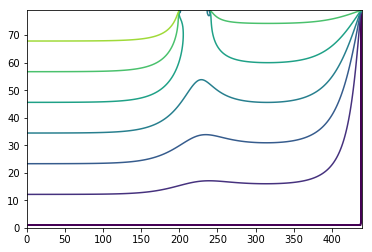

In [95]:
plt.contour(np.flipud(h))

In [96]:
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Convolution
from scipy.ndimage import convolve, generate_binary_structure

# Geometry
h = np.zeros([80, 440])
lhead = 105
rhead = 80

# Left head
h[0,0:200]= lhead
# Right head
h[0,241:439]= rhead

# Error and tolerance
tolerance = 1.E-15
error = 1.0
step = 0

# Residual
residual = np.zeros([80, 440])

(nrows, ncols) = h.shape

while error > tolerance:
# for k in range(1):
    step = step + 1
    # Copy the FDM grid to residual
    residual = h.copy()
    
    # Top left side of dam boundary assign head
    # if i == 0 and j < 202:
    h[0,:200] = lhead
                
    # Top right side of dam boundary assign head
    # elif i == 0 and j > 240:
    h[0, 241:]= rhead
    
    # Top boundary beneath the dam
    for j in range(201, 240):
        h[0,j] = (h[0, j-1] + 2 * h[1, j] + h[0, j+1]) / 4;

    
    # print(h.sum())
    
    # Finite Difference Method
    # h[i, j] = (h[i-1, j] + h[i, j-1] + h[i, j+1] + h[i+1, j]) / 4

    #  '''
    # Define a kernel function with active neighbours
    k = generate_binary_structure(2, 1)
    k[1, 1] = False
    
    # Use convolution instead of loop iteration
    # https://en.wikipedia.org/wiki/Convolution
    B = convolve(h, k, mode='constant', cval=0.0)
    B *= 0.25
    h[1:(nrows-2),1:(ncols-2)] = B[1:(nrows-2),1:(ncols-2)].copy()
    
    '''
    for i in range(1, nrows -1):
        for j in range(1, ncols -1):
            h[i, j] = (h[i-1, j] + h[i+1, j] + 
                       h[i, j-1] + h[i, j+1]) / 4

    #'''
        
    # Bottom boundary
    for j in range(1, (ncols-1)):
        h[(nrows -1), j] = (h[(nrows-1), j-1] +
                            2 * h[nrows-2, j] + 
                            h[(nrows-1), j+1]) / 4

    # Left boundary
    for i in range(1, (nrows-1)):
        h[i, 0] = (h[i-1, 0] + 2 * h[i, 1] + h[i+1, 0]) / 4
        
    # Right boundary
    for i in range(1, (nrows-1)):
        h[i, (ncols -1)] = (2 * h[i, (ncols-2)] + 
                                h[i-1, (ncols-1)] + 
                                h[i+1, (ncols-1)]) / 4
        
    # Left bottom corner (i == (nrows -1) and j == 0):
    # h[i,j]=(h[i-1,j]+h[i,j+1])/2
    h[(nrows-1), 0] = (h[nrows-2, 0] + h[(nrows-1), 1]) / 2
    
                
    # Right bottom corner (i == (nrows -1) and  j == (ncols -1))
    # h[i,j]=(h[i,j-1]+h[i-1,j])/2
    h[(nrows-1), (ncols-1)] = (h[(nrows-1), (ncols-2)] + 
                               h[(nrows-2), (ncols-1)]) / 2

    
                
    error = (np.square(np.subtract(h, residual))).sum()
    print(step, error)



1 224403.85416666666
2 67583.43688512732
3 35396.47960008259
4 22570.773957475652
5 15972.084949554142
6 12060.962001911414
7 9519.424860491865
8 7759.761363960523
9 6481.71742682752
10 5519.50278648587
11 4773.403509301132
12 4181.364598446718
13 3702.0657735557306
14 3307.7611360515634
15 2978.624312818741
16 2700.6320236710894
17 2463.2227322248887
18 2258.643076608677
19 2080.807909567929
20 1925.1258063172859
21 1787.8699956636694
22 1666.1699811153803
23 1557.6289380574667
24 1460.3716740903624
25 1372.7936733428812
26 1293.624633371143
27 1221.753907828347
28 1156.294286977371
29 1096.4548847266979
30 1041.5997173128296
31 991.15173378297
32 944.6446907665539
33 901.6485773534007
34 861.8148378403185
35 824.8170546450432
36 790.3901351159706
37 758.2822190609588
38 728.2885971795619
39 700.2120926366442
40 673.892462906954
41 649.173319856628
42 625.9276898290947
43 604.0300731271703
44 583.3787445544434
45 563.8719172834857
46 545.4272765573221
47 527.9614667839567
48 511.40727

458 16.800240666091202
459 16.745037031659997
460 16.690137363676673
461 16.63553579437442
462 16.58123357441533
463 16.52722492613586
464 16.473511099747263
465 16.420086405833768
466 16.36695209389582
467 16.314102560957096
468 16.261539055558718
469 16.209256059401078
470 16.157254819828744
471 16.105529901500272
472 16.054082550337423
473 16.002907412281157
474 15.952005731614342
475 15.90137223392662
476 15.851008161655395
477 15.800908318445899
478 15.751073944693134
479 15.701499920543993
480 15.652187484163415
481 15.603131590683981
482 15.554333475861709
483 15.505788168335972
484 15.457496901283365
485 15.409454775407397
486 15.361663021142654
487 15.314116809848986
488 15.266817369064114
489 15.219759939430523
490 15.172945745441654
491 15.126370095681931
492 15.080034211460271
493 15.033933467994233
494 14.988069083274942
495 14.942436497875576
496 14.897036926342544
497 14.851865873357491
498 14.806924549901819
499 14.762208523547592
500 14.717719001596908
501 14.673451613

917 5.913531512373814
918 5.903864625218296
919 5.894223735158267
920 5.884609250694392
921 5.875020563650499
922 5.865458080512262
923 5.855921197065116
924 5.846410317792375
925 5.836924842405209
926 5.827465173397242
927 5.818030714369851
928 5.808621865839211
929 5.799238035262188
930 5.789879621189727
931 5.7805460348995945
932 5.771237672989761
933 5.761953950524583
934 5.752695262161312
935 5.743461026717216
936 5.734251636920654
937 5.72506651530848
938 5.715906052692224
939 5.706769675295326
940 5.697657772024225
941 5.688569772756311
942 5.6795060645048085
943 5.670466080768878
944 5.661450206680167
945 5.652457879327643
946 5.643489481973061
947 5.6345444552636685
948 5.625623180602869
949 5.616725102165042
950 5.607850599506715
951 5.598999120298516
952 5.590171042261444
953 5.581365816532033
954 5.57258381900699
955 5.563824504258647
956 5.555088246370575
957 5.5463745033211715
958 5.537683647392051
959 5.529015139938128
960 5.5203693514501895
961 5.511745746630476
962 5.5

1365 3.2420072322476354
1366 3.2383632052111073
1367 3.234725430186523
1368 3.231094063269562
1369 3.2274689152662037
1370 3.223850141690894
1371 3.2202375541535453
1372 3.216631307590254
1373 3.2130312144102127
1374 3.209437428973992
1375 3.205849764485704
1376 3.2022683747329737
1377 3.1986930737102663
1378 3.195124014635195
1379 3.1915610122881115
1380 3.188004219319315
1381 3.1844534512904974
1382 3.180908860287504
1383 3.1773702626489766
1384 3.1738378098989135
1385 3.1703113191486194
1386 3.1667909413629185
1387 3.1632764944214475
1388 3.1597681287324906
1389 3.1562656629397057
1390 3.152769246897592
1391 3.149278700009495
1392 3.1457941715787054
1393 3.1423154817640717
1394 3.138842779320405
1395 3.135375885157717
1396 3.131914947484859
1397 3.1284597879590335
1398 3.1250105542457125
1399 3.121567068744942
1400 3.1181294785815457
1401 3.1146976068942633
1402 3.1112716002698506
1403 3.107851282581598
1404 3.1044367998807383
1405 3.101027976771157
1406 3.0976249587710005
1407 3.09

1717 2.2578998739834923
1718 2.255752799602493
1719 2.253608468654296
1720 2.251466966790236
1721 2.2493281971889987
1722 2.2471922452343986
1723 2.2450590144356184
1724 2.2429285899099924
1725 2.2408008754957027
1726 2.238675956044714
1727 2.236553735722778
1728 2.2344342991174844
1729 2.2323175507206376
1730 2.230203574856504
1731 2.228092276341562
1732 2.225983739237881
1733 2.223877868685016
1734 2.2217747484838077
1735 2.2196742840956483
1736 2.217576559061113
1737 2.215481479161919
1738 2.2133891276795286
1739 2.2112994107144823
1740 2.2092124112901512
1741 2.2071280358244807
1742 2.2050463670838454
1743 2.202967311802159
1744 2.200890952489713
1745 2.198817196195079
1746 2.1967461251734925
1747 2.194677646786747
1748 2.1926118430360084
1749 2.1905486215949526
1750 2.188488064211716
1751 2.1864300788703837
1752 2.1843747470670674
1753 2.182321977094931
1754 2.1802718501990395
1755 2.1782242749802982
1756 2.176179332433705
1757 2.1741369314664767
1758 2.1720971528246014
1759 2.170

2074 1.6345881547225485
2075 1.6331688154321213
2076 1.6317509855366807
2077 1.630334609576259
2078 1.6289197384162823
2079 1.6275063167559198
2080 1.6260943953226525
2081 1.6246839189742046
2082 1.6232749383005014
2083 1.6218673983172305
2084 1.6204613494772935
2085 1.619056736953755
2086 1.617653611062945
2087 1.6162519171346685
2088 1.6148517053491689
2089 1.6134529211924509
2090 1.6120556147090976
2091 1.6106597315407618
2092 1.6092653215968
2093 1.6078723306739438
2094 1.6064808085467928
2095 1.605090701166542
2096 1.6037020581735444
2097 1.602314825672868
2098 1.6009290531710454
2099 1.5995446869264738
2100 1.5981617763123295
2101 1.5967802677397542
2102 1.5954002104490057
2103 1.59402155100341
2104 1.592644338510809
2105 1.5912685196861136
2106 1.5898941435051408
2107 1.5885211568338897
2108 1.5871496085166332
2109 1.58577944556983
2110 1.5844107167066555
2111 1.5830433690935384
2112 1.5816774513129268
2113 1.5803129106806681
2114 1.5789497956490057
2115 1.5775880536826126
2116 

2424 1.2150234708152006
2425 1.2140143360507807
2426 1.2130061444964428
2427 1.2119988614459587
2428 1.2109925193674618
2429 1.209987083641503
2430 1.2089825866575479
2431 1.207978993882604
2432 1.2069763376276519
2433 1.2059745834459505
2434 1.2049737635702262
2435 1.2039738436396226
2436 1.202974855808944
2437 1.2019767658029537
2438 1.2009796056986901
2439 1.1999833413063365
2440 1.1989880046253398
2441 1.1979935615510395
2442 1.1970000440055795
2443 1.196007417969123
2444 1.1950157152867555
2445 1.1940249020232103
2446 1.1930350099467486
2447 1.1920460052063981
2448 1.191057919493818
2449 1.1900707190420552
2450 1.1890844354663859
2451 1.1880990350836427
2452 1.1871145494329565
2453 1.186130944914657
2454 1.1851482529919446
2455 1.184166440148359
2456 1.183185537771458
2457 1.1822055124277446
2458 1.1812263954292668
2459 1.1802481534252593
2460 1.1792708176525315
2461 1.1782943548427853
2462 1.1773187961577705
2463 1.1763441084113857
2464 1.1753703226905907
2465 1.174397405891225
2

2880 0.8365740180296809
2881 0.8358973867954032
2882 0.835221337683624
2883 0.8345458502903313
2884 0.8338709439032357
2885 0.8331965981627703
2886 0.8325228323150304
2887 0.831849626044795
2888 0.8311769985567162
2889 0.8305049295797129
2890 0.8298334382771343
2891 0.829162504421967
2892 0.8284921471363174
2893 0.827822346237117
2894 0.8271531208053373
2895 0.8264844507017641
2896 0.8258163549663236
2897 0.8251488135035254
2898 0.8244818453123688
2899 0.8238154303409922
2900 0.8231495875475868
2901 0.8224842969237366
2902 0.8218195773869307
2903 0.821155408972143
2904 0.8204918105562929
2905 0.8198287622175134
2906 0.8191662827922814
2907 0.8185043524019152
2908 0.8178429898424366
2909 0.8171821752781834
2910 0.8165219274649264
2911 0.8158622266099113
2912 0.8152030914286893
2913 0.81454450217131
2914 0.8138864775132774
2915 0.8132289977472954
2916 0.8125720815088991
2917 0.8119157091333569
2918 0.8112598992163284
2919 0.8106046321355379
2920 0.8099499264468843
2921 0.8092957625703945

3240 0.6261655101585365
3241 0.625664102653861
3242 0.625163113884294
3243 0.6246625298444775
3244 0.6241623638036571
3245 0.6236626017845872
3246 0.6231632570299308
3247 0.6226643155905149
3248 0.622165790682482
3249 0.6216676683846473
3250 0.6211699618866594
3251 0.62067265729531
3252 0.6201757677738396
3253 0.6196792794568934
3254 0.6191832054813896
3255 0.6186875320097481
3256 0.6181922721526046
3257 0.6176974121001481
3258 0.6172029649367801
3259 0.6167089168803309
3260 0.6162152809890937
3261 0.6157220435084712
3262 0.6152292174706626
3263 0.6147367891486253
3264 0.6142447715485162
3265 0.6137531509707429
3266 0.6132619403955163
3267 0.6127711261506558
3268 0.6122807211904328
3269 0.6117907118700275
3270 0.6113011111178562
3271 0.6108119053163656
3272 0.6103231073682026
3273 0.6098347036830072
3274 0.6093467071377092
3275 0.608859104169084
3276 0.6083719076283909
3277 0.6078851039795014
3278 0.6073987060480546
3279 0.6069127003249413
3280 0.6064270996102553
3281 0.605941890421827

3584 0.475750266010184
3585 0.47537149827799485
3586 0.474993042138402
3587 0.47461488757890175
3588 0.47423704408736417
3589 0.4738595016702714
3590 0.4734822697974919
3591 0.4731053384944633
3592 0.4727287172130536
3593 0.47235239599760814
3594 0.47197638428208133
3595 0.47160067212967083
3596 0.47122526895644273
3597 0.4708501648444042
3598 0.4704753691917934
3599 0.47010087209936896
3600 0.46972668294756925
3601 0.46935279185588685
3602 0.46897920818696587
3603 0.4686059220790388
3604 0.4682329428770045
3605 0.4678602607376991
3606 0.4674878849883771
3607 0.46711580580448525
3608 0.4667440324955865
3609 0.46637255525574844
3610 0.4660013833768886
3611 0.46563050707158554
3612 0.465259935614214
3613 0.46488965923581216
3614 0.4645196871932373
3615 0.4641500097359814
3616 0.4637806361033798
3617 0.46341155656333355
3618 0.46304278033772045
3619 0.46267429771282514
3620 0.4623061178930814
3621 0.46193823118310473
3622 0.46157064676993914
3623 0.46120335497649606
3624 0.460836364972455

3934 0.3602245521600223
3935 0.35993892902873054
3936 0.3596535387737334
3937 0.3593683741580593
3938 0.3590834420355188
3939 0.3587987351822547
3940 0.35851426043964796
3941 0.3582300105969346
3942 0.35794599248304176
3943 0.3576621989003069
3944 0.35737863666521946
3945 0.35709529859319245
3946 0.35681219148831284
3947 0.3565293081789987
3948 0.3562466554570218
3949 0.3559642261637661
3950 0.3556820270786587
3951 0.35540005105608174
3952 0.35511830486312335
3953 0.3548367813671224
3954 0.3545554873228765
3955 0.3542744156106632
3956 0.35399357297299316
3957 0.35371295230303984
3958 0.3534325603310785
3959 0.35315238996316123
3960 0.352872447917335
3961 0.35259272711248
3962 0.35231323425448935
3963 0.3520339622750555
3964 0.35175491786787255
3965 0.35147609397743385
3966 0.3511974972853155
3967 0.35091912074877135
3968 0.3506409710372348
3969 0.35036304112072403
3970 0.3500853376565654
3971 0.34980785362750416
3972 0.3495305956787859
3973 0.34925355680584513
3974 0.34897674364189774


4296 0.27044538700122883
4297 0.2702316525286541
4298 0.27001809127631843
4299 0.26980469800618223
4300 0.26959147767496844
4301 0.2693784250538405
4302 0.2691655450907978
4303 0.26895283256618924
4304 0.2687402924192948
4305 0.2685279194396382
4306 0.26831571855779507
4307 0.268103684572429
4308 0.2678918224054677
4309 0.267680126864674
4310 0.26746860286332685
4311 0.26725724521829963
4312 0.2670460588342314
4313 0.266835038537092
4314 0.26662418922288406
4315 0.2664135057266541
4316 0.2662029929357941
4317 0.26599264569442144
4318 0.2657824688813256
4319 0.26557245734966967
4320 0.2653626159696556
4321 0.2651529396034855
4322 0.26494343311278384
4323 0.2647340913687799
4324 0.26452491922453625
4325 0.2643159115602733
4326 0.2641070732205382
4327 0.26389839909451446
4328 0.2636898940182447
4329 0.263481552889866
4330 0.26327338053691507
4331 0.2630653718664836
4332 0.2628575316976085
4333 0.2626498549463234
4334 0.2624423464231924
4335 0.262235001053157
4336 0.2620278236383334
4337 0

4650 0.20450243882278296
4651 0.20434125723031937
4652 0.20418020570619252
4653 0.20401928039902656
4654 0.20385848495057504
4655 0.20369781551609611
4656 0.20353727573106614
4657 0.20337686175734448
4658 0.20321657722414893
4659 0.2030564182999305
4660 0.2028963886076584
4661 0.2027364843223538
4662 0.2025767090607725
4663 0.20241705900449117
4664 0.2022575377640431
4665 0.2020981415275524
4666 0.20193887389933923
4667 0.20177973107408678
4668 0.20162071664990985
4669 0.20146182682799707
4670 0.20130306520029517
4671 0.20114442797452084
4672 0.20098591873642638
4673 0.20082753370023496
4674 0.20066927644554428
4675 0.20051114319306232
4676 0.2003531375162272
4677 0.20019525564223534
4678 0.20003750113838936
4679 0.19987987023834836
4680 0.1997223665032775
4681 0.19956498617330062
4682 0.1994077328034586
4683 0.19925060264033378
4684 0.19909359923284528
4685 0.19893671883400071
4686 0.1987799649866432
4687 0.19862333395019421
4688 0.19846682926141143
4689 0.198310447186113
4690 0.19815

5000 0.1552364540352706
5001 0.15511439454567463
5002 0.15499243321477243
5003 0.15487056718422557
5004 0.15474879915500916
5005 0.1546271262736228
5006 0.15450555123646173
5007 0.15438407119484363
5008 0.15426268884060412
5009 0.15414140132988008
5010 0.15402021134993388
5011 0.1538991160617175
5012 0.15377811814794679
5013 0.15365721477435443
5014 0.15353640861912754
5015 0.15341569685278686
5016 0.15329508214898274
5017 0.15317456168301563
5018 0.15305413812400515
5019 0.15293380865202996
5020 0.15281357593169115
5021 0.15269343714782416
5022 0.15257339496053404
5023 0.15245344655938986
5024 0.15233359460000565
5025 0.1522138362767079
5026 0.15209417424060254
5027 0.15197460569074653
5028 0.15185513327377587
5029 0.15173575419347476
5030 0.15161647109199608
5031 0.15149728117784456
5032 0.15137818708870474
5033 0.15125918603778848
5034 0.15114028065832819
5035 0.15102146816822842
5036 0.15090275119629196
5037 0.15078412696509588
5038 0.15066559809898405
5039 0.15054716182524958
5040

5355 0.11745147421672728
5356 0.117359330694262
5357 0.1172672589850496
5358 0.11717526109403237
5359 0.11708333490177093
5360 0.11699148240985753
5361 0.11689970150237732
5362 0.11680799417758875
5363 0.11671635832309352
5364 0.11662479593380916
5365 0.11653330490088118
5366 0.11644188721588351
5367 0.11635054077347078
5368 0.11625926756188985
5369 0.11616806547932101
5370 0.11607693651068496
5371 0.11598587855765907
5372 0.1158948936018389
5373 0.11580397954842077
5374 0.11571313837569226
5375 0.11562236799232704
5376 0.11553167037330417
5377 0.11544104343080744
5378 0.11535048913650077
5379 0.11526000540605039
5380 0.11516959420782891
5381 0.11507925346097951
5382 0.11498898513058034
5383 0.11489878713924559
5384 0.11480866144878268
5385 0.11471860598526687
5386 0.11462862270720711
5387 0.11453870954415578
5388 0.11444886845134848
5389 0.11435909736178856
5390 0.11426939822744642
5391 0.11417976898476918
5392 0.11409021158246993
5393 0.11400072396042489
5394 0.11391130806411609
5395

5711 0.08884700648552639
5712 0.08877744840707925
5713 0.08870794441067309
5714 0.0886384959867121
5715 0.08856910155883908
5716 0.08849976261499144
5717 0.08843047758142494
5718 0.08836124794360652
5719 0.08829207213038096
5720 0.08822295162477083
5721 0.08815388485822319
5722 0.08808487331129179
5723 0.08801591541802031
5724 0.08794701265651668
5725 0.0878781634634065
5726 0.08780936931434923
5727 0.08774062864856925
5728 0.08767194293925867
5729 0.08760331062824268
5730 0.08753473318626856
5731 0.08746620905773776
5732 0.08739773971095409
5733 0.08732932359289611
5734 0.08726096216943577
5735 0.08719265389011815
5736 0.08712440021840046
5737 0.08705619960637641
5738 0.08698805351508083
5739 0.08691996039917464
5740 0.08685192171725838
5741 0.08678393592656085
5742 0.0867160044832672
5743 0.08664812584715251
5744 0.08658030147199872
5745 0.08651252982011337
5746 0.08644481234287063
5747 0.08637714750513455
5748 0.08630953675587229
5749 0.08624197856247827
5750 0.08617447437152291
575

6059 0.06766848971575026
6060 0.06761561298434947
6061 0.06756277727649809
6062 0.06750998370992885
6063 0.06745723110188924
6064 0.0674045205682877
6065 0.0673518509283087
6066 0.06729922329601452
6067 0.06724663649253693
6068 0.06719409163010671
6069 0.06714158753179583
6070 0.06708912530799402
6071 0.06703670378371285
6072 0.06698432406752142
6073 0.0669319849863508
6074 0.06687968764694892
6075 0.06682743087817945
6076 0.06677521578496433
6077 0.06672304119809516
6078 0.06667090822067157
6079 0.0666188156854067
6080 0.06656676469358382
6081 0.06651475407984297
6082 0.06646278494365186
6083 0.06641085612155297
6084 0.06635896871121451
6085 0.06630712155109543
6086 0.06625531573705078
6087 0.0662035501094483
6088 0.06615182576234033
6089 0.066100141538007
6090 0.06604849852868108
6091 0.06599689557856796
6092 0.06594533377809465
6093 0.06589381197335184
6094 0.06584233125299536
6095 0.06579089046500326
6096 0.06573949069623082
6097 0.06568813079655215
6098 0.0656368118510411
6099 0.0

6414 0.05128335322885507
6415 0.05124335278081877
6416 0.051203384162275475
6417 0.05116344648877985
6418 0.051123540594418634
6419 0.051083665596198785
6420 0.05104382232682812
6421 0.05100400990476916
6422 0.05096422916137008
6423 0.050924479216517694
6424 0.05088476090021263
6425 0.05084507333377786
6426 0.050805417345850076
6427 0.05076579205920215
6428 0.05072619830109794
6429 0.05068663519575203
6430 0.05064710356907355
6431 0.05060760254670659
6432 0.050568132953215425
6433 0.050528693915667854
6434 0.05048928625727209
6435 0.05044990910653242
6436 0.05041056328530925
6437 0.05037124792353022
6438 0.050331963841704214
6439 0.050292710171187645
6440 0.050253487731143194
6441 0.05021429565435341
6442 0.050175134758633645
6443 0.050136004178182786
6444 0.050096904729479336
6445 0.05005783554813739
6446 0.050018797449303556
6447 0.049979789570000176
6448 0.04994081272403891
6449 0.049901866049854936
6450 0.049862950359930755
6451 0.0498240647941055
6452 0.0497852101635263
6453 0.049

6769 0.03888482894851822
6770 0.038854551836775206
6771 0.038824298121452806
6772 0.038794068426738604
6773 0.038763862091555246
6774 0.03873367973907618
6775 0.03870352070930542
6776 0.03867338562438548
6777 0.03864327382539934
6778 0.038613185933482654
6779 0.038583121290786726
6780 0.03855308051743288
6781 0.03852306295664591
6782 0.0384930692275361
6783 0.038463098674395346
6784 0.038433151915326216
6785 0.0384032282956913
6786 0.03837332843257696
6787 0.03834345167242097
6788 0.038313598631292065
6789 0.038283768656705915
6790 0.03825396236372319
6791 0.03822417910091085
6792 0.03819441948233981
6793 0.03816468285763416
6794 0.03813496983985805
6795 0.03810527977970052
6796 0.03807561328922807
6797 0.038045969720179006
6798 0.03801634968362667
6799 0.03798675253236501
6800 0.03795717887646548
6801 0.03792762806978625
6802 0.03789810072140174
6803 0.03786859618621604
6804 0.03783911507231171
6805 0.03780965673564465
6806 0.03778022178330642
6807 0.03775080957230419
6808 0.037721420

7127 0.029428785794852055
7128 0.029405909137017044
7129 0.029383050124578564
7130 0.029360209223553396
7131 0.029337385940166362
7132 0.029314580739674235
7133 0.02929179312910964
7134 0.029269023572974055
7135 0.029246271579098083
7136 0.02922353761122537
7137 0.029200821177994576
7138 0.029178122742381327
7139 0.029155441813827454
7140 0.02913277885456484
7141 0.02911013337482815
7142 0.02908750583609152
7143 0.029064895749382747
7144 0.02904230357543277
7145 0.029019728826066155
7146 0.028997171961256438
7147 0.028974632493623875
7148 0.028952110882396274
7149 0.028929606640982323
7150 0.028907120227865367
7151 0.028884651157244628
7152 0.028862199886851837
7153 0.028839765931682044
7154 0.028817349748720737
7155 0.02879495085374964
7156 0.028772569703012934
7157 0.028750205813080548
7158 0.028727859639445727
7159 0.028705530699468233
7160 0.028683219447905466
7161 0.028660925402897428
7162 0.028638649018459014
7163 0.028616389813516704
7164 0.02859414824134447
7165 0.0285719238216

7479 0.022386240684035948
7480 0.022368865177487495
7481 0.02235150305042144
7482 0.022334154652713687
7483 0.022316819613491835
7484 0.02229949828206097
7485 0.022282190288146996
7486 0.022264895980490557
7487 0.022247614989416065
7488 0.022230347663099368
7489 0.022213093632469844
7490 0.02219585324513015
7491 0.02217862613260848
7492 0.022161412641946977
7493 0.022144212405269783
7494 0.022127025769052473
7495 0.022109852366022337
7496 0.022092692542084295
7497 0.022075545930565793
7498 0.0220584128768125
7499 0.02204129301474083
7500 0.022024186689138706
7501 0.022007093534515944
7502 0.021990013895099744
7503 0.02197294740599474
7504 0.021955894410865765
7505 0.021938854545411602
7506 0.021921828152736675
7507 0.02190481486913394
7508 0.02188781503714741
7509 0.021870828293660192
7510 0.021853854980664236
7511 0.02183689473562842
7512 0.02181994789998425
7513 0.021803014111796512
7514 0.021786093711940152
7515 0.021769186339064522
7516 0.02175229233348958
7517 0.021735411334454707

7841 0.016904386693857926
7842 0.016891285532033524
7843 0.01687819444180537
7844 0.016865113683869986
7845 0.016852042981761798
7846 0.016838982595744182
7847 0.016825932249805057
7848 0.016812892203787864
7849 0.016799862182121577
7850 0.016786842444231505
7851 0.01677383271499455
7852 0.016760833253410323
7853 0.01674784378480726
7854 0.01673486456776119
7855 0.016721895328044776
7856 0.016708936323816502
7857 0.016695987281294847
7858 0.016683048458215614
7859 0.01667011958123925
7860 0.016657200907689483
7861 0.016644292164667236
7862 0.016631393609077737
7863 0.016618504968460575
7864 0.01660562649931
7865 0.016592757929603123
7866 0.01657989951542176
7867 0.01656705098518432
7868 0.016554212594548867
7869 0.01654138407238143
7870 0.01652856567392542
7871 0.016515757128479542
7872 0.01650295869087767
7873 0.016490170090861987
7874 0.01647739158284314
7875 0.016464622897004268
7876 0.01645186428734687
7877 0.01643911548448698
7878 0.01642637674201774
7879 0.016413647790990762
7880

8194 0.01285938878474047
8195 0.012849436127264338
8196 0.01283949131124539
8197 0.012829554128820107
8198 0.012819624775583734
8199 0.012809703044009033
8200 0.012799789129373705
8201 0.01278988282448362
8202 0.0127799843243047
8203 0.012770093421979092
8204 0.01276021031215026
8205 0.012750334788301839
8206 0.012740467044757783
8207 0.012730606875335709
8208 0.012720754474043524
8209 0.012710909635036837
8210 0.012701072552010466
8211 0.012691243019445516
8212 0.012681421230726436
8213 0.012671606980669211
8214 0.012661800462341673
8215 0.012652001470893716
8216 0.01264221019907951
8217 0.012632426442380577
8218 0.012622650393241895
8219 0.012612881847468687
8220 0.012603120997198094
8221 0.01259336763856742
8222 0.01258362196339998
8223 0.012573883768160972
8224 0.012564153244367285
8225 0.012554430188814573
8226 0.012544714792702838
8227 0.01253500685316243
8228 0.012525306561080236
8229 0.012515613713915295
8230 0.012505928502245517
8231 0.012496250723855297
8232 0.012486580569019

8536 0.009869473329041515
8537 0.00986184437327076
8538 0.009854221418410011
8539 0.009846604306847567
8540 0.009838993186821915
8541 0.009831387900975569
8542 0.009823788597310888
8543 0.009816195118721631
8544 0.009808607612970656
8545 0.009801025923208025
8546 0.009793450196952916
8547 0.009785880277611663
8548 0.00977831631246668
8549 0.009770758145175655
8550 0.009763205922780273
8551 0.009755659489193843
8552 0.009748118991220384
8553 0.009740584273019692
8554 0.009733055481164387
8555 0.009725532460067072
8556 0.009718015356057286
8557 0.0097105040137985
8558 0.009702998579392457
8559 0.009695498897748409
8560 0.009688005114727295
8561 0.009680517075495134
8562 0.009673034925674747
8563 0.0096655585106805
8564 0.009658087975903016
8565 0.009650623167002914
8566 0.009643164229136062
8567 0.009635711008217331
8568 0.009628263649161735
8569 0.009620821998133182
8570 0.009613386199815253
8571 0.00960595610062162
8572 0.009598531845000306
8573 0.009591113279610004
8574 0.009583700548

8897 0.007466822726346772
8898 0.007461058318363954
8899 0.007455298323005263
8900 0.007449542851026301
8901 0.007443791784796799
8902 0.007438045234895577
8903 0.007432303083881016
8904 0.007426565442153341
8905 0.007420832192463519
8906 0.007415103445029171
8907 0.007409379082791956
8908 0.0074036592157916345
8909 0.0073979437271580704
8910 0.007392232726754384
8911 0.0073865260978980595
8912 0.007380823950273509
8913 0.007375126167388871
8914 0.007369432858751463
8915 0.00736374390805353
8916 0.007358059424630383
8917 0.0073523792923592965
8918 0.007346703620397552
8919 0.007341032292813699
8920 0.0073353654185843754
8921 0.0073297028819651645
8922 0.007324044791760675
8923 0.007318391032411256
8924 0.0073127417125451915
8925 0.007307096716789286
8926 0.007301456153596206
8927 0.007295819907778811
8928 0.007290188087615177
8929 0.0072845605781039395
8930 0.00727893748734693
8931 0.007273318700528339
8932 0.007267704325578409
8933 0.007262094247864715
8934 0.007256488575139758
8935 0

9247 0.0056991696869238846
9248 0.005694775008819115
9249 0.005690383690618674
9250 0.005685995815769088
9251 0.005681611295599407
9252 0.005677230213421749
9253 0.005672852480705674
9254 0.005668478180632066
9255 0.005664107224813684
9256 0.005659739696292327
9257 0.005655375506825687
9258 0.005651014739323347
9259 0.005646657305683247
9260 0.00564230328868173
9261 0.0056379526003573375
9262 0.005633605323355995
9263 0.005629261369856373
9264 0.005624920822368355
9265 0.005620583593215689
9266 0.005616249764773031
9267 0.005611919249505861
9268 0.0056075921296566515
9269 0.005603268317831426
9270 0.005598947896139068
9271 0.00559463077732845
9272 0.005590317043374202
9273 0.005586006607166508
9274 0.005581699550548091
9275 0.005577395786545837
9276 0.005573095396875349
9277 0.00556879829470165
9278 0.005564504561608551
9279 0.0055602141109015995
9280 0.005555927024029454
9281 0.0055516432144431475
9282 0.005547362763453759
9283 0.0055430855846554895
9284 0.005538811759231222
9285 0.00

9606 0.0043212359607804245
9607 0.004317907540689938
9608 0.004314581726673781
9609 0.004311258452301609
9610 0.00430793777995245
9611 0.004304619643305877
9612 0.004301304104637623
9613 0.004297991097735918
9614 0.004294680684776713
9615 0.004291372799651172
9616 0.004288067504438646
9617 0.004284764733134735
9618 0.0042814645477204614
9619 0.004278166882295483
9620 0.004274871798740545
9621 0.0042715792312660655
9622 0.004268289241648774
9623 0.004265001764204438
9624 0.004261716860612356
9625 0.004258434465294066
9626 0.004255154639827384
9627 0.004251877318741808
9628 0.004248602563513461
9629 0.004245330308778701
9630 0.0042420606159156845
9631 0.004238793419663198
9632 0.004235528781301597
9633 0.004232266635675421
9634 0.004229007043966568
9635 0.00422574994112267
9636 0.004222495388226457
9637 0.0042192433203334335
9638 0.004215993798425868
9639 0.004212746757662931
9640 0.004209502258931468
9641 0.0042062602374925
9642 0.004203020754132641
9643 0.0041997837442219604
9644 0.004

9952 0.0033104121452755824
9953 0.0033078649362252633
9954 0.003305319718881309
9955 0.0033027764429806867
9956 0.003300235155695214
9957 0.0032976958068457528
9958 0.003295158443524729
9959 0.0032926230156326204
9960 0.0032900895701881787
9961 0.003287558057175393
9962 0.0032850285235325946
9963 0.0032825009193246
9964 0.003279975291416254
9965 0.0032774515899521507
9966 0.003274929861721204
9967 0.003272410056946653
9968 0.0032698922223455716
9969 0.003267376308218039
9970 0.003264862361207094
9971 0.003262350331693416
9972 0.003259840266242172
9973 0.0032573321153167617
9974 0.003254825925407583
9975 0.003252321647056104
9976 0.0032498193266773234
9977 0.0032473189148933125
9978 0.0032448204580443852
9979 0.003242323906831612
9980 0.0032398293075195793
9981 0.003237336610892005
9982 0.003234845863135236
9983 0.0032323570151130817
9984 0.0032298701129399037
9985 0.003227385107555128
9986 0.0032249020450010003
9987 0.0032224208762948645
9988 0.003219941647405304
9989 0.003217464309428

10299 0.0025347692559474773
10300 0.002532820800588478
10301 0.002530873829943876
10302 0.0025289283796926737
10303 0.002526984411856012
10304 0.00252504196205455
10305 0.0025231009923749664
10306 0.002521161538378924
10307 0.002519223562212835
10308 0.0025172870993801543
10309 0.002515352112090417
10310 0.002513418635790424
10311 0.0025114866327482304
10312 0.002509556138353985
10313 0.0025076271149380575
10314 0.0025056995978306167
10315 0.0025037735494266153
10316 0.0025018490049962165
10317 0.0024999259269945515
10318 0.002498004350637496
10319 0.0024960842384385592
10320 0.0024941656255576135
10321 0.0024922484745680687
10322 0.0024903328205734174
10323 0.0024884186262073074
10324 0.002486505926516826
10325 0.0024845946841954465
10326 0.0024826849342341243
10327 0.0024807766393852505
10328 0.0024788698345833225
10329 0.0024769644826431285
10330 0.0024750606184402064
10331 0.00247315820484993
10332 0.0024712572766933
10333 0.002469357796903387
10334 0.0024674598002440884
10335 0.00

10659 0.001922065907394714
10660 0.0019205898592782977
10661 0.001919114934770773
10662 0.0019176411605548703
10663 0.0019161685082118966
10664 0.0019146970043798714
10665 0.0019132266206850492
10666 0.0019117573837260748
10667 0.001910289265172119
10668 0.001908822291578302
10669 0.001907356434661192
10670 0.0019058917209326992
10671 0.0019044281221547786
10672 0.0019029656647951256
10673 0.0019015043206643087
10674 0.001900044116185193
10675 0.0018985850232130235
10676 0.0018971270681288682
10677 0.001895670222833994
10678 0.0018942145136677216
10679 0.0018927599125737615
10680 0.0018913064458499639
10681 0.001889854085485668
10682 0.0018884028577373895
10683 0.0018869527346371024
10684 0.0018855037424002513
10685 0.0018840558531047903
10686 0.001882609092922562
10687 0.0018811634339768203
10688 0.0018797189023958233
10689 0.0018782754703505896
10690 0.0018768331639261243
10691 0.0018753919553366589
10692 0.0018739518706253936
10693 0.0018725128820531645
10694 0.001871075015621897
10

11012 0.0014656985640359246
11013 0.0014645739841771973
11014 0.00146345028032657
11015 0.0014623274310733459
11016 0.00146120545647381
11017 0.0014600843351525996
11018 0.0014589640871334492
11019 0.0014578446910755959
11020 0.0014567261669699478
11021 0.0014556084935098512
11022 0.0014544916906540667
11023 0.0014533757371304726
11024 0.0014522606528662696
11025 0.0014511464166229243
11026 0.0014500330482953442
11027 0.0014489205266787347
11028 0.0014478088716369162
11029 0.0014466980619994056
11030 0.0014455881175969127
11031 0.0014444790172934787
11032 0.0014433707808879529
11033 0.0014422633872781206
11034 0.0014411568562324325
11035 0.0014400511666804651
11036 0.0014389463383588119
11037 0.0014378423502315629
11038 0.001436739222004039
11039 0.0014356369326744632
11040 0.0014345355019152808
11041 0.0014334349087591703
11042 0.0014323351728459637
11043 0.0014312362732430786
11044 0.0014301382295582835
11045 0.0014290410208929044
11046 0.0014279446668228751
11047 0.00142684914648286

11375 0.001109414087843166
11376 0.0011085636274139196
11377 0.0011077138131961085
11378 0.0011068646601708882
11379 0.0011060161523596132
11380 0.0011051683047210317
11381 0.0011043211013017917
11382 0.0011034745570356033
11383 0.001102628655996042
11384 0.0011017834130912707
11385 0.00110093881242146
11386 0.0011000948688703156
11387 0.0010992515665640614
11388 0.0010984089203628239
11389 0.0010975669144165311
11390 0.0010967255635631874
11391 0.0010958848519778514
11392 0.001095044794473188
11393 0.0010942053752512363
11394 0.001093366609100199
11395 0.0010925284802479197
11396 0.0010916910034597228
11397 0.001090854162985817
11398 0.0010900179735692322
11399 0.0010891824194868532
11400 0.001088347515456922
11401 0.001087513245781197
11402 0.0010866796251540953
11403 0.0010858466379037761
11404 0.0010850142987000912
11405 0.001084182591896294
11406 0.0010833515321393324
11407 0.0010825211038065635
11408 0.0010816913215217943
11409 0.0010808621696887528
11410 0.0010800336629052869
11

11709 0.0008588096739385789
11710 0.0008581518283773317
11711 0.0008574944822822035
11712 0.0008568376470998555
11713 0.000856181310614993
11714 0.0008555254842544759
11715 0.0008548701558237697
11716 0.0008542153367314783
11717 0.0008535610148002418
11718 0.0008529072014231387
11719 0.0008522538844416133
11720 0.0008516010752294547
11721 0.0008509487616481193
11722 0.0008502969550539304
11723 0.0008496456433273665
11724 0.0008489948378048541
11725 0.0008483445263876871
11726 0.0008476947203953962
11727 0.0008470454077467398
11728 0.0008463965997433887
11729 0.0008457482843241405
11730 0.0008451004727715297
11731 0.0008444531530449022
11732 0.0008438063364076904
11733 0.000843160010838611
11734 0.0008425141875840361
11735 0.0008418688546409826
11736 0.0008412240232376913
11737 0.0008405796813908542
11738 0.00083993584031009
11739 0.0008392924880319389
11740 0.0008386496357478802
11741 0.0008380072715134208
11742 0.0008373654065020605
11743 0.0008367240287883327
11744 0.0008360831495290

12060 0.0006563420278690498
12061 0.000655839653320428
12062 0.0006553376688291398
12063 0.000654836065172268
12064 0.0006543348509719015
12065 0.0006538340170199939
12066 0.0006533335719252518
12067 0.0006528335064933436
12068 0.0006523338293194205
12069 0.000651834531224455
12070 0.0006513356207892496
12071 0.0006508370888503087
12072 0.0006503389439736647
12073 0.0006498411770105794
12074 0.0006493437965136525
12075 0.0006488467933492154
12076 0.0006483501760555866
12077 0.0006478539355136559
12078 0.0006473580802484706
12079 0.0006468626011551482
12080 0.0006463675067445638
12081 0.0006458727879275721
12082 0.0006453784532008082
12083 0.0006448844934898298
12084 0.000644390917277744
12085 0.0006438977155038718
12086 0.0006434048966389523
12087 0.0006429124516351155
12088 0.0006424203889504009
12089 0.0006419286995521241
12090 0.0006414373918841848
12091 0.0006409464569289667
12092 0.0006404559031148923
12093 0.0006399657214403363
12094 0.0006394759203208345
12095 0.0006389864907673

12412 0.0005013241734166101
12413 0.0005009407328407378
12414 0.0005005575896797367
12415 0.0005001747369825013
12416 0.0004997921812426836
12417 0.0004994099155196432
12418 0.0004990279462973394
12419 0.0004986462666463193
12420 0.0004982648830394422
12421 0.0004978837885587041
12422 0.0004975029896667067
12423 0.0004971224794562058
12424 0.0004967422643793138
12425 0.000496362337541017
12426 0.0004959827053823628
12427 0.0004956033610188527
12428 0.0004952243108809897
12429 0.000494845548095939
12430 0.0004944670790847487
12431 0.0004940888969841848
12432 0.0004937110082055201
12433 0.0004933334058966507
12434 0.0004929560964578663
12435 0.0004925790730485797
12436 0.0004922023420590227
12437 0.0004918258966592381
12438 0.0004914497432298195
12439 0.0004910738749505717
12440 0.0004906982981922251
12441 0.0004903230061459081
12442 0.000489948005172332
12443 0.0004895732884732548
12444 0.0004891988623982293
12445 0.0004888247201616842
12446 0.0004884508681019002
12447 0.000488077299443

12765 0.00038270009287228173
12766 0.00038240758942174364
12767 0.0003821153075681658
12768 0.0003818232522040324
12769 0.0003815314180967062
12770 0.00038123981013038483
12771 0.0003809484230814301
12772 0.00038065726182571525
12773 0.00038036632114805095
12774 0.00038007560591658086
12775 0.00037978511092443695
12776 0.00037949484103216716
12777 0.0003792047910406533
12778 0.0003789149658028065
12779 0.0003786253601283628
12780 0.0003783359788627001
12781 0.00037804681682223365
12782 0.000377757878845695
12783 0.000377469159758274
12784 0.0003771806643906727
12785 0.00037689238757544253
12786 0.0003766043341352829
12787 0.00037631649891298766
12788 0.00037602888672253485
12789 0.0003757414924146575
12790 0.00037545432079530156
12791 0.0003751673667245016
12792 0.00037488063500004697
12793 0.00037459412048970725
12794 0.0003743078279839972
12795 0.00037402175235818524
12796 0.00037373589839654307
12797 0.0003734502609822637
12798 0.0003731648448906478
12799 0.0003728796450140122
12800

13125 0.0002906400363313599
13126 0.0002904180460636369
13127 0.00029019622386241217
13128 0.0002899745733904302
13129 0.000289753090726566
13130 0.0002895317795280856
13131 0.0002893106358804718
13132 0.0002890896634347918
13133 0.00028886885828353865
13134 0.0002886482240708367
13135 0.0002884277568954115
13136 0.00028820746039677427
13137 0.0002879873306787596
13138 0.00028776737137517635
13139 0.000287547578597021
13140 0.00028732795597153477
13141 0.0002871084996157889
13142 0.00028688921315076914
13143 0.00028667009270073337
13144 0.0002864511418815965
13145 0.0002862323568219276
13146 0.0002860137411321781
13147 0.00028579529094805963
13148 0.0002855770098737792
13149 0.00028535889405142115
13150 0.0002851409470788096
13151 0.00028492316510459327
13152 0.00028470555172105345
13153 0.00028448810308296535
13154 0.00028427082277644906
13155 0.0002840537069626819
13156 0.0002838367592217712
13157 0.0002836199757212886
13158 0.0002834033600358471
13159 0.00028318690833861016
13160 0.

13480 0.00022160998954912737
13481 0.00022144083023534924
13482 0.0002212718017645488
13483 0.00022110290118522314
13484 0.00022093413124754527
13485 0.00022076548900571785
13486 0.00022059697720578267
13487 0.0002204285929049136
13488 0.00022026033884583684
13489 0.00022009221209141295
13490 0.00021992421537808367
13491 0.00021975634577384726
13492 0.00021958860601213294
13493 0.00021942099316453681
13494 0.00021925350995966356
13495 0.00021908615347473141
13496 0.00021891892643367995
13497 0.0002187518259183167
13498 0.00021858485464802078
13499 0.00021841800970971462
13500 0.00021825129381814818
13501 0.00021808470406453997
13502 0.00021791824315989797
13503 0.00021775190820017706
13504 0.00021758570189137438
13505 0.00021741962133461259
13506 0.00021725366923156861
13507 0.00021708784268724667
13508 0.000216922144399938
13509 0.00021675657147882595
13510 0.00021659112661778077
13511 0.00021642580693094824
13512 0.00021626061510773958
13513 0.00021609554826714557
13514 0.00021593060

13832 0.00016939103904231532
13833 0.00016926181689679414
13834 0.00016913269461892817
13835 0.0001690036699829428
13836 0.0001688747450618175
13837 0.0001687459176326096
13838 0.0001686171897656015
13839 0.0001684885592410306
13840 0.0001683600281260604
13841 0.00016823159420474893
13842 0.00016810325954022908
13843 0.00016797502192067174
13844 0.00016784688340578676
13845 0.0001677188417872863
13846 0.0001675908991214809
13847 0.00016746305320351534
13848 0.00016733530608660987
13849 0.00016720765556957101
13850 0.00016708010370190154
13851 0.00016695264828610811
13852 0.0001668252913684935
13853 0.0001666980307553968
13854 0.00016657086848908132
13855 0.0001664438023796569
13856 0.0001663168344666402
13857 0.00016618996256293655
13858 0.0001660631887053996
13859 0.00016593651070994278
13860 0.00016580993061019237
13861 0.00016568344622598693
13862 0.0001655570595873773
13863 0.00016543076851754465
13864 0.00016530457504393837
13865 0.00016517847699242457
13866 0.00016505247638707874

14189 0.0001290041003872005
14190 0.00012890574561544936
14191 0.00012880746517921957
14192 0.00012870926063531616
14193 0.000128611130312923
14194 0.00012851307576718343
14195 0.0001284150953291514
14196 0.00012831719055121332
14197 0.00012821935976832814
14198 0.00012812160452920938
14199 0.00012802392317180588
14200 0.00012792631724295488
14201 0.00012782878508214155
14202 0.00012773132823456113
14203 0.00012763394504224868
14204 0.0001275366370477383
14205 0.00012743940259575472
14206 0.00012734224322630107
14207 0.0001272451572871074
14208 0.00012714814631525526
14209 0.0001270512086612815
14210 0.00012695434585971438
14211 0.00012685755626400626
14212 0.00012676084140595022
14213 0.00012666419964155323
14214 0.00012656763250062957
14215 0.00012647113834154172
14216 0.00012637471869137904
14217 0.0001262783719113918
14218 0.00012618209952625393
14219 0.000126085899899909
14220 0.00012598977455450546
14221 0.00012589372185617994
14222 0.00012579774332524397
14223 0.0001257018373302

14537 9.893793830893967e-05
14538 9.886254690994916e-05
14539 9.8787212462192e-05
14540 9.871193614366673e-05
14541 9.863671668980945e-05
14542 9.85615552759304e-05
14543 9.8486450639444e-05
14544 9.841140395447118e-05
14545 9.833641396001223e-05
14546 9.826148182814678e-05
14547 9.818660630042948e-05
14548 9.81117885463922e-05
14549 9.80370273101124e-05
14550 9.796232375910803e-05
14551 9.7887676639462e-05
14552 9.781308711669134e-05
14553 9.773855393892541e-05
14554 9.766407827009152e-05
14555 9.758965885984228e-05
14556 9.751529687067825e-05
14557 9.744099105387588e-05
14558 9.736674257055831e-05
14559 9.729255017379121e-05
14560 9.72184150223509e-05
14561 9.714433587176506e-05
14562 9.707031387912005e-05
14563 9.699634780150375e-05
14564 9.692243879436596e-05
14565 9.68485856168175e-05
14566 9.677478942217762e-05
14567 9.670104897214537e-05
14568 9.662736541757423e-05
14569 9.655373752227091e-05
14570 9.648016643556693e-05
14571 9.64066509228961e-05
14572 9.633319213191536e-05
1457

14889 7.565872210596042e-05
14890 7.560109943217915e-05
14891 7.554352026685507e-05
14892 7.548598549719574e-05
14893 7.54284941696091e-05
14894 7.537104716966576e-05
14895 7.53136435455099e-05
14896 7.525628418113762e-05
14897 7.519896812620562e-05
14898 7.514169626362226e-05
14899 7.508446764407058e-05
14900 7.502728314922455e-05
14901 7.497014183142041e-05
14902 7.491304457082151e-05
14903 7.485599042132511e-05
14904 7.479898026155189e-05
14905 7.474201314710226e-05
14906 7.468508995525817e-05
14907 7.462820974248678e-05
14908 7.457137338526601e-05
14909 7.451457994172507e-05
14910 7.445783028655528e-05
14911 7.440112347948428e-05
14912 7.434446039369252e-05
14913 7.4287840090475e-05
14914 7.42312634420113e-05
14915 7.417472951052615e-05
14916 7.41182391668731e-05
14917 7.406179147511808e-05
14918 7.400538730461247e-05
14919 7.394902572058345e-05
14920 7.389270759117354e-05
14921 7.383643198353505e-05
14922 7.378019976379896e-05
14923 7.372401000088773e-05
14924 7.366786355950136e-0

15245 5.768874041574727e-05
15246 5.7644825795652e-05
15247 5.760094431867747e-05
15248 5.7557096651787097e-05
15249 5.751328207726704e-05
15250 5.746950126101906e-05
15251 5.742575348674371e-05
15252 5.738203941928963e-05
15253 5.733835834312942e-05
15254 5.729471092232001e-05
15255 5.7251096442696526e-05
15256 5.7207515566579124e-05
15257 5.7163967581464686e-05
15258 5.71204531486698e-05
15259 5.7076971556358856e-05
15260 5.7033523465255816e-05
15261 5.699010816457471e-05
15262 5.6946726313701884e-05
15263 5.690337720329233e-05
15264 5.686006149150248e-05
15265 5.681677847017956e-05
15266 5.6773528796562704e-05
15267 5.6730311763458495e-05
15268 5.6687128026886985e-05
15269 5.6643976881152264e-05
15270 5.6600858980998344e-05
15271 5.655777362193809e-05
15272 5.6514721457727626e-05
15273 5.6471701784845455e-05
15274 5.642871525612567e-05
15275 5.638576116898955e-05
15276 5.634284017524469e-05
15277 5.62999515738895e-05
15278 5.625709601532334e-05
15279 5.6214272799343324e-05
15280 5.6

15586 4.449784622826204e-05
15587 4.446398810755972e-05
15588 4.4430156056699525e-05
15589 4.439634952916393e-05
15590 4.436256903166609e-05
15591 4.4328814018554094e-05
15592 4.429508499561103e-05
15593 4.426138141815589e-05
15594 4.4227703791284564e-05
15595 4.419405157102681e-05
15596 4.416042526166751e-05
15597 4.412682432031604e-05
15598 4.409324925012775e-05
15599 4.4059699509102124e-05
15600 4.4026175599992624e-05
15601 4.39926769813194e-05
15602 4.395920415497208e-05
15603 4.3925756580555154e-05
15604 4.3892334759173844e-05
15605 4.385893815095798e-05
15606 4.382556725644142e-05
15607 4.379222153700974e-05
15608 4.375890149160931e-05
15609 4.372560658280421e-05
15610 4.369233730916089e-05
15611 4.365909313358655e-05
15612 4.3625874553884874e-05
15613 4.359268103416013e-05
15614 4.3559513071191965e-05
15615 4.3526370129929306e-05
15616 4.349325270627426e-05
15617 4.3460160265991735e-05
15618 4.3427093304669325e-05
15619 4.339405128856571e-05
15620 4.336103471231874e-05
15621 4.3

15938 3.4041001997221976e-05
15939 3.4015112027714124e-05
15940 3.3989241979754054e-05
15941 3.396339144071681e-05
15942 3.3937560792779276e-05
15943 3.391174962394732e-05
15944 3.388595831604155e-05
15945 3.386018645759504e-05
15946 3.3834434429467045e-05
15947 3.3808701821393236e-05
15948 3.378298901313787e-05
15949 3.3757295595393854e-05
15950 3.373162194733732e-05
15951 3.370596765994579e-05
15952 3.368033311247078e-05
15953 3.3654717896042126e-05
15954 3.362912238909314e-05
15955 3.360354618395432e-05
15956 3.357798965821983e-05
15957 3.355245240470527e-05
15958 3.3526934800621544e-05
15959 3.350143643951171e-05
15960 3.347595769768558e-05
15961 3.345049816940209e-05
15962 3.342505823061548e-05
15963 3.339963747598885e-05
15964 3.3374236280985076e-05
15965 3.334885424082646e-05
15966 3.3323491730392996e-05
15967 3.329814834572565e-05
15968 3.327282446094819e-05
15969 3.324751967280624e-05
15970 3.322223435468996e-05
15971 3.319696810405743e-05
15972 3.3171721293914636e-05
15973 3.

16280 2.6243363720429124e-05
16281 2.622341255710808e-05
16282 2.6203476736036163e-05
16283 2.6183555943598936e-05
16284 2.6163650469976212e-05
16285 2.614376000204268e-05
16286 2.61238848296211e-05
16287 2.6104024639896432e-05
16288 2.608417972246006e-05
16289 2.6064349764860707e-05
16290 2.6044535056179166e-05
16291 2.6024735284640737e-05
16292 2.6004950738682802e-05
16293 2.598518110711377e-05
16294 2.596542667789208e-05
16295 2.5945687140400606e-05
16296 2.5925962781849454e-05
16297 2.590625329233056e-05
16298 2.5886558958940767e-05
16299 2.5866879471760225e-05
16300 2.5847215117451682e-05
16301 2.5827565586731033e-05
16302 2.5807931165901563e-05
16303 2.5788311546122953e-05
16304 2.5768707013042334e-05
16305 2.574911725843372e-05
16306 2.57295425676015e-05
16307 2.570998263267558e-05
16308 2.569043773861884e-05
16309 2.567090757786253e-05
16310 2.565139243499206e-05
16311 2.5631892003157826e-05
16312 2.5612406566209604e-05
16313 2.5592935817826796e-05
16314 2.5573480041457516e-05


16636 2.0019828771604837e-05
16637 2.000461524839095e-05
16638 1.998941341705439e-05
16639 1.9974223041530516e-05
16640 1.9959044340061987e-05
16641 1.9943877077063587e-05
16642 1.99287214701619e-05
16643 1.9913577284318354e-05
16644 1.989844473688395e-05
16645 1.9883323593094583e-05
16646 1.9868214070022254e-05
16647 1.9853115933073818e-05
16648 1.9838029399192074e-05
16649 1.9822954234124915e-05
16650 1.9807890654314344e-05
16651 1.9792838426119394e-05
16652 1.977779776545134e-05
16653 1.9762768439097833e-05
16654 1.9747750662712883e-05
16655 1.9732744203346002e-05
16656 1.9717749276329595e-05
16657 1.9702765649098222e-05
16658 1.9687793536630716e-05
16659 1.9672832706670247e-05
16660 1.9657883373904958e-05
16661 1.9642945306520906e-05
16662 1.9628018718807113e-05
16663 1.9613103379338503e-05
16664 1.959819950198423e-05
16665 1.9583306855757274e-05
16666 1.9568425654174254e-05
16667 1.9553555666523808e-05
16668 1.9538697106316508e-05
16669 1.9523849742720015e-05
16670 1.9509013789081

17003 1.5146711980514425e-05
17004 1.5135206401378516e-05
17005 1.5123709489721553e-05
17006 1.5112221408204637e-05
17007 1.5100741981044262e-05
17008 1.5089271370535588e-05
17009 1.5077809401154727e-05
17010 1.5066356235079143e-05
17011 1.5054911696916278e-05
17012 1.5043475948684823e-05
17013 1.5032048815226798e-05
17014 1.5020630458321866e-05
17015 1.500922070303172e-05
17016 1.4997819710832383e-05
17017 1.4986427307182473e-05
17018 1.4975043653442528e-05
17019 1.4963668575148979e-05
17020 1.4952302233264538e-05
17021 1.4940944453845352e-05
17022 1.4929595397520265e-05
17023 1.4918254890602553e-05
17024 1.4906923093501213e-05
17025 1.4895599832826459e-05
17026 1.4884285268703931e-05
17027 1.4872979228037799e-05
17028 1.4861681870462365e-05
17029 1.485039302353137e-05
17030 1.4839112846570106e-05
17031 1.4827841167015659e-05
17032 1.4816578144448148e-05
17033 1.4805323606284269e-05
17034 1.479407771178715e-05
17035 1.478284028897846e-05
17036 1.4771611496609513e-05
17037 1.4760391162

17346 1.1671908438124395e-05
17347 1.1663045491263918e-05
17348 1.1654189347867476e-05
17349 1.1645339874050822e-05
17350 1.1636497193287582e-05
17351 1.1627661172054181e-05
17352 1.161883193351845e-05
17353 1.1610009344326178e-05
17354 1.1601193527433887e-05
17355 1.1592384349872975e-05
17356 1.1583581934361641e-05
17357 1.1574786147880113e-05
17358 1.1565997113256065e-05
17359 1.1557214697618899e-05
17360 1.1548439023494716e-05
17361 1.1539669958264483e-05
17362 1.1530907624339233e-05
17363 1.1522151889289987e-05
17364 1.1513402875128955e-05
17365 1.1504660449887366e-05
17366 1.1495924735313608e-05
17367 1.148719559961896e-05
17368 1.1478473164452031e-05
17369 1.1469757298035167e-05
17370 1.1461048121922612e-05
17371 1.1452345504625086e-05
17372 1.1443649567515958e-05
17373 1.1434960179139358e-05
17374 1.1426277460725884e-05
17375 1.141760128122372e-05
17376 1.1408931761465831e-05
17377 1.1400268770578877e-05
17378 1.1391612429392821e-05
17379 1.1382962607199402e-05
17380 1.137431942

17707 8.872975294728236e-06
17708 8.866240185491968e-06
17709 8.85951014706121e-06
17710 8.852785271864789e-06
17711 8.846065459798497e-06
17712 8.83935080304596e-06
17713 8.83264120169567e-06
17714 8.825936747938208e-06
17715 8.819237341816202e-06
17716 8.812543075500778e-06
17717 8.805853849054047e-06
17718 8.799169754600105e-06
17719 8.79249069242855e-06
17720 8.78581675440011e-06
17721 8.779147840952191e-06
17722 8.7724840438651e-06
17723 8.765825263777256e-06
17724 8.759171592219036e-06
17725 8.75252292999637e-06
17726 8.745879368586419e-06
17727 8.739240808889726e-06
17728 8.732607342120583e-06
17729 8.725978869640196e-06
17730 8.719355482255358e-06
17731 8.712737081453856e-06
17732 8.706123758137338e-06
17733 8.699515413840592e-06
17734 8.692912139194466e-06
17735 8.686313836043044e-06
17736 8.679720594872678e-06
17737 8.673132317534357e-06
17738 8.666549094540315e-06
17739 8.659970827801699e-06
17740 8.65339760775476e-06
17741 8.64682933640246e-06
17742 8.640266103968954e-06
17

18067 6.75100766106536e-06
18068 6.745885020068638e-06
18069 6.74076623479056e-06
18070 6.735651374492267e-06
18071 6.730540364101299e-06
18072 6.72543327274035e-06
18073 6.720330025404826e-06
18074 6.715230691161953e-06
18075 6.710135195009572e-06
18076 6.705043606118981e-06
18077 6.699955849411868e-06
18078 6.694871993975857e-06
18079 6.68979196499918e-06
18080 6.6847158313317795e-06
18081 6.6796435182878515e-06
18082 6.674575094582992e-06
18083 6.669510485764239e-06
18084 6.664449760347618e-06
18085 6.659392843983022e-06
18086 6.654339805125851e-06
18087 6.649290569571598e-06
18088 6.644245205566988e-06
18089 6.6392036391224175e-06
18090 6.634165938367093e-06
18091 6.629132029285927e-06
18092 6.624101980070985e-06
18093 6.619075716814003e-06
18094 6.6140533074898155e-06
18095 6.6090346783564725e-06
18096 6.604019897309918e-06
18097 6.599008890758184e-06
18098 6.594001726421781e-06
18099 6.588998330799503e-06
18100 6.583998771566475e-06
18101 6.579002975277266e-06
18102 6.57401100958

18420 5.164341225327007e-06
18421 5.160423781066932e-06
18422 5.156509339183459e-06
18423 5.152597842921717e-06
18424 5.148689344391103e-06
18425 5.144783787015504e-06
18426 5.1408812228001345e-06
18427 5.136981595260641e-06
18428 5.133084956383956e-06
18429 5.129191249696402e-06
18430 5.125300527117207e-06
18431 5.121412732272551e-06
18432 5.1175279169791885e-06
18433 5.113646025008606e-06
18434 5.109767108027388e-06
18435 5.105891109898925e-06
18436 5.102018082325558e-06
18437 5.098147969104903e-06
18438 5.094280821918309e-06
18439 5.09041658471119e-06
18440 5.086555308946603e-06
18441 5.082696938773302e-06
18442 5.078841525536228e-06
18443 5.07498901348303e-06
18444 5.071139453863211e-06
18445 5.067292791011061e-06
18446 5.063449076148607e-06
18447 5.0596082536012934e-06
18448 5.05577037454937e-06
18449 5.051935383464556e-06
18450 5.048103331387593e-06
18451 5.044274162845513e-06
18452 5.0404479288655095e-06
18453 5.036624574028377e-06
18454 5.032804149346487e-06
18455 5.02898659940

18776 3.941936993755404e-06
18777 3.938947743710941e-06
18778 3.9359607835189955e-06
18779 3.93297607044917e-06
18780 3.929993643770196e-06
18781 3.927013460786449e-06
18782 3.924035560750083e-06
18783 3.921059901002471e-06
18784 3.918086520639419e-06
18785 3.915115377242517e-06
18786 3.912146509776481e-06
18787 3.909179875814286e-06
18788 3.906215514340051e-06
18789 3.90325338301067e-06
18790 3.9002935206873435e-06
18791 3.897335885122856e-06
18792 3.894380515142409e-06
18793 3.891427368522542e-06
18794 3.888476484031882e-06
18795 3.8855278194961865e-06
18796 3.882581413708716e-06
18797 3.879637224523083e-06
18798 3.876695290561556e-06
18799 3.873755569825906e-06
18800 3.870818100990041e-06
18801 3.867882842003702e-06
18802 3.86494983143131e-06
18803 3.862019027387495e-06
18804 3.859090468313331e-06
18805 3.8561641124068e-06
18806 3.853239998109928e-06
18807 3.850318083620941e-06
18808 3.847398407333455e-06
18809 3.844480927442043e-06
18810 3.841565682389221e-06
18811 3.83865263048162

19125 3.0251414326653147e-06
19126 3.0228480922267364e-06
19127 3.020556476670949e-06
19128 3.018266615744286e-06
19129 3.0159784771333774e-06
19130 3.0136920905255293e-06
19131 3.0114074235819587e-06
19132 3.0091245059467147e-06
19133 3.0068433054379703e-06
19134 3.004563851514272e-06
19135 3.0022861121175826e-06
19136 3.000010116719108e-06
19137 2.997735833178521e-06
19138 2.995463290961684e-06
19139 2.9931924580561523e-06
19140 2.9909233638234267e-06
19141 2.988655976278305e-06
19142 2.9863903247971037e-06
19143 2.9841263773951042e-06
19144 2.981864163393081e-06
19145 2.979603650936912e-06
19146 2.9773448692306783e-06
19147 2.9750877864736096e-06
19148 2.9728324318298832e-06
19149 2.9705787735528084e-06
19150 2.968326840779577e-06
19151 2.9660766018032418e-06
19152 2.9638280856801823e-06
19153 2.9615812607985733e-06
19154 2.9593361561579857e-06
19155 2.9570927401639114e-06
19156 2.9548510418411283e-06
19157 2.9526110296029295e-06
19158 2.9503727323428297e-06
19159 2.9481361186614846

19452 2.360796309146041e-06
19453 2.359007061019681e-06
19454 2.3572191823441224e-06
19455 2.355432648131003e-06
19456 2.3536474812633175e-06
19457 2.3518636568355723e-06
19458 2.3500811976839923e-06
19459 2.34830007895927e-06
19460 2.3465203233559343e-06
19461 2.3447419061768545e-06
19462 2.3429648501250856e-06
19463 2.3411891303621374e-06
19464 2.339414769691179e-06
19465 2.3376417433185223e-06
19466 2.3358700739599718e-06
19467 2.3340997368682568e-06
19468 2.3323307546722427e-06
19469 2.330563102784111e-06
19470 2.328796803729288e-06
19471 2.3270318329549362e-06
19472 2.3252682129474105e-06
19473 2.3235059192347466e-06
19474 2.3217449742000366e-06
19475 2.319985353423565e-06
19476 2.3182270793313637e-06
19477 2.316470127501645e-06
19478 2.314714520291816e-06
19479 2.3129602332839506e-06
19480 2.311207288906907e-06
19481 2.309455662726801e-06
19482 2.3077053771115765e-06
19483 2.3059564077178113e-06
19484 2.304208776847276e-06
19485 2.3024624601820004e-06
19486 2.300717480009596e-06


19747 1.8877013169366512e-06
19748 1.886270961894153e-06
19749 1.8848416823412278e-06
19750 1.8834134963131827e-06
19751 1.8819863840923356e-06
19752 1.8805603637209768e-06
19753 1.8791354155267473e-06
19754 1.8777115575346331e-06
19755 1.876288770149017e-06
19756 1.8748670712352443e-06
19757 1.873446441308887e-06
19758 1.872026898258201e-06
19759 1.8706084225427008e-06
19760 1.8691910320388052e-06
19761 1.8677747072413258e-06
19762 1.8663594660146032e-06
19763 1.8649452888825034e-06
19764 1.8635321937055014e-06
19765 1.862120160975515e-06
19766 1.8607092085480606e-06
19767 1.8592993170040256e-06
19768 1.8578905040835912e-06
19769 1.8564827504453602e-06
19770 1.8550760737691849e-06
19771 1.8536704547627785e-06
19772 1.8522659111496861e-06
19773 1.8508624235606226e-06
19774 1.84946000970448e-06
19775 1.8480586502944806e-06
19776 1.846658362998448e-06
19777 1.8452591285473393e-06
19778 1.8438609645571648e-06
19779 1.8424638518251736e-06
19780 1.8410678079530597e-06
19781 1.83967281374978

20070 1.4777949441753707e-06
20071 1.4766754449872796e-06
20072 1.4755568019796736e-06
20073 1.4744389999232826e-06
20074 1.4733220527318037e-06
20075 1.4722059452125603e-06
20076 1.4710906912518104e-06
20077 1.4699762756948573e-06
20078 1.4688627124205236e-06
20079 1.4677499862870779e-06
20080 1.4666381111217162e-06
20081 1.4655270718297999e-06
20082 1.464416882215006e-06
20083 1.46330752716759e-06
20084 1.4621990205468794e-06
20085 1.4610913472402894e-06
20086 1.4599845210526508e-06
20087 1.4588785269254197e-06
20088 1.457773378619837e-06
20089 1.4566690611011131e-06
20090 1.4555655881351898e-06
20091 1.4544629447240574e-06
20092 1.4533611445503544e-06
20093 1.4522601726452974e-06
20094 1.4511600427311026e-06
20095 1.4500607398433417e-06
20096 1.4489622776432272e-06
20097 1.447864641254159e-06
20098 1.4467678442436339e-06
20099 1.4456718717542302e-06
20100 1.4445767374341642e-06
20101 1.4434824263585842e-06
20102 1.4423889521602081e-06
20103 1.44129629999146e-06
20104 1.4402044834230

20425 1.1292513132813537e-06
20426 1.128396073104214e-06
20427 1.1275414757516043e-06
20428 1.1266875317192e-06
20429 1.1258342295225423e-06
20430 1.12498157965044e-06
20431 1.124129570649759e-06
20432 1.123278212974898e-06
20433 1.1224274952093318e-06
20434 1.1215774277790462e-06
20435 1.1207279992817377e-06
20436 1.1198792201355918e-06
20437 1.119031078957302e-06
20438 1.11818358613571e-06
20439 1.1173367303132363e-06
20440 1.1164905218820044e-06
20441 1.1156449494696487e-06
20442 1.114800023468567e-06
20443 1.1139557325125206e-06
20444 1.1131120869749453e-06
20445 1.1122690755673813e-06
20446 1.111426708570344e-06
20447 1.1105849747461404e-06
20448 1.1097438843402719e-06
20449 1.1089034261439122e-06
20450 1.1080636104253087e-06
20451 1.1072244259443769e-06
20452 1.1063858829403696e-06
20453 1.1055479702407803e-06
20454 1.104710698041909e-06
20455 1.1038740551505996e-06
20456 1.1030380518537374e-06
20457 1.1022026768810434e-06
20458 1.1013679405184698e-06
20459 1.1005338315537657e-06

20771 8.688732944373958e-07
20772 8.682154063440936e-07
20773 8.675580126900792e-07
20774 8.66901121389544e-07
20775 8.662447237378391e-07
20776 8.655888277102752e-07
20777 8.649334245620604e-07
20778 8.642785222671537e-07
20779 8.636241121329612e-07
20780 8.629702020761951e-07
20781 8.623167834467696e-07
20782 8.616638641179209e-07
20783 8.610114354622214e-07
20784 8.603595053603111e-07
20785 8.597080652067991e-07
20786 8.590571228513181e-07
20787 8.584066696811736e-07
20788 8.5775671356134e-07
20789 8.571072458911845e-07
20790 8.564582744923474e-07
20791 8.558097908258923e-07
20792 8.551618026998264e-07
20793 8.545143015247324e-07
20794 8.538672951434001e-07
20795 8.53220774978388e-07
20796 8.525747488580765e-07
20797 8.519292082447394e-07
20798 8.512841608873261e-07
20799 8.506395983030803e-07
20800 8.499955282502934e-07
20801 8.493519422303205e-07
20802 8.487088479914009e-07
20803 8.480662370407057e-07
20804 8.474241171404118e-07
20805 8.467824798077882e-07
20806 8.461413327404323e

21128 6.630262100450286e-07
21129 6.625242971821737e-07
21130 6.620227676972474e-07
21131 6.615216150870884e-07
21132 6.61020845276723e-07
21133 6.605204517472815e-07
21134 6.600204404571848e-07
21135 6.595208048774501e-07
21136 6.590215509369913e-07
21137 6.585226721435086e-07
21138 6.580241744210643e-07
21139 6.575260512890443e-07
21140 6.570283086291706e-07
21141 6.565309399880791e-07
21142 6.56033951261909e-07
21143 6.555373359658012e-07
21144 6.550411000136687e-07
21145 6.545452369223488e-07
21146 6.540497526189427e-07
21147 6.535546406164082e-07
21148 6.530599067967606e-07
21149 6.525655447299797e-07
21150 6.520715602686051e-07
21151 6.515779470043295e-07
21152 6.510847107681361e-07
21153 6.505918451551821e-07
21154 6.500993560105172e-07
21155 6.496072369352867e-07
21156 6.491154937506369e-07
21157 6.486241200581843e-07
21158 6.481331217049014e-07
21159 6.47642492285232e-07
21160 6.471522376299061e-07
21161 6.466623513383468e-07
21162 6.461728392501115e-07
21163 6.456836949751879

21459 5.160369201231716e-07
21460 5.156463614445497e-07
21461 5.152560961845424e-07
21462 5.148661289374353e-07
21463 5.144764546669859e-07
21464 5.140870779544331e-07
21465 5.136979937915952e-07
21466 5.133092067199107e-07
21467 5.129207117623518e-07
21468 5.125325134430869e-07
21469 5.121446067723515e-07
21470 5.117569963187386e-07
21471 5.11369677087425e-07
21472 5.109826535931432e-07
21473 5.10595920866798e-07
21474 5.102094834654071e-07
21475 5.098233363697905e-07
21476 5.094374841621687e-07
21477 5.090519218278108e-07
21478 5.08666653911267e-07
21479 5.082816754435455e-07
21480 5.078969909448155e-07
21481 5.075125954421565e-07
21482 5.071284934725594e-07
21483 5.067446800733941e-07
21484 5.063611597542389e-07
21485 5.059779275573266e-07
21486 5.055949880009134e-07
21487 5.052123361579946e-07
21488 5.048299764788898e-07
21489 5.044479040820581e-07
21490 5.04066123423249e-07
21491 5.036846295851245e-07
21492 5.033034270654702e-07
21493 5.029225109337176e-07
21494 5.025418856564585e

21801 3.983240655283997e-07
21802 3.980226584426781e-07
21803 3.977214777615741e-07
21804 3.9742052699475287e-07
21805 3.9711980229239384e-07
21806 3.9681930714679457e-07
21807 3.965190377382917e-07
21808 3.9621899754324246e-07
21809 3.9591918273135515e-07
21810 3.956195967789655e-07
21811 3.953202358810175e-07
21812 3.9502110349056223e-07
21813 3.9472219582788434e-07
21814 3.9442351630787213e-07
21815 3.941250611670709e-07
21816 3.938268338384188e-07
21817 3.935288305535807e-07
21818 3.932310547351544e-07
21819 3.9293350260723973e-07
21820 3.9263617760509456e-07
21821 3.9233907595914846e-07
21822 3.9204220110164236e-07
21823 3.9174554924780293e-07
21824 3.9144912384408635e-07
21825 3.9115292111141544e-07
21826 3.908569444711068e-07
21827 3.90561190183968e-07
21828 3.9026566164917155e-07
21829 3.8997035510654304e-07
21830 3.896752739809007e-07
21831 3.8938041452242e-07
21832 3.8908578013536507e-07
21833 3.88791367072202e-07
21834 3.8849717874437726e-07
21835 3.882032114081458e-07
21836

22155 3.046986748052884e-07
22156 3.044681595718834e-07
22157 3.0423781748106474e-07
22158 3.040076511591812e-07
22159 3.0377765771801454e-07
22160 3.035478397753653e-07
22161 3.033181944522708e-07
22162 3.0308872437141307e-07
22163 3.0285942665044447e-07
22164 3.0263030389201484e-07
22165 3.024013532386671e-07
22166 3.0217257728189107e-07
22167 3.0194397317196895e-07
22168 3.017155434901171e-07
22169 3.014872853984526e-07
22170 3.012592014762752e-07
22171 3.010312888677916e-07
22172 3.0080355017155245e-07
22173 3.005759825324324e-07
22174 3.003485885445176e-07
22175 3.0012136536332943e-07
22176 2.998943155479169e-07
22177 2.9966743628339637e-07
22178 2.9944073014083356e-07
22179 2.992141942943461e-07
22180 2.9898783128841326e-07
22181 2.9876163830892903e-07
22182 2.9853561793470245e-07
22183 2.98309767314245e-07
22184 2.9808408904576126e-07
22185 2.978585802710116e-07
22186 2.9763324358656546e-07
22187 2.9740807615003587e-07
22188 2.9718308051925356e-07
22189 2.9695825389280936e-07
22

22500 2.3468494399528957e-07
22501 2.345074290961843e-07
22502 2.3433004960275542e-07
22503 2.341528033256285e-07
22504 2.3397569225941628e-07
22505 2.3379871420345687e-07
22506 2.3362187114912032e-07
22507 2.3344516091803107e-07
22508 2.3326858548880207e-07
22509 2.330921426579267e-07
22510 2.329158344330985e-07
22511 2.3273965861603188e-07
22512 2.325636171952716e-07
22513 2.3238770798232396e-07
22514 2.3221193295653028e-07
22515 2.32036289948608e-07
22516 2.3186078091316675e-07
22517 2.3168540369703004e-07
22518 2.3151016026487134e-07
22519 2.3133504843752366e-07
22520 2.3116007018793396e-07
22521 2.309852233703181e-07
22522 2.3081050990786117e-07
22523 2.3063592766526945e-07
22524 2.3046147859130923e-07
22525 2.3028716054462596e-07
22526 2.3011297546170803e-07
22527 2.299389211995738e-07
22528 2.2976499970749453e-07
22529 2.295912088369113e-07
22530 2.294175505316249e-07
22531 2.2924402265035175e-07
22532 2.2907062713751003e-07
22533 2.2889736184414443e-07
22534 2.2872422873091432e

22860 1.7872794072475035e-07
22861 1.7859277704277564e-07
22862 1.7845771642489785e-07
22863 1.7832275723907036e-07
22864 1.781879009641495e-07
22865 1.7805314596471736e-07
22866 1.7791849371695863e-07
22867 1.7778394259774932e-07
22868 1.7764949407843866e-07
22869 1.7751514652548062e-07
22870 1.7738090141650934e-07
22871 1.7724675713060638e-07
22872 1.7711271512653508e-07
22873 1.7697877378089686e-07
22874 1.7684493458508414e-07
22875 1.767111958945431e-07
22876 1.7657755918188065e-07
22877 1.764440228225381e-07
22878 1.7631058830007742e-07
22879 1.7617725398012262e-07
22880 1.7604402132473182e-07
22881 1.7591088872821758e-07
22882 1.7577785766361258e-07
22883 1.7564492648464558e-07
22884 1.755120966767606e-07
22885 1.7537936661088318e-07
22886 1.75246737769861e-07
22887 1.7511420853221052e-07
22888 1.749817803402477e-07
22889 1.7484945161005825e-07
22890 1.7471722376877248e-07
22891 1.7458509523614008e-07
22892 1.7445306746081262e-07
22893 1.743211388258354e-07
22894 1.74189310795750

23204 1.377772689281912e-07
23205 1.376730923572692e-07
23206 1.3756899521418177e-07
23207 1.3746497622764374e-07
23208 1.3736103653711575e-07
23209 1.3725717490294924e-07
23210 1.3715339244573982e-07
23211 1.3704968790651875e-07
23212 1.3694606243234335e-07
23213 1.36842514767068e-07
23214 1.3673904603319673e-07
23215 1.3663565500125101e-07
23216 1.365323427865073e-07
23217 1.36429108149412e-07
23218 1.3632595219948702e-07
23219 1.3622287371863798e-07
23220 1.3611987381877235e-07
23221 1.3601695125038924e-07
23222 1.3591410714551415e-07
23223 1.3581134027237603e-07
23224 1.357086517424325e-07
23225 1.3560604030738886e-07
23226 1.3550350710096363e-07
23227 1.3540105088570623e-07
23228 1.352986727795705e-07
23229 1.3519637153821899e-07
23230 1.3509414829291237e-07
23231 1.3499200179703016e-07
23232 1.348899331738906e-07
23233 1.347879411944836e-07
23234 1.3468602695428297e-07
23235 1.3458418925194072e-07
23236 1.3448242917720424e-07
23237 1.3438074551525913e-07
23238 1.3427913936684063e

23557 1.0549352436350961e-07
23558 1.0541377230250072e-07
23559 1.0533408011746484e-07
23560 1.052544486637568e-07
23561 1.0517487700239768e-07
23562 1.0509536598643501e-07
23563 1.0501591465680541e-07
23564 1.0493652389190376e-07
23565 1.0485719272600965e-07
23566 1.0477792201917079e-07
23567 1.0469871083609722e-07
23568 1.0461956001094815e-07
23569 1.0454046861920952e-07
23570 1.0446143750314866e-07
23571 1.0438246572526727e-07
23572 1.0430355413347029e-07
23573 1.0422470178113427e-07
23574 1.0414590953386071e-07
23575 1.0406717643893194e-07
23576 1.0398850334342567e-07
23577 1.0390988932400916e-07
23578 1.038313352052157e-07
23579 1.0375284007793793e-07
23580 1.0367440476303989e-07
23581 1.035960283488695e-07
23582 1.035177116540706e-07
23583 1.0343945376335137e-07
23584 1.0336125550907904e-07
23585 1.0328311597726655e-07
23586 1.0320503598611444e-07
23587 1.0312701462264185e-07
23588 1.0304905272451568e-07
23589 1.0297114935180926e-07
23590 1.0289330534937621e-07
23591 1.0281551978

23915 8.047322020990908e-08
23916 8.041239329890907e-08
23917 8.035161205875129e-08
23918 8.029087712050111e-08
23919 8.023018778379565e-08
23920 8.016954468473786e-08
23921 8.010894711024807e-08
23922 8.0048395707394e-08
23923 7.998788976404285e-08
23924 7.992742991366049e-08
23925 7.986701545740126e-08
23926 7.980664703332448e-08
23927 7.97463239266958e-08
23928 7.968604677554508e-08
23929 7.962581488334679e-08
23930 7.956562888065086e-08
23931 7.950548805749145e-08
23932 7.94453930614025e-08
23933 7.938534317776663e-08
23934 7.932533904081436e-08
23935 7.92653799545412e-08
23936 7.920546655105183e-08
23937 7.914559812685434e-08
23938 7.908577531310916e-08
23939 7.902599741582483e-08
23940 7.896626505805077e-08
23941 7.890657754903402e-08
23942 7.884693550797476e-08
23943 7.878733824286387e-08
23944 7.872778638757822e-08
23945 7.866827923573727e-08
23946 7.860881741792312e-08
23947 7.854940024947973e-08
23948 7.849002834471759e-08
23949 7.84307010152089e-08
23950 7.8371418880943e-08


24262 6.190243742578475e-08
24263 6.185565445181621e-08
24264 6.180890711022142e-08
24265 6.176219486359565e-08
24266 6.171551819402427e-08
24267 6.166887656787386e-08
24268 6.162227047000218e-08
24269 6.157569934958806e-08
24270 6.15291637061622e-08
24271 6.148266299818847e-08
24272 6.143619770555744e-08
24273 6.138976729425709e-08
24274 6.134337224787095e-08
24275 6.129701203318473e-08
24276 6.125068712340205e-08
24277 6.120439699167168e-08
24278 6.115814212210056e-08
24279 6.111192197339035e-08
24280 6.106573702369819e-08
24281 6.1019586750146e-08
24282 6.097347162835465e-08
24283 6.092739111976915e-08
24284 6.088134571364417e-08
24285 6.083533487212628e-08
24286 6.07893590762502e-08
24287 6.074341779059061e-08
24288 6.069751149865287e-08
24289 6.06516396686216e-08
24290 6.060580277452456e-08
24291 6.056000029025002e-08
24292 6.051423269539427e-08
24293 6.046849945690463e-08
24294 6.042280104974354e-08
24295 6.037713694587076e-08
24296 6.03315076242262e-08
24297 6.028591256067706e-0

24621 4.718910523330241e-08
24622 4.715344753635322e-08
24623 4.7117816605540485e-08
24624 4.708221280306355e-08
24625 4.7046635731669366e-08
24626 4.701108575015238e-08
24627 4.69755624520794e-08
24628 4.694006620358529e-08
24629 4.690459659731088e-08
24630 4.686915400179918e-08
24631 4.683373801221373e-08
24632 4.6798348990723714e-08
24633 4.6762986533111395e-08
24634 4.672765100149155e-08
24635 4.669234199063875e-08
24636 4.665705987153949e-08
24637 4.662180424000875e-08
24638 4.658657544436132e-08
24639 4.6551373095587854e-08
24640 4.651619755556469e-08
24641 4.648104841808355e-08
24642 4.6445926044399635e-08
24643 4.6410830036199935e-08
24644 4.6375760750152324e-08
24645 4.634071778556051e-08
24646 4.6305701510480657e-08
24647 4.627071151529219e-08
24648 4.623574816338073e-08
24649 4.620081105888035e-08
24650 4.6165900556660596e-08
24651 4.613101625732479e-08
24652 4.6096158522741846e-08
24653 4.606132695140043e-08
24654 4.602652190429958e-08
24655 4.5991742982828306e-08
24656 4.5

24968 3.630214343241026e-08
24969 3.6274716020969056e-08
24970 3.624730949096913e-08
24971 3.62199235264808e-08
24972 3.619255841395612e-08
24973 3.6165213841162346e-08
24974 3.613789008452681e-08
24975 3.611058683448164e-08
24976 3.608330437279826e-08
24977 3.605604238744154e-08
24978 3.6028801156734696e-08
24979 3.60015803691868e-08
24980 3.597438030727999e-08
24981 3.59472006612168e-08
24982 3.5920041705471715e-08
24983 3.589290313282285e-08
24984 3.586578522417554e-08
24985 3.5838687668314194e-08
24986 3.5811610738317755e-08
24987 3.57845541333228e-08
24988 3.575751812595466e-08
24989 3.5730502410815146e-08
24990 3.570350725999962e-08
24991 3.567653237429176e-08
24992 3.564957802383663e-08
24993 3.562264390249591e-08
24994 3.559573028458046e-08
24995 3.55688368685004e-08
24996 3.554196392353927e-08
24997 3.551511115195536e-08
24998 3.548827881806832e-08
24999 3.546146662964396e-08
25000 3.5434674846960785e-08
25001 3.540790317598031e-08
25002 3.538115188837085e-08
25003 3.535442067

25325 2.7717658820765245e-08
25326 2.7696720286559945e-08
25327 2.7675797468550744e-08
25328 2.7654890570458472e-08
25329 2.7633999369120793e-08
25330 2.7613124063617452e-08
25331 2.7592264427040407e-08
25332 2.757142066608818e-08
25333 2.7550592550015132e-08
25334 2.7529780284075476e-08
25335 2.7508983639919187e-08
25336 2.748820282155245e-08
25337 2.7467437600915706e-08
25338 2.7446688185262736e-08
25339 2.742595434147739e-08
25340 2.7405236281422067e-08
25341 2.7384533765715773e-08
25342 2.736384700718744e-08
25343 2.7343175772618252e-08
25344 2.7322520274965313e-08
25345 2.730188027571821e-08
25346 2.7281255988806572e-08
25347 2.726064717867984e-08
25348 2.724005405458751e-08
25349 2.7219476385576683e-08
25350 2.719891437773924e-08
25351 2.717836780304875e-08
25352 2.715783686091025e-08
25353 2.7137321333803796e-08
25354 2.7116821418579178e-08
25355 2.7096336889079134e-08
25356 2.7075867947729826e-08
25357 2.705541437511529e-08
25358 2.703497636172103e-08
25359 2.7014553689230478e-

25691 2.1020517935360473e-08
25692 2.1004640743061585e-08
25693 2.0988775466510206e-08
25694 2.0972922260483278e-08
25695 2.0957080955443433e-08
25696 2.094125170184136e-08
25697 2.0925434328089345e-08
25698 2.0909628986670462e-08
25699 2.0893835511411513e-08
25700 2.0878054048720247e-08
25701 2.0862284433987607e-08
25702 2.0846526816630386e-08
25703 2.0830781023723556e-08
25704 2.081504721345176e-08
25705 2.0799325211003856e-08
25706 2.0783615169619376e-08
25707 2.07679169188261e-08
25708 2.0752230612761177e-08
25709 2.0736556079480784e-08
25710 2.0720893471691942e-08
25711 2.0705242616531834e-08
25712 2.0689603672454558e-08
25713 2.0673976467762695e-08
25714 2.0658361149392972e-08
25715 2.064275755096193e-08
25716 2.0627165824627926e-08
25717 2.061158580103417e-08
25718 2.059601762998525e-08
25719 2.0580461143336594e-08
25720 2.0564916494188537e-08
25721 2.0549383510653592e-08
25722 2.053386234495419e-08
25723 2.051835282873603e-08
25724 2.0502855112849242e-08
25725 2.048736902628786

26044 1.6099480359057916e-08
26045 1.608732159416619e-08
26046 1.6075172080236283e-08
26047 1.6063031683854508e-08
26048 1.6050900523447214e-08
26049 1.6038778466915984e-08
26050 1.602666562900889e-08
26051 1.6014561885726323e-08
26052 1.6002467343732505e-08
26053 1.5990381880758125e-08
26054 1.5978305613375713e-08
26055 1.5966238408307992e-08
26056 1.5954180378755467e-08
26057 1.5942131402091368e-08
26058 1.59300915895406e-08
26059 1.5918060812676057e-08
26060 1.5906039186216573e-08
26061 1.5894026584022588e-08
26062 1.588202311661263e-08
26063 1.5870028659732103e-08
26064 1.5858043324637308e-08
26065 1.5846066985738308e-08
26066 1.5834099756336233e-08
26067 1.5822141507210095e-08
26068 1.5810192358081566e-08
26069 1.5798252173797437e-08
26070 1.5786321070586994e-08
26071 1.577439892336709e-08
26072 1.576248584104545e-08
26073 1.575058170485322e-08
26074 1.573868662059678e-08
26075 1.572680046373195e-08
26076 1.5714923348271722e-08
26077 1.5703055145534487e-08
26078 1.569119597150455e

26396 1.2340215690335122e-08
26397 1.2330897155195329e-08
26398 1.232158570642045e-08
26399 1.2312281245252934e-08
26400 1.2302983862139999e-08
26401 1.2293693453413691e-08
26402 1.2284410110887516e-08
26403 1.2275133736550159e-08
26404 1.2265864414632392e-08
26405 1.2256602050869693e-08
26406 1.2247346728004279e-08
26407 1.2238098352885958e-08
26408 1.2228857011461754e-08
26409 1.2219622603811187e-08
26410 1.2210395221255362e-08
26411 1.220117476079129e-08
26412 1.219196131327801e-08
26413 1.2182754779346437e-08
26414 1.2173555248292744e-08
26415 1.2164362618172885e-08
26416 1.215517698139115e-08
26417 1.2145998237249117e-08
26418 1.2136826474642354e-08
26419 1.2127661593004093e-08
26420 1.2118503682043303e-08
26421 1.2109352643433802e-08
26422 1.2100208565265405e-08
26423 1.209107134818771e-08
26424 1.20819410787264e-08
26425 1.2072817660662633e-08
26426 1.2063701182961536e-08
26427 1.2054591544401063e-08
26428 1.2045488835657784e-08
26429 1.2036392956129569e-08
26430 1.2027303995595

26755 9.409165505185818e-09
26756 9.402061188875283e-09
26757 9.394962201764954e-09
26758 9.387868612980819e-09
26759 9.38078034760958e-09
26760 9.373697472010214e-09
26761 9.366619911527596e-09
26762 9.359547731489921e-09
26763 9.352480858549188e-09
26764 9.345419358442161e-09
26765 9.3383631592117e-09
26766 9.331312323348034e-09
26767 9.324266777663742e-09
26768 9.317226589883417e-09
26769 9.310191686149291e-09
26770 9.303162129463231e-09
26771 9.296137848305924e-09
26772 9.289118909269855e-09
26773 9.282105234389583e-09
26774 9.275096895176862e-09
26775 9.268093812802608e-09
26776 9.261096055915064e-09
26777 9.254103550878276e-09
26778 9.24711636142624e-09
26779 9.240134416147065e-09
26780 9.233157779421786e-09
26781 9.226186375107814e-09
26782 9.219220274539019e-09
26783 9.212259399377777e-09
26784 9.205303817637813e-09
26785 9.198353455198969e-09
26786 9.191408377042438e-09
26787 9.184468513116638e-09
26788 9.177533920897878e-09
26789 9.17060453623842e-09
26790 9.163680418617054e-

27101 7.245312686586417e-09
27102 7.239842768778185e-09
27103 7.234376957353911e-09
27104 7.22891529949315e-09
27105 7.223457740436531e-09
27106 7.218004330255592e-09
27107 7.21255500997798e-09
27108 7.207109835623196e-09
27109 7.201668744787058e-09
27110 7.196231790870969e-09
27111 7.190798916633962e-09
27112 7.185370172218319e-09
27113 7.179945501356695e-09
27114 7.1745249538394635e-09
27115 7.1691084751703634e-09
27116 7.163696112158782e-09
27117 7.158287810092397e-09
27118 7.1528836215193896e-09
27119 7.147483487104839e-09
27120 7.142087457140953e-09
27121 7.136695477088198e-09
27122 7.131307594232297e-09
27123 7.125923755053699e-09
27124 7.12054400822756e-09
27125 7.115168298782972e-09
27126 7.109796676344598e-09
27127 7.104429083478123e-09
27128 7.0990655716140315e-09
27129 7.093706083105323e-09
27130 7.0883506688221e-09
27131 7.082999273715093e-09
27132 7.077651947873875e-09
27133 7.072308633675435e-09
27134 7.0669693810555405e-09
27135 7.061634132756744e-09
27136 7.056302942587

27466 5.499764047339465e-09
27467 5.495612390163092e-09
27468 5.4914638884711065e-09
27469 5.4873184976392765e-09
27470 5.48317626007964e-09
27471 5.479037128850528e-09
27472 5.474901144157167e-09
27473 5.470768261408735e-09
27474 5.466638520095838e-09
27475 5.462511880043265e-09
27476 5.4583883732577625e-09
27477 5.454267962508854e-09
27478 5.450150681949831e-09
27479 5.4460364910300986e-09
27480 5.441925428102915e-09
27481 5.437817447859911e-09
27482 5.433712590840744e-09
27483 5.429610814101287e-09
27484 5.425512154391451e-09
27485 5.421416570048783e-09
27486 5.417324098670017e-09
27487 5.413234698373244e-09
27488 5.40914840414606e-09
27489 5.405065176525745e-09
27490 5.400985054093478e-09
27491 5.3969079921473585e-09
27492 5.392834028041383e-09
27493 5.388763120764221e-09
27494 5.38469530857755e-09
27495 5.380630547541496e-09
27496 5.376568875682027e-09
27497 5.3725102526534264e-09
27498 5.368454712594012e-09
27499 5.364402216375268e-09
27500 5.360352800472121e-09
27501 5.356306423

27817 4.219247595869875e-09
27818 4.216062915619753e-09
27819 4.21288062520645e-09
27820 4.209700752003787e-09
27821 4.206523265140677e-09
27822 4.203348192830944e-09
27823 4.200175503036931e-09
27824 4.197005223502478e-09
27825 4.1938373222442685e-09
27826 4.19067182916049e-09
27827 4.187508709503805e-09
27828 4.18434799552988e-09
27829 4.181189651819202e-09
27830 4.1780337085388765e-09
27831 4.174880133376373e-09
27832 4.171728954089066e-09
27833 4.168580139495839e-09
27834 4.165433716179543e-09
27835 4.16228965590712e-09
27836 4.159147983011743e-09
27837 4.156008668021071e-09
27838 4.152871737395942e-09
27839 4.1497371611407105e-09
27840 4.146604967202781e-09
27841 4.143475123036083e-09
27842 4.140347655228485e-09
27843 4.137222536477776e-09
27844 4.134099792429758e-09
27845 4.130979390315325e-09
27846 4.127861360113935e-09
27847 4.124745669646304e-09
27848 4.121632344321224e-09
27849 4.118521357509677e-09
27850 4.1154127321595935e-09
27851 4.112306441213045e-09
27852 4.109202511067

28161 3.254114432965715e-09
28162 3.2516584706090923e-09
28163 3.2492043505841364e-09
28164 3.246752095025235e-09
28165 3.244301679183219e-09
28166 3.2418531252659163e-09
28167 3.239406409071877e-09
28168 3.236961551514366e-09
28169 3.2345185274206076e-09
28170 3.232077360039767e-09
28171 3.2296380237885897e-09
28172 3.2272005402129135e-09
28173 3.224764887684888e-09
28174 3.2223310833139654e-09
28175 3.219899105717575e-09
28176 3.2174689754600838e-09
28177 3.2150406685613526e-09
28178 3.2126142075990517e-09
28179 3.2101895655099904e-09
28180 3.207766766607098e-09
28181 3.20534578477907e-09
28182 3.2029266424517358e-09
28183 3.2005093159332364e-09
28184 3.1980938243730803e-09
28185 3.195680145890593e-09
28186 3.1932683017703236e-09
28187 3.1908582659861125e-09
28188 3.188450062148126e-09
28189 3.1860436646120295e-09
28190 3.183639094661631e-09
28191 3.1812363301633645e-09
28192 3.178835389680024e-09
28193 3.176436252155007e-09
28194 3.174038936514431e-09
28195 3.171643419186842e-09
281

28524 2.474069293002645e-09
28525 2.4722022242235207e-09
28526 2.470336574055847e-09
28527 2.4684723231704483e-09
28528 2.4666094880898448e-09
28529 2.464748051253611e-09
28530 2.4628880280769578e-09
28531 2.461029400549056e-09
28532 2.4591721839076373e-09
28533 2.457316361849776e-09
28534 2.455461948608064e-09
28535 2.4536089272033815e-09
28536 2.4517573128257917e-09
28537 2.4499070874843878e-09
28538 2.4480582690019266e-09
28539 2.4462108366440898e-09
28540 2.444364806942957e-09
28541 2.442520161924608e-09
28542 2.4406769198299683e-09
28543 2.438835058867751e-09
28544 2.4369945973624516e-09
28545 2.4351555177986077e-09
28546 2.4333178343278744e-09
28547 2.4314815292001663e-09
28548 2.4296466191527243e-09
28549 2.4278130858228446e-09
28550 2.425980945089449e-09
28551 2.424150179387628e-09
28552 2.4223208040673863e-09
28553 2.4204928016733432e-09
28554 2.4186661863468222e-09
28555 2.4168409429211703e-09
28556 2.4150170853189554e-09
28557 2.4131945962210194e-09
28558 2.411373491045839e-

28866 1.9111151801688093e-09
28867 1.909673074268136e-09
28868 1.9082320652758653e-09
28869 1.906792136705149e-09
28870 1.9053533018798214e-09
28871 1.903915547077464e-09
28872 1.9024788827413462e-09
28873 1.9010432968048884e-09
28874 1.8996088019507196e-09
28875 1.8981753825839694e-09
28876 1.8967430523604727e-09
28877 1.8953117960534807e-09
28878 1.8938816274398567e-09
28879 1.8924525304891747e-09
28880 1.8910245198779295e-09
28881 1.88959758026025e-09
28882 1.888171724697067e-09
28883 1.886746938041214e-09
28884 1.8853232347996336e-09
28885 1.8839005984243064e-09
28886 1.882479043475449e-09
28887 1.8810585542548534e-09
28888 1.87963914368363e-09
28889 1.8782207988772305e-09
28890 1.876803530191599e-09
28891 1.875387325390508e-09
28892 1.873972195955736e-09
28893 1.8725581282616714e-09
28894 1.8711451347729902e-09
28895 1.869733200589836e-09
28896 1.8683223389441235e-09
28897 1.8669125359843544e-09
28898 1.86550380431043e-09
28899 1.864096128808527e-09
28900 1.8626895215861546e-09
28

29230 1.4519773718227722e-09
29231 1.4508818261720004e-09
29232 1.4497871128296686e-09
29233 1.448693220061748e-09
29234 1.447600158580578e-09
29235 1.4465079169477003e-09
29236 1.445416504066699e-09
29237 1.444325910921567e-09
29238 1.4432361449062758e-09
29239 1.4421471972041917e-09
29240 1.4410590763355446e-09
29241 1.4399717718090564e-09
29242 1.4388852927481805e-09
29243 1.4377996280447743e-09
29244 1.436714788183234e-09
29245 1.4356307629649681e-09
29246 1.434547559786804e-09
29247 1.433465169751375e-09
29248 1.4323836013916384e-09
29249 1.4313028450366647e-09
29250 1.4302229081670587e-09
29251 1.4291437825577622e-09
29252 1.428065475524601e-09
29253 1.4269879783538253e-09
29254 1.425911298606929e-09
29255 1.4248354263116783e-09
29256 1.4237603712460376e-09
29257 1.4226861233432616e-09
29258 1.4216126905945882e-09
29259 1.4205400627369514e-09
29260 1.4194682505118001e-09
29261 1.41839724140302e-09
29262 1.4173270460378793e-09
29263 1.4162576525647023e-09
29264 1.4151890721571129e

29586 1.1098535153946819e-09
29587 1.1090161805726306e-09
29588 1.108179481064524e-09
29589 1.1073434098599779e-09
29590 1.106507972461403e-09
29591 1.1056731628762856e-09
29592 1.1048389858643556e-09
29593 1.1040054355307646e-09
29594 1.1031725175071097e-09
29595 1.1023402248631163e-09
29596 1.1015085632409909e-09
29597 1.1006775262810974e-09
29598 1.0998471198523932e-09
29599 1.0990173369245362e-09
29600 1.0981881837001506e-09
29601 1.097359652084839e-09
29602 1.0965317501457884e-09
29603 1.0957044687552116e-09
29604 1.094877815496794e-09
29605 1.0940517823232817e-09
29606 1.0932263767874966e-09
29607 1.0924015897589822e-09
29608 1.0915774294736718e-09
29609 1.0907538870437172e-09
29610 1.0899309695368801e-09
29611 1.089108670407043e-09
29612 1.088286994288835e-09
29613 1.0874659357512109e-09
29614 1.0866454998480916e-09
29615 1.0858256797123136e-09
29616 1.0850064816482953e-09
29617 1.0841878983565732e-09
29618 1.0833699366057102e-09
29619 1.0825525881463173e-09
29620 1.081735860640

29929 8.567260995140381e-10
29930 8.560797916134803e-10
29931 8.554339686257356e-10
29932 8.547886360679888e-10
29933 8.541437872044133e-10
29934 8.534994281082319e-10
29935 8.528555522663644e-10
29936 8.522121655989133e-10
29937 8.515692607025459e-10
29938 8.509268446804882e-10
29939 8.502849098736519e-10
29940 8.496434629264624e-10
29941 8.490024971816578e-10
29942 8.483620174476386e-10
29943 8.477220189170184e-10
29944 8.470825052969852e-10
29945 8.464434725316031e-10
29946 8.458049237774225e-10
29947 8.451668541784868e-10
29948 8.445292692158773e-10
29949 8.438921628068505e-10
29950 8.432555395208083e-10
29951 8.426193938153787e-10
29952 8.419837312315844e-10
29953 8.413485455882948e-10
29954 8.407138418281794e-10
29955 8.400796142803665e-10
29956 8.394458683227041e-10
29957 8.388125977277223e-10
29958 8.381798074987242e-10
29959 8.375474921604472e-10
29960 8.369156568881516e-10
29961 8.362842957110138e-10
29962 8.356534135191929e-10
29963 8.35023004376528e-10
29964 8.3439307426087

30289 6.529135284943566e-10
30290 6.524210146117196e-10
30291 6.519288704932954e-10
30292 6.514370994355042e-10
30293 6.509456976667213e-10
30294 6.504546681546634e-10
30295 6.499640074091995e-10
30296 6.49473718999638e-10
30297 6.489837982181667e-10
30298 6.484942496988355e-10
30299 6.480050684356492e-10
30300 6.47516257961887e-10
30301 6.470278146249673e-10
30302 6.465397413369471e-10
30303 6.460520346765511e-10
30304 6.455646984529039e-10
30305 6.450777272721979e-10
30306 6.445911257492592e-10
30307 6.441048893844193e-10
30308 6.436190215168156e-10
30309 6.431335187298927e-10
30310 6.4264838462361e-10
30311 6.421636136811955e-10
30312 6.416792112295825e-10
30313 6.411951719804534e-10
30314 6.407115003516529e-10
30315 6.402281913573299e-10
30316 6.397452483977789e-10
30317 6.392626688643923e-10
30318 6.387804551696964e-10
30319 6.382986031506471e-10
30320 6.378171169919105e-10
30321 6.373359918435552e-10
30322 6.368552317453065e-10
30323 6.363748322451666e-10
30324 6.3589479765897e-1

30645 4.991020474234885e-10
30646 4.987255871201429e-10
30647 4.983494089206441e-10
30648 4.979735164428653e-10
30649 4.975979057727492e-10
30650 4.972225803411944e-10
30651 4.968475362069524e-10
30652 4.964727763657892e-10
30653 4.96098297983982e-10
30654 4.957241041068591e-10
30655 4.953501904871179e-10
30656 4.949765606874652e-10
30657 4.946032112137942e-10
30658 4.942301448516757e-10
30659 4.938573585379129e-10
30660 4.934848549281172e-10
30661 4.931126313272619e-10
30662 4.92740689297608e-10
30663 4.923690271850646e-10
30664 4.91997646674236e-10
30665 4.916265445901407e-10
30666 4.912557243013845e-10
30667 4.908851820954997e-10
30668 4.905149213031082e-10
30669 4.901449376987068e-10
30670 4.897752353664551e-10
30671 4.894058102556052e-10
30672 4.890366654241168e-10
30673 4.886677975118947e-10
30674 4.882992094042113e-10
30675 4.879308978832101e-10
30676 4.875628658209363e-10
30677 4.871951098345894e-10
30678 4.868276330211854e-10
30679 4.864604317953533e-10
30680 4.860935090574427

31012 3.783791802988578e-10
31013 3.7809379827168506e-10
31014 3.7780863286183493e-10
31015 3.775236809246652e-10
31016 3.772389461350621e-10
31017 3.769544241012142e-10
31018 3.7667011811090045e-10
31019 3.7638602539548984e-10
31020 3.7610214830114074e-10
31021 3.758184839323586e-10
31022 3.7553503503933227e-10
31023 3.7525179897988683e-10
31024 3.749687775661606e-10
31025 3.7468596800600836e-10
31026 3.744033735878665e-10
31027 3.7412099112570323e-10
31028 3.738388226400205e-10
31029 3.7355686587760636e-10
31030 3.732751233282788e-10
31031 3.7299359163153883e-10
31032 3.7271227415163984e-10
31033 3.724311669393275e-10
31034 3.7215027370077723e-10
31035 3.7186959073805403e-10
31036 3.715891211870067e-10
31037 3.713088616097564e-10
31038 3.7102881447604736e-10
31039 3.7074897806220145e-10
31040 3.704693534655876e-10
31041 3.7018993908194505e-10
31042 3.699107362723618e-10
31043 3.696317429145122e-10
31044 3.6935296127377607e-10
31045 3.6907438898978966e-10
31046 3.68796027525882e-10
31

31365 2.8990860164686806e-10
31366 2.896899622257552e-10
31367 2.8947148683373067e-10
31368 2.892531766877292e-10
31369 2.890350309053419e-10
31370 2.888170505642429e-10
31371 2.8859923348753703e-10
31372 2.883815815401742e-10
31373 2.881640931925969e-10
31374 2.879467698286384e-10
31375 2.877296092393094e-10
31376 2.875126136186399e-10
31377 2.8729578077225815e-10
31378 2.870791122933e-10
31379 2.868626060582473e-10
31380 2.8664626432690793e-10
31381 2.864300851681028e-10
31382 2.862140696326244e-10
31383 2.859982164749031e-10
31384 2.857825265779799e-10
31385 2.8556699877027474e-10
31386 2.853516343664353e-10
31387 2.8513643158037533e-10
31388 2.8492139211266005e-10
31389 2.847065139150345e-10
31390 2.8449179847424507e-10
31391 2.842772444384031e-10
31392 2.8406285315190387e-10
31393 2.838486222965935e-10
31394 2.836345545041044e-10
31395 2.83420646725512e-10
31396 2.832069017508432e-10
31397 2.8299331679157074e-10
31398 2.8277989375173397e-10
31399 2.8256663091389e-10
31400 2.823535

31720 2.217928595197273e-10
31721 2.216256011549077e-10
31722 2.2145846970076481e-10
31723 2.2129146373521334e-10
31724 2.2112458397414186e-10
31725 2.2095782993500949e-10
31726 2.2079120214723906e-10
31727 2.2062469926296608e-10
31728 2.204583227913875e-10
31729 2.2029207101406753e-10
31730 2.201259454237649e-10
31731 2.199599446074042e-10
31732 2.1979406949764996e-10
31733 2.196283187581431e-10
31734 2.194626936427105e-10
31735 2.1929719308606616e-10
31736 2.1913181811848946e-10
31737 2.1896656677240742e-10
31738 2.1880144110053694e-10
31739 2.1863643932410477e-10
31740 2.1847156248901329e-10
31741 2.1830680934964183e-10
31742 2.1814218115880676e-10
31743 2.1797767654069065e-10
31744 2.1781329671569777e-10
31745 2.1764904016628557e-10
31746 2.174849082842273e-10
31747 2.1732089941039345e-10
31748 2.1715701497214432e-10
31749 2.1699325346336342e-10
31750 2.1682961613215012e-10
31751 2.1666610175390242e-10
31752 2.1650271088376341e-10
31753 2.163394430526007e-10
31754 2.161762987867380

32078 1.693007267561611e-10
32079 1.6917306194073958e-10
32080 1.690454938039188e-10
32081 1.6891802186689928e-10
32082 1.6879064634711672e-10
32083 1.6866336650442594e-10
32084 1.6853618305693683e-10
32085 1.684090948560283e-10
32086 1.6828210302436997e-10
32087 1.6815520670582513e-10
32088 1.6802840672556402e-10
32089 1.6790170134320373e-10
32090 1.6777509245194925e-10
32091 1.6764857847226034e-10
32092 1.6752216046996454e-10
32093 1.6739583718747307e-10
32094 1.672696096911737e-10
32095 1.6714347717863996e-10
32096 1.6701744007189898e-10
32097 1.6689149761581636e-10
32098 1.6676565052186426e-10
32099 1.6663989781602447e-10
32100 1.6651424050174563e-10
32101 1.6638867723307405e-10
32102 1.66263209669392e-10
32103 1.6613783603441213e-10
32104 1.660125576332267e-10
32105 1.6588737282661957e-10
32106 1.6576228332747373e-10
32107 1.65637287507726e-10
32108 1.6551238625960115e-10
32109 1.6538757913431675e-10
32110 1.6526286617954174e-10
32111 1.6513824716786624e-10
32112 1.650137224127644

32432 1.2962474592092562e-10
32433 1.295270054295504e-10
32434 1.2942933968546454e-10
32435 1.293317467755031e-10
32436 1.2923422794585802e-10
32437 1.2913678242252088e-10
32438 1.2903941052261567e-10
32439 1.2894211175286053e-10
32440 1.2884488687807461e-10
32441 1.2874773501354313e-10
32442 1.286506565009496e-10
32443 1.2855365104390267e-10
32444 1.2845671909642068e-10
32445 1.2835985971401606e-10
32446 1.282630739836027e-10
32447 1.2816636086909747e-10
32448 1.2806972090895344e-10
32449 1.2797315369374777e-10
32450 1.278766593010934e-10
32451 1.2778023760258518e-10
32452 1.2768388880335116e-10
32453 1.2758761249600297e-10
32454 1.2749140921235396e-10
32455 1.2739527791509394e-10
32456 1.27299219661118e-10
32457 1.272032332486004e-10
32458 1.2710731961838058e-10
32459 1.2701147810331478e-10
32460 1.26915709364785e-10
32461 1.2682001234299981e-10
32462 1.2672438775710627e-10
32463 1.266288351982093e-10
32464 1.2653335463710517e-10
32465 1.2643794616291415e-10
32466 1.263426096625421e-

32797 9.842847345635754e-11
32798 9.83542607198267e-11
32799 9.828010382427142e-11
32800 9.820600333438386e-11
32801 9.813195819320827e-11
32802 9.805796913059131e-11
32803 9.798403570736462e-11
32804 9.791015810946574e-11
32805 9.783633620380398e-11
32806 9.776257024347547e-11
32807 9.768885945873049e-11
32808 9.761520470042106e-11
32809 9.754160511533061e-11
32810 9.74680613040812e-11
32811 9.739457270639593e-11
32812 9.732113988070457e-11
32813 9.724776195714702e-11
32814 9.717443982906524e-11
32815 9.710117266449616e-11
32816 9.702796088239193e-11
32817 9.695480431069776e-11
32818 9.688170306005702e-11
32819 9.680865661884012e-11
32820 9.673566559363063e-11
32821 9.666272932826953e-11
32822 9.658984840810261e-11
32823 9.651702218751198e-11
32824 9.644425098449382e-11
32825 9.637153443425518e-11
32826 9.629887319535776e-11
32827 9.62262662314937e-11
32828 9.615371445490308e-11
32829 9.608121706403805e-11
32830 9.60087744834582e-11
32831 9.59363863257264e-11
32832 9.586405311896692e-

33151 7.53639814543031e-11
33152 7.530716221926871e-11
33153 7.525038539676948e-11
33154 7.519365173103751e-11
33155 7.513696072664257e-11
33156 7.50803126463326e-11
33157 7.5023707022245e-11
33158 7.496714418683587e-11
33159 7.491062409127768e-11
33160 7.485414654214656e-11
33161 7.479771147663894e-11
33162 7.474131938562008e-11
33163 7.46849690872684e-11
33164 7.462866192318767e-11
33165 7.45723968388511e-11
33166 7.451617448993976e-11
33167 7.44599944021978e-11
33168 7.440385661341753e-11
33169 7.434776118137526e-11
33170 7.429170829087314e-11
33171 7.423569727075349e-11
33172 7.417972874279778e-11
33173 7.412380224005597e-11
33174 7.40679182271483e-11
33175 7.40120760860153e-11
33176 7.395627611912876e-11
33177 7.390051803708751e-11
33178 7.384480235210206e-11
33179 7.378912845846874e-11
33180 7.373349676057741e-11
33181 7.367790686747947e-11
33182 7.362235885434688e-11
33183 7.356685276711064e-11
33184 7.35113886878648e-11
33185 7.345596604507335e-11
33186 7.340058561099862e-11
33

33504 5.774853196303085e-11
33505 5.770499569551413e-11
33506 5.7661492501669415e-11
33507 5.7618021876109424e-11
33508 5.757458415881974e-11
33509 5.7531179037837305e-11
33510 5.748780683287426e-11
33511 5.744446717803805e-11
33512 5.7401160465732574e-11
33513 5.735788611205402e-11
33514 5.7314644575908836e-11
33515 5.7271435516823036e-11
33516 5.7228259152397645e-11
33517 5.718511524996577e-11
33518 5.714200399659213e-11
33519 5.709892519276052e-11
33520 5.705587888274763e-11
33521 5.70128648883304e-11
33522 5.6969883575768425e-11
33523 5.6926934511380146e-11
33524 5.688401788400876e-11
33525 5.6841133648844423e-11
33526 5.6798281658115936e-11
33527 5.675546200126406e-11
33528 5.671267477015331e-11
33529 5.66699195656929e-11
33530 5.6627196748927303e-11
33531 5.658450611897976e-11
33532 5.654184765338182e-11
33533 5.649922144512251e-11
33534 5.645662731559405e-11
33535 5.6414065285649366e-11
33536 5.63715354494843e-11
33537 5.63290374833358e-11
33538 5.6286571882534555e-11
33539 5.62

33863 4.4051344887272195e-11
33864 4.401813674357427e-11
33865 4.398495361073997e-11
33866 4.395179561018233e-11
33867 4.3918662323331846e-11
33868 4.3885554285768886e-11
33869 4.3852470934372434e-11
33870 4.381941299441513e-11
33871 4.3786379481389643e-11
33872 4.375337122185355e-11
33873 4.372038765197519e-11
33874 4.3687428988485596e-11
33875 4.365449524325165e-11
33876 4.362158622172474e-11
33877 4.358870195631323e-11
33878 4.355584275555367e-11
33879 4.35230082370461e-11
33880 4.349019842890641e-11
33881 4.345741333711231e-11
33882 4.342465290027888e-11
33883 4.339191721073846e-11
33884 4.335920633002285e-11
33885 4.3326519961647036e-11
33886 4.32938583423706e-11
33887 4.326122115134517e-11
33888 4.322860894589399e-11
33889 4.319602095539138e-11
33890 4.31634578297234e-11
33891 4.313091905512407e-11
33892 4.309840487688635e-11
33893 4.3065915175311354e-11
33894 4.3033450006436196e-11
33895 4.3001009357152537e-11
33896 4.296859315452839e-11
33897 4.2936201299693365e-11
33898 4.2903

34208 3.396007089625116e-11
34209 3.3934471235831715e-11
34210 3.390889103780963e-11
34211 3.388332996171678e-11
34212 3.385778831743097e-11
34213 3.383226578830666e-11
34214 3.380676261448375e-11
34215 3.378127852184896e-11
34216 3.375581378590971e-11
34217 3.3730368143653415e-11
34218 3.370494177615662e-11
34219 3.36795345114067e-11
34220 3.3654146502099094e-11
34221 3.362877754201118e-11
34222 3.3603427775877236e-11
34223 3.35780969526587e-11
34224 3.3552785515623786e-11
34225 3.3527492935434424e-11
34226 3.350221949998491e-11
34227 3.3476965027512825e-11
34228 3.3451729874433164e-11
34229 3.342651345140586e-11
34230 3.3401316205698e-11
34231 3.337613789823759e-11
34232 3.335097844393237e-11
34233 3.332583816095484e-11
34234 3.330071681008701e-11
34235 3.327561420147561e-11
34236 3.325053075946183e-11
34237 3.322546607455235e-11
34238 3.320042038892726e-11
34239 3.3175393508446324e-11
34240 3.315038560811924e-11
34241 3.3125396375481454e-11
34242 3.3100426148705355e-11
34243 3.30754

34578 2.5691909696703438e-11
34579 2.5672543792669792e-11
34580 2.565319248442948e-11
34581 2.5633855701622443e-11
34582 2.5614533596331466e-11
34583 2.5595225850833988e-11
34584 2.557593294896981e-11
34585 2.5556654396104814e-11
34586 2.5537390414881822e-11
34587 2.55181410033525e-11
34588 2.5498906083745107e-11
34589 2.5479685585174783e-11
34590 2.5460479715399645e-11
34591 2.5441288254466514e-11
34592 2.5422111317935468e-11
34593 2.5402948682880405e-11
34594 2.538380068896145e-11
34595 2.5364666886289642e-11
34596 2.534554772966823e-11
34597 2.5326442895663185e-11
34598 2.5307352522537067e-11
34599 2.5288276491412348e-11
34600 2.5269214837146965e-11
34601 2.525016759119509e-11
34602 2.523113470828941e-11
34603 2.5212116063576875e-11
34604 2.5193111931684855e-11
34605 2.517412204536397e-11
34606 2.5155146402313317e-11
34607 2.5136185205104223e-11
34608 2.5117238184018355e-11
34609 2.5098305460655002e-11
34610 2.507938709944613e-11
34611 2.5060482963567834e-11
34612 2.5041593086379273

34934 1.9643316925758354e-11
34935 1.9628510989936793e-11
34936 1.961371622073455e-11
34937 1.9598932528561742e-11
34938 1.9584160128309412e-11
34939 1.9569398730409384e-11
34940 1.9554648499755724e-11
34941 1.9539909337283196e-11
34942 1.9525181360165983e-11
34943 1.9510464415607873e-11
34944 1.9495758645665447e-11
34945 1.948106393717415e-11
34946 1.9466380324768275e-11
34947 1.9451707671141622e-11
34948 1.9437046168076603e-11
34949 1.9422395736502875e-11
34950 1.9407756381931536e-11
34951 1.9393127936098595e-11
34952 1.937851064137633e-11
34953 1.936390427963053e-11
34954 1.9349309036326562e-11
34955 1.9334724693369795e-11
34956 1.93201513224323e-11
34957 1.930558899494349e-11
34958 1.9291037679310433e-11
34959 1.9276497291526437e-11
34960 1.9261967913216125e-11
34961 1.924744945867385e-11
34962 1.923294190871559e-11
34963 1.9218445339909125e-11
34964 1.9203959657168058e-11
34965 1.9189484866990447e-11
34966 1.9175021131110625e-11
34967 1.916056811789287e-11
34968 1.9146126166428286

35294 1.4973690908162226e-11
35295 1.496240510999403e-11
35296 1.4951127929317112e-11
35297 1.493985911373134e-11
35298 1.4928598857989167e-11
35299 1.4917347080402516e-11
35300 1.4906103895388258e-11
35301 1.4894869015404765e-11
35302 1.4883642750265537e-11
35303 1.4872424830432472e-11
35304 1.4861215457341163e-11
35305 1.4850014437717272e-11
35306 1.4838821956230664e-11
35307 1.4827637822939743e-11
35308 1.4816462144998008e-11
35309 1.4805294985357594e-11
35310 1.4794136162869237e-11
35311 1.478298576470398e-11
35312 1.4771843822338286e-11
35313 1.4760710171822576e-11
35314 1.4749585012411118e-11
35315 1.4738468157805446e-11
35316 1.4727359750109514e-11
35317 1.4716259673768928e-11
35318 1.4705168062500335e-11
35319 1.4694084634653723e-11
35320 1.4683009714143112e-11
35321 1.4671943056569835e-11
35322 1.4660884804135368e-11
35323 1.464983479469773e-11
35324 1.463879324764842e-11
35325 1.4627759933140262e-11
35326 1.4616734893490366e-11
35327 1.4605718239096002e-11
35328 1.45947099136

35661 1.135419009783375e-11
35662 1.1345632772098964e-11
35663 1.133708186920387e-11
35664 1.1328537441183376e-11
35665 1.1319999451491391e-11
35666 1.1311467866936425e-11
35667 1.1302942782588577e-11
35668 1.1294424133717276e-11
35669 1.1285911810823373e-11
35670 1.1277405934252049e-11
35671 1.1268906449738468e-11
35672 1.1260413462236386e-11
35673 1.1251926817461796e-11
35674 1.1243446592329422e-11
35675 1.1234972701561104e-11
35676 1.1226505263247296e-11
35677 1.1218044184163255e-11
35678 1.1209589423007402e-11
35679 1.1201141133332796e-11
35680 1.119269918504495e-11
35681 1.1184263555011e-11
35682 1.1175834361353611e-11
35683 1.1167411433171741e-11
35684 1.1158994938547175e-11
35685 1.1150584760035586e-11
35686 1.114218089993913e-11
35687 1.1133783349359585e-11
35688 1.1125392181860245e-11
35689 1.1117007331876935e-11
35690 1.1108628760287942e-11
35691 1.1100256573518895e-11
35692 1.1091890664892358e-11
35693 1.1083530999212747e-11
35694 1.1075177757066152e-11
35695 1.1066830709506

36019 8.668333410706685e-12
36020 8.661800615553218e-12
36021 8.655272733659487e-12
36022 8.648749727588956e-12
36023 8.642231714390701e-12
36024 8.635718618275175e-12
36025 8.629210433202104e-12
36026 8.622707126506816e-12
36027 8.616208681412065e-12
36028 8.609715152492404e-12
36029 8.603226598045782e-12
36030 8.596742836613678e-12
36031 8.590263970901941e-12
36032 8.583790022514694e-12
36033 8.57732095485205e-12
36034 8.570856785481256e-12
36035 8.564397393649566e-12
36036 8.557942984008916e-12
36037 8.55149341940719e-12
36038 8.545048715613652e-12
36039 8.538608776620672e-12
36040 8.532173791172714e-12
36041 8.525743659753589e-12
36042 8.519318328278663e-12
36043 8.512897838402096e-12
36044 8.506482180218515e-12
36045 8.50007134775715e-12
36046 8.493665440437565e-12
36047 8.487264278940895e-12
36048 8.480867976584618e-12
36049 8.474476474237345e-12
36050 8.468089830262584e-12
36051 8.46170794353181e-12
36052 8.455330864268572e-12
36053 8.448958621036032e-12
36054 8.442591181426787e

36385 6.5781025394090305e-12
36386 6.573145269945127e-12
36387 6.568191647659606e-12
36388 6.5632418248532304e-12
36389 6.558295721540329e-12
36390 6.553353341104241e-12
36391 6.5484146655585866e-12
36392 6.543479729745179e-12
36393 6.538548557409415e-12
36394 6.53362103985869e-12
36395 6.528697236253282e-12
36396 6.523777161847912e-12
36397 6.518860787743341e-12
36398 6.5139481281081754e-12
36399 6.509039229673821e-12
36400 6.504133951592285e-12
36401 6.499232385185457e-12
36402 6.494334528917079e-12
36403 6.4894403577753815e-12
36404 6.4845498976844155e-12
36405 6.479663067943328e-12
36406 6.474779939918343e-12
36407 6.46990050471084e-12
36408 6.465024765512875e-12
36409 6.460152683422999e-12
36410 6.455284280719913e-12
36411 6.4504195283053516e-12
36412 6.445558495968724e-12
36413 6.440701047152424e-12
36414 6.4358473054888365e-12
36415 6.430997194741883e-12
36416 6.426150803957477e-12
36417 6.421307993498905e-12
36418 6.416468870264747e-12
36419 6.411633358118854e-12
36420 6.406801

36747 5.007029746810342e-12
36748 5.003256559225066e-12
36749 4.999486172119245e-12
36750 4.995718711267513e-12
36751 4.991954040757945e-12
36752 4.988192215073516e-12
36753 4.984433212056402e-12
36754 4.980677068438462e-12
36755 4.976923684259115e-12
36756 4.973173219365085e-12
36757 4.969425545452583e-12
36758 4.9656807253353364e-12
36759 4.961938680922436e-12
36760 4.958199505433908e-12
36761 4.954463099112008e-12
36762 4.95072954366154e-12
36763 4.946998786122805e-12
36764 4.943270851221027e-12
36765 4.9395457154995195e-12
36766 4.935823385023179e-12
36767 4.932103867780429e-12
36768 4.9283871741778565e-12
36769 4.924673216539185e-12
36770 4.920962091378777e-12
36771 4.917253796037632e-12
36772 4.913548272614237e-12
36773 4.909845549544005e-12
36774 4.906145612137664e-12
36775 4.9024484462619065e-12
36776 4.8987540957262464e-12
36777 4.895062512624442e-12
36778 4.89137371244532e-12
36779 4.887687683724764e-12
36780 4.884004451697176e-12
36781 4.880323978046233e-12
36782 4.876646284

37091 3.863289602786439e-12
37092 3.860378407714333e-12
37093 3.857469449044297e-12
37094 3.854562604695884e-12
37095 3.851658022422527e-12
37096 3.848755602005532e-12
37097 3.845855365378696e-12
37098 3.8429573202125194e-12
37099 3.840061439669331e-12
37100 3.837167767914297e-12
37101 3.834276275893051e-12
37102 3.831386960450608e-12
37103 3.828499825875516e-12
37104 3.825614876077888e-12
37105 3.822732068452773e-12
37106 3.819851464859156e-12
37107 3.8169730282752606e-12
37108 3.8140967217506954e-12
37109 3.811222618676129e-12
37110 3.808350658394642e-12
37111 3.805480889060972e-12
37112 3.8026132856150815e-12
37113 3.7997478136171205e-12
37114 3.796884537282122e-12
37115 3.794023396265398e-12
37116 3.791164404864332e-12
37117 3.7883075830243695e-12
37118 3.785452918263567e-12
37119 3.782600368844628e-12
37120 3.779750022539934e-12
37121 3.77690178837969e-12
37122 3.774055719502378e-12
37123 3.771211775534235e-12
37124 3.768370003988937e-12
37125 3.765530336114331e-12
37126 3.7626928

37459 2.927395468858017e-12
37460 2.925189577281049e-12
37461 2.9229853800158294e-12
37462 2.9207828681911125e-12
37463 2.9185819803234487e-12
37464 2.916382782523556e-12
37465 2.914185191979848e-12
37466 2.9119893313008932e-12
37467 2.909795053284207e-12
37468 2.907602481551163e-12
37469 2.9054115321208706e-12
37470 2.9032222255392865e-12
37471 2.9010346157840743e-12
37472 2.8988486061847397e-12
37473 2.896664273485321e-12
37474 2.8944815733222734e-12
37475 2.892300525132623e-12
37476 2.890121093031917e-12
37477 2.8879433250936457e-12
37478 2.885767213979397e-12
37479 2.8835927139895255e-12
37480 2.8814198771825164e-12
37481 2.8792486583873706e-12
37482 2.87707909822173e-12
37483 2.8749111502180673e-12
37484 2.8727448331377173e-12
37485 2.870580168078318e-12
37486 2.8684171242629077e-12
37487 2.8662557163715388e-12
37488 2.864095949809138e-12
37489 2.8619377761039082e-12
37490 2.859781256411728e-12
37491 2.857626350369277e-12
37492 2.855473049707251e-12
37493 2.8533214203433304e-12
37

37803 2.258742102682629e-12
37804 2.2570401557884047e-12
37805 2.2553394945541988e-12
37806 2.2536401049719364e-12
37807 2.251942001534052e-12
37808 2.2502451716573737e-12
37809 2.248549609291961e-12
37810 2.2468553526592735e-12
37811 2.2451623373695416e-12
37812 2.2434706096240706e-12
37813 2.2417801665781126e-12
37814 2.240091007774169e-12
37815 2.2384031053595225e-12
37816 2.2367164590658524e-12
37817 2.2350311254828613e-12
37818 2.2333470238471407e-12
37819 2.2316642069943054e-12
37820 2.22998265155618e-12
37821 2.228302375423142e-12
37822 2.226623341717655e-12
37823 2.2249456035149025e-12
37824 2.2232691169107176e-12
37825 2.2215939008395664e-12
37826 2.2199199321648907e-12
37827 2.2182472560876686e-12
37828 2.2165758041242892e-12
37829 2.2149056140119195e-12
37830 2.213236681825146e-12
37831 2.2115690325323227e-12
37832 2.2099026278593586e-12
37833 2.2082374702707185e-12
37834 2.2065735750974635e-12
37835 2.204910951750947e-12
37836 2.203249544528059e-12
37837 2.20158940089472e-1

38159 1.727139457369073e-12
38160 1.7258381307800606e-12
38161 1.7245377586942332e-12
38162 1.7232383734930358e-12
38163 1.7219399641656225e-12
38164 1.720642537923968e-12
38165 1.7193460718827792e-12
38166 1.718050587601239e-12
38167 1.7167560917642683e-12
38168 1.7154625645601055e-12
38169 1.7141700068593766e-12
38170 1.7128784341152484e-12
38171 1.7115878232643139e-12
38172 1.7102981876229363e-12
38173 1.7090095564262496e-12
38174 1.7077218564844734e-12
38175 1.7064351420569458e-12
38176 1.7051493852372461e-12
38177 1.703864605341211e-12
38178 1.7025807950588502e-12
38179 1.7012979368226918e-12
38180 1.700016054927377e-12
38181 1.6987351524320157e-12
38182 1.6974552070748428e-12
38183 1.6961762304315621e-12
38184 1.6948982205795987e-12
38185 1.6936211546476028e-12
38186 1.6923450579583478e-12
38187 1.6910699393748973e-12
38188 1.6897957654221826e-12
38189 1.6885225451039224e-12
38190 1.6872503044379745e-12
38191 1.6859790165884019e-12
38192 1.6847086917332495e-12
38193 1.68343929385

38523 1.3127235797910779e-12
38524 1.3117345123665702e-12
38525 1.310746193152056e-12
38526 1.3097586240547526e-12
38527 1.3087717867417281e-12
38528 1.3077857193035145e-12
38529 1.3068003558438138e-12
38530 1.3058157455143847e-12
38531 1.3048318769873166e-12
38532 1.3038487749674952e-12
38533 1.3028663696944714e-12
38534 1.301884749433278e-12
38535 1.3009038394842226e-12
38536 1.299923689058891e-12
38537 1.2989442483397321e-12
38538 1.29796557704626e-12
38539 1.2969876312849096e-12
38540 1.296010420901231e-12
38541 1.2950339497651492e-12
38542 1.294058194699009e-12
38543 1.2930832013135008e-12
38544 1.2921089204361263e-12
38545 1.2911354084362194e-12
38546 1.2901626028834053e-12
38547 1.2891905290117492e-12
38548 1.2882192052879803e-12
38549 1.2872486147158702e-12
38550 1.2862787470617413e-12
38551 1.2853095982419573e-12
38552 1.2843411842821794e-12
38553 1.2833734957495866e-12
38554 1.2824065490814036e-12
38555 1.2814403406506704e-12
38556 1.280474833775841e-12
38557 1.27951005656870

38870 1.0106194791803447e-12
38871 1.0098580425949158e-12
38872 1.009097199721161e-12
38873 1.0083369246852458e-12
38874 1.0075772104170605e-12
38875 1.0068180857038202e-12
38876 1.0060595234322579e-12
38877 1.0053015303887627e-12
38878 1.0045441232407912e-12
38879 1.0037872655735739e-12
38880 1.0030310002083013e-12
38881 1.0022752837656313e-12
38882 1.001520148277954e-12
38883 1.000765574953622e-12
38884 1.000011593136603e-12
38885 9.992581589036583e-13
38886 9.98505302376879e-13
38887 9.977529864149888e-13
38888 9.970012628756937e-13
38889 9.962500878169362e-13
38890 9.95499512796104e-13
38891 9.947494731760563e-13
38892 9.940000025638806e-13
38893 9.932510946756804e-13
38894 9.92502762586596e-13
38895 9.917549730169178e-13
38896 9.910077705825897e-13
38897 9.90261128743607e-13
38898 9.895150487998473e-13
38899 9.887695196059546e-13
38900 9.880245501105567e-13
38901 9.872801668878643e-13
38902 9.86536325616987e-13
38903 9.857930505689869e-13
38904 9.850503113962189e-13
38905 9.843081

39238 7.658287824428183e-13
39239 7.652518005085194e-13
39240 7.64675258003107e-13
39241 7.640991690776325e-13
39242 7.635234826653822e-13
39243 7.629482435777359e-13
39244 7.623734405368284e-13
39245 7.61799070151894e-13
39246 7.612251298043778e-13
39247 7.606516243943872e-13
39248 7.600785467712448e-13
39249 7.595059112600813e-13
39250 7.589336863588036e-13
39251 7.583619113799645e-13
39252 7.577905555238208e-13
39253 7.572196383809355e-13
39254 7.566491630210424e-13
39255 7.560790886388263e-13
39256 7.555094686558603e-13
39257 7.549402636142798e-13
39258 7.543714980811045e-13
39259 7.538031453068402e-13
39260 7.532352329817927e-13
39261 7.526677478484253e-13
39262 7.521006997487761e-13
39263 7.515340602929804e-13
39264 7.509678547173288e-13
39265 7.504020677896701e-13
39266 7.498367237364945e-13
39267 7.492718103333955e-13
39268 7.48707287328734e-13
39269 7.481432222693149e-13
39270 7.475795838725972e-13
39271 7.470163543185542e-13
39272 7.464535422848191e-13
39273 7.458911607448181

39596 5.847261180434097e-13
39597 5.842855993687305e-13
39598 5.838454042118404e-13
39599 5.83405542473689e-13
39600 5.829660288466661e-13
39601 5.825268290872304e-13
39602 5.82087956438612e-13
39603 5.816494326060392e-13
39604 5.812112349170026e-13
39605 5.807733554752199e-13
39606 5.803358053381885e-13
39607 5.798986069630193e-13
39608 5.794617163052746e-13
39609 5.790251633211265e-13
39610 5.785889538172233e-13
39611 5.781530447905704e-13
39612 5.777174824312456e-13
39613 5.77282240629262e-13
39614 5.768473257707713e-13
39615 5.764127434744121e-13
39616 5.759784952093135e-13
39617 5.755445537885666e-13
39618 5.751109535638741e-13
39619 5.746776792825649e-13
39620 5.74244731865603e-13
39621 5.73812114628888e-13
39622 5.73379815016144e-13
39623 5.729478384334181e-13
39624 5.7251619580645e-13
39625 5.720848888780772e-13
39626 5.716538770018509e-13
39627 5.712232141657616e-13
39628 5.707928621833431e-13
39629 5.703628347861143e-13
39630 5.699331373325593e-13
39631 5.695037667059363e-13


39956 4.4578149442289e-13
39957 4.4544566203541167e-13
39958 4.451100754136032e-13
39959 4.4477475247212564e-13
39960 4.4443968477905707e-13
39961 4.441048623880968e-13
39962 4.4377028298371765e-13
39963 4.434359747463803e-13
39964 4.4310191350087707e-13
39965 4.4276809145961135e-13
39966 4.424345302909492e-13
39967 4.4210121820798486e-13
39968 4.4176815591177965e-13
39969 4.414353476310016e-13
39970 4.4110278850961327e-13
39971 4.4077048687103005e-13
39972 4.404384273331003e-13
39973 4.401066281040228e-13
39974 4.3977506331248856e-13
39975 4.394437618437745e-13
39976 4.391126952211302e-13
39977 4.387818885588898e-13
39978 4.384513247938178e-13
39979 4.381210194091811e-13
39980 4.377909585682354e-13
39981 4.374611446970064e-13
39982 4.3713157802841796e-13
39983 4.368022684820514e-13
39984 4.364732081130881e-13
39985 4.361443814102388e-13
39986 4.3581582359447576e-13
39987 4.3548748504050195e-13
39988 4.351594042438766e-13
39989 4.348315856966711e-13
39990 4.345039969275756e-13
39991 4.

40320 3.3883298271470824e-13
40321 3.3857771931835563e-13
40322 3.3832265795320566e-13
40323 3.380677852738e-13
40324 3.3781311578460525e-13
40325 3.3755862418053497e-13
40326 3.373043293751497e-13
40327 3.3705022464816263e-13
40328 3.367963053951812e-13
40329 3.3654259367732305e-13
40330 3.3628906737270676e-13
40331 3.3603572052760033e-13
40332 3.357825697074434e-13
40333 3.355296149024341e-13
40334 3.3527685642566003e-13
40335 3.350242773411304e-13
40336 3.3477189098209613e-13
40337 3.3451968593941487e-13
40338 3.342676872882567e-13
40339 3.3401586732946716e-13
40340 3.3376424490129305e-13
40341 3.335128035474211e-13
40342 3.3326156289662864e-13
40343 3.3301050103236583e-13
40344 3.327596387013413e-13
40345 3.325089542777477e-13
40346 3.322584639368872e-13
40347 3.32008166201267e-13
40348 3.3175805323693765e-13
40349 3.31508123412679e-13
40350 3.312583900564878e-13
40351 3.310088425398325e-13
40352 3.3075948639156516e-13
40353 3.3051030234358574e-13
40354 3.302613151673225e-13
40355 

40675 2.5929735101283864e-13
40676 2.5910202808221717e-13
40677 2.5890682948924317e-13
40678 2.5871178762321713e-13
40679 2.585169031638901e-13
40680 2.583221551227825e-13
40681 2.581275533347049e-13
40682 2.579331050419091e-13
40683 2.5773879897881265e-13
40684 2.5754463891148474e-13
40685 2.57350623982144e-13
40686 2.5715675482738696e-13
40687 2.569630408616024e-13
40688 2.5676946957046964e-13
40689 2.5657603837415324e-13
40690 2.563827577098019e-13
40691 2.5618961486343315e-13
40692 2.559966227757947e-13
40693 2.5580377587790953e-13
40694 2.5561108069602403e-13
40695 2.5541852190210904e-13
40696 2.552261107597107e-13
40697 2.550338488691449e-13
40698 2.548417240826554e-13
40699 2.5464974661305227e-13
40700 2.5445791512453495e-13
40701 2.542662334358112e-13
40702 2.5407469186897703e-13
40703 2.53883278955034e-13
40704 2.5369203371541976e-13
40705 2.5350091696627185e-13
40706 2.533099539795566e-13
40707 2.5311913550428666e-13
40708 2.5292845856851873e-13
40709 2.5273792413068003e-13
4

41045 1.962023920301747e-13
41046 1.9605458526186586e-13
41047 1.9590689600177735e-13
41048 1.957593242411775e-13
41049 1.9561185249312423e-13
41050 1.9546450436487036e-13
41051 1.95317259328712e-13
41052 1.951701300510719e-13
41053 1.9502310448955302e-13
41054 1.9487620062241262e-13
41055 1.94729402207627e-13
41056 1.9458270609355653e-13
41057 1.9443612882274955e-13
41058 1.942896616409987e-13
41059 1.9414330249222537e-13
41060 1.939970558747488e-13
41061 1.9385091646211935e-13
41062 1.9370488793129476e-13
41063 1.9355897814815778e-13
41064 1.9341316638822107e-13
41065 1.9326746693988615e-13
41066 1.9312188405632268e-13
41067 1.9297640500205595e-13
41068 1.9283103683103892e-13
41069 1.9268577721770057e-13
41070 1.9254062323359747e-13
41071 1.9239558118536305e-13
41072 1.922506578678447e-13
41073 1.9210583479567942e-13
41074 1.9196112117116332e-13
41075 1.9181651432065774e-13
41076 1.916720236873563e-13
41077 1.915276363586259e-13
41078 1.9138335854145426e-13
41079 1.9123918977001863e-

41395 1.5071585563977817e-13
41396 1.5060231561426582e-13
41397 1.5048887210206807e-13
41398 1.5037551333242278e-13
41399 1.5026224054038684e-13
41400 1.5014905042766069e-13
41401 1.5003594516837435e-13
41402 1.4992292293952925e-13
41403 1.4980999298721221e-13
41404 1.4969714169677891e-13
41405 1.4958437727459796e-13
41406 1.4947170363322665e-13
41407 1.493591021982856e-13
41408 1.4924659467743115e-13
41409 1.4913416813121773e-13
41410 1.4902183504377687e-13
41411 1.4890957975103383e-13
41412 1.4879740512345695e-13
41413 1.486853192370134e-13
41414 1.4857331314843199e-13
41415 1.484614049121796e-13
41416 1.4834956555773036e-13
41417 1.4823782033782984e-13
41418 1.4812615824747515e-13
41419 1.4801457798131042e-13
41420 1.4790307715017337e-13
41421 1.477916685191764e-13
41422 1.4768034070121704e-13
41423 1.4756909687587573e-13
41424 1.4745793783737973e-13
41425 1.4734685702065448e-13
41426 1.472358666573661e-13
41427 1.4712495768813083e-13
41428 1.470141300408204e-13
41429 1.469033882675

41749 1.154269414802461e-13
41750 1.1533999182022685e-13
41751 1.152531107662065e-13
41752 1.151662956424337e-13
41753 1.1507954558936285e-13
41754 1.149928640719246e-13
41755 1.149062388775219e-13
41756 1.1481968812799208e-13
41757 1.1473319842347543e-13
41758 1.1464677595510879e-13
41759 1.1456041452660995e-13
41760 1.144741173443816e-13
41761 1.1438788836563383e-13
41762 1.1430172516912856e-13
41763 1.1421562313977497e-13
41764 1.1412959338965837e-13
41765 1.140436307394045e-13
41766 1.1395771771433892e-13
41767 1.138718816386976e-13
41768 1.137861033779847e-13
41769 1.1370039236606472e-13
41770 1.1361474781992369e-13
41771 1.1352916736905338e-13
41772 1.1344364612896648e-13
41773 1.1335819710274004e-13
41774 1.1327280567806324e-13
41775 1.1318748243003718e-13
41776 1.1310222047491198e-13
41777 1.1301702740876048e-13
41778 1.1293189618872552e-13
41779 1.1284682500970568e-13
41780 1.1276182096115073e-13
41781 1.1267688868578291e-13
41782 1.1259201116699096e-13
41783 1.125071997418385

42115 8.760542830248983e-14
42116 8.75394414877023e-14
42117 8.747350042923577e-14
42118 8.74076087057801e-14
42119 8.734177111597204e-14
42120 8.727598187338512e-14
42121 8.721024369569482e-14
42122 8.714455006836636e-14
42123 8.707890678308314e-14
42124 8.701332199735139e-14
42125 8.694777602576768e-14
42126 8.688228565135136e-14
42127 8.681683851427148e-14
42128 8.675144375555233e-14
42129 8.668610095465597e-14
42130 8.662080732373077e-14
42131 8.655555795094825e-14
42132 8.649036205889887e-14
42133 8.642521107002638e-14
42134 8.636011438526499e-14
42135 8.629506412602249e-14
42136 8.623006183785498e-14
42137 8.616511032747878e-14
42138 8.610020872888232e-14
42139 8.60353506232537e-14
42140 8.597054310344046e-14
42141 8.590578986698576e-14
42142 8.584107947839088e-14
42143 8.577642075623307e-14
42144 8.571181201353121e-14
42145 8.564725138465639e-14
42146 8.558273675195505e-14
42147 8.551827036492498e-14
42148 8.54538537139388e-14
42149 8.538948403391843e-14
42150 8.53251647081696e-

42468 6.714469896214044e-14
42469 6.709412541391398e-14
42470 6.704358932816953e-14
42471 6.699309104835298e-14
42472 6.694262907611075e-14
42473 6.689220494992144e-14
42474 6.684181860053047e-14
42475 6.679147316134902e-14
42476 6.674116393067992e-14
42477 6.669089298463896e-14
42478 6.664065513792216e-14
42479 6.65904608408135e-14
42480 6.654030249528857e-14
42481 6.649018347945994e-14
42482 6.6440101866009e-14
42483 6.639005623745824e-14
42484 6.634005443840681e-14
42485 6.62900830336929e-14
42486 6.62401487666802e-14
42487 6.619025428925149e-14
42488 6.614039524835122e-14
42489 6.609058108390861e-14
42490 6.604079915021866e-14
42491 6.599106016350342e-14
42492 6.594134813477381e-14
42493 6.58916789022438e-14
42494 6.584204969996487e-14
42495 6.579245648631729e-14
42496 6.574289876202156e-14
42497 6.569337944090201e-14
42498 6.564389528170676e-14
42499 6.559445262433527e-14
42500 6.554504617332956e-14
42501 6.5495673314103e-14
42502 6.544634055553269e-14
42503 6.539704345181394e-14


42838 5.080796540514625e-14
42839 5.076969687368326e-14
42840 5.073145800468458e-14
42841 5.0693245235664237e-14
42842 5.065506356556868e-14
42843 5.061690725548257e-14
42844 5.057878510277911e-14
42845 5.0540687555055604e-14
42846 5.05026180733818e-14
42847 5.0464579487605404e-14
42848 5.042657092648295e-14
42849 5.038858670786911e-14
42850 5.0350635317163907e-14
42851 5.031271173992381e-14
42852 5.027481219512884e-14
42853 5.0236946447051454e-14
42854 5.0199104308102526e-14
42855 5.016129252292489e-14
42856 5.0123512036912655e-14
42857 5.008576060790507e-14
42858 5.004803377150951e-14
42859 5.00103363910455e-14
42860 4.9972669900720365e-14
42861 4.9935030356390486e-14
42862 4.989741880505526e-14
42863 4.9859834749253777e-14
42864 4.982227752065142e-14
42865 4.9784752918193685e-14
42866 4.974725255670095e-14
42867 4.970978682485879e-14
42868 4.9672341716908e-14
42869 4.963492767291344e-14
42870 4.9597539849746616e-14
42871 4.9560185190439874e-14
42872 4.952285609533954e-14
42873 4.948

43193 3.888328427826565e-14
43194 3.885399523958678e-14
43195 3.8824732277340345e-14
43196 3.879548792784808e-14
43197 3.8766267428450494e-14
43198 3.873706977293925e-14
43199 3.870789459597626e-14
43200 3.8678736956687465e-14
43201 3.86496051516116e-14
43202 3.862049394566664e-14
43203 3.8591406973408876e-14
43204 3.8562338394893234e-14
43205 3.853329497169985e-14
43206 3.850427132786591e-14
43207 3.84752705999484e-14
43208 3.8446286872651246e-14
43209 3.8417332495910153e-14
43210 3.838839788740433e-14
43211 3.8359482805085444e-14
43212 3.8330587945143244e-14
43213 3.8301717608431034e-14
43214 3.8272869319427645e-14
43215 3.8244043487256947e-14
43216 3.821523791479726e-14
43217 3.818645861118054e-14
43218 3.815769307540262e-14
43219 3.812895227850048e-14
43220 3.810023539864492e-14
43221 3.807153571858203e-14
43222 3.8042862235195235e-14
43223 3.8014209567388585e-14
43224 3.79855771088732e-14
43225 3.7956968279392426e-14
43226 3.792837556804604e-14
43227 3.789980726308057e-14
43228 3.

43542 2.989232520997132e-14
43543 2.986980841226863e-14
43544 2.9847312835305266e-14
43545 2.982483183039831e-14
43546 2.980237018723133e-14
43547 2.977992120565242e-14
43548 2.97574901422318e-14
43549 2.9735079472184576e-14
43550 2.971268283004959e-14
43551 2.9690304901984367e-14
43552 2.966794202913749e-14
43553 2.964559556961389e-14
43554 2.962326875514015e-14
43555 2.9600955896613025e-14
43556 2.957866278434773e-14
43557 2.9556381751427755e-14
43558 2.953412438431438e-14
43559 2.951187640149951e-14
43560 2.9489648108103545e-14
43561 2.9467438634501305e-14
43562 2.9445243197697884e-14
43563 2.942306561316241e-14
43564 2.940090669503756e-14
43565 2.937876149738637e-14
43566 2.935663243266728e-14
43567 2.9334522111548144e-14
43568 2.9312427640896085e-14
43569 2.9290349700989513e-14
43570 2.926828950088765e-14
43571 2.924624291869285e-14
43572 2.9224218407006604e-14
43573 2.92022063174624e-14
43574 2.918021047310654e-14
43575 2.9158231414517775e-14
43576 2.913627022782239e-14
43577 2.9

43908 2.2687979352821164e-14
43909 2.2670891269894553e-14
43910 2.2653814229021197e-14
43911 2.2636753911388245e-14
43912 2.261970420059603e-14
43913 2.2602666533716504e-14
43914 2.2585645141847727e-14
43915 2.2568634427194366e-14
43916 2.2551635998616472e-14
43917 2.2534652407260545e-14
43918 2.2517676838789108e-14
43919 2.250071815610531e-14
43920 2.2483769807686426e-14
43921 2.2466835863628337e-14
43922 2.2449915191697382e-14
43923 2.243300868722183e-14
43924 2.2416110966068016e-14
43925 2.2399229581428937e-14
43926 2.238235656590468e-14
43927 2.2365499744426058e-14
43928 2.2348654944756358e-14
43929 2.233182382078369e-14
43930 2.2315001681353055e-14
43931 2.2298196176068955e-14
43932 2.2281401358159166e-14
43933 2.226462184394716e-14
43934 2.224785197909367e-14
43935 2.22310936179556e-14
43936 2.221434914991789e-14
43937 2.2197619589097108e-14
43938 2.2180902357663295e-14
43939 2.216419640500707e-14
43940 2.214750023176728e-14
43941 2.213081948458975e-14
43942 2.2114151687723233e-1

44262 1.737643732481424e-14
44263 1.7363350852661723e-14
44264 1.7350272813587853e-14
44265 1.733720580809552e-14
44266 1.7324147195757655e-14
44267 1.731110091884899e-14
44268 1.7298060627773838e-14
44269 1.728503311039049e-14
44270 1.72720158043822e-14
44271 1.725900655152639e-14
44272 1.7246008541419995e-14
44273 1.7233018461697227e-14
44274 1.7220039532894437e-14
44275 1.7207071251421526e-14
44276 1.7194110586540817e-14
44277 1.7181159470451077e-14
44278 1.7168223182203982e-14
44279 1.7155290950976544e-14
44280 1.714237182676349e-14
44281 1.7129459261507076e-14
44282 1.71165581976178e-14
44283 1.7103667027689318e-14
44284 1.709078431836498e-14
44285 1.7077913610711553e-14
44286 1.706505257674938e-14
44287 1.705219816793313e-14
44288 1.703935414791805e-14
44289 1.7026520186404007e-14
44290 1.7013698810247652e-14
44291 1.700088397326893e-14
44292 1.698807877937025e-14
44293 1.6975286634744827e-14
44294 1.696250283449169e-14
44295 1.6949724714914806e-14
44296 1.6936959370238405e-14
44

44626 1.3208564455146757e-14
44627 1.3198617191820055e-14
44628 1.3188675018624696e-14
44629 1.3178741354745864e-14
44630 1.316881755949904e-14
44631 1.3158898506255977e-14
44632 1.3148988204200981e-14
44633 1.3139086313082463e-14
44634 1.3129190474926287e-14
44635 1.3119301347558955e-14
44636 1.3109421821169928e-14
44637 1.3099548292400671e-14
44638 1.3089682767056616e-14
44639 1.307982302345431e-14
44640 1.3069972316651945e-14
44641 1.3060129862083508e-14
44642 1.3050292331948295e-14
44643 1.3040464126389088e-14
44644 1.3030642928650725e-14
44645 1.3020828790799348e-14
44646 1.3011023014611985e-14
44647 1.3001223701022408e-14
44648 1.2991430763041128e-14
44649 1.2981647499095953e-14
44650 1.297186972321122e-14
44651 1.2962101839093483e-14
44652 1.295233703349471e-14
44653 1.2942583201759188e-14
44654 1.2932836577766628e-14
44655 1.2923096866300212e-14
44656 1.2913362126435222e-14
44657 1.2903636220460386e-14
44658 1.289391912214806e-14
44659 1.2884207171394505e-14
44660 1.28745040417

44979 1.0123990354591484e-14
44980 1.0116366884000058e-14
44981 1.0108747964596559e-14
44982 1.0101134891379338e-14
44983 1.0093527593731293e-14
44984 1.0085925766706431e-14
44985 1.007832886320588e-14
44986 1.0070740111550551e-14
44987 1.0063154662625695e-14
44988 1.0055575352112379e-14
44989 1.0048002540239907e-14
44990 1.0040435314846243e-14
44991 1.0032873903369382e-14
44992 1.0025318082950426e-14
44993 1.0017766267515534e-14
44994 1.0010223085827922e-14
44995 1.0002684437705211e-14
44996 9.995149417953585e-15
44997 9.987623096252512e-15
44998 9.980100640371531e-15
44999 9.97258346600764e-15
45000 9.965074035354928e-15
45001 9.957566663168986e-15
45002 9.95006860342392e-15
45003 9.942575702801911e-15
45004 9.935086791743664e-15
45005 9.927604550750905e-15
45006 9.920127597396241e-15
45007 9.912658268677312e-15
45008 9.905192324730094e-15
45009 9.89773125785746e-15
45010 9.890277497819628e-15
45011 9.882828252469135e-15
45012 9.875384800015649e-15
45013 9.867947429611795e-15
45014 9

45333 7.75394276661175e-15
45334 7.74810303418867e-15
45335 7.742267625587378e-15
45336 7.736437150760309e-15
45337 7.730609802702025e-15
45338 7.724788386433011e-15
45339 7.718971419416572e-15
45340 7.71315726690505e-15
45341 7.707349615252815e-15
45342 7.70154487017216e-15
45343 7.695743424429703e-15
45344 7.689946983051265e-15
45345 7.684157181781143e-15
45346 7.678369332838047e-15
45347 7.67258664967542e-15
45348 7.666808914240436e-15
45349 7.66103470478983e-15
45350 7.655264970235484e-15
45351 7.649500752072081e-15
45352 7.643738825094241e-15
45353 7.637982110482623e-15
45354 7.63223039435395e-15
45355 7.62648164184978e-15
45356 7.620737837625809e-15
45357 7.614999706415176e-15
45358 7.609264045840567e-15
45359 7.603533796407438e-15
45360 7.597806905809154e-15
45361 7.59208341074171e-15
45362 7.586367326223634e-15
45363 7.58065400805687e-15
45364 7.57494529437258e-15
45365 7.569238987197337e-15
45366 7.563538658686316e-15
45367 7.557843054068463e-15
45368 7.552150424691149e-15
453

45699 5.88530346763923e-15
45700 5.880872828013003e-15
45701 5.876443954033197e-15
45702 5.872018066909291e-15
45703 5.867596120672235e-15
45704 5.8631763262300525e-15
45705 5.85876214882005e-15
45706 5.854348196325809e-15
45707 5.8499393517186785e-15
45708 5.8455347601775096e-15
45709 5.841131570125141e-15
45710 5.836733398455311e-15
45711 5.8323377929623976e-15
45712 5.827944249429222e-15
45713 5.823555477134347e-15
45714 5.819169394477688e-15
45715 5.814787762474301e-15
45716 5.810407840621388e-15
45717 5.806033111552519e-15
45718 5.801659370751258e-15
45719 5.797289315822549e-15
45720 5.79292397062133e-15
45721 5.788561561255133e-15
45722 5.78420260212609e-15
45723 5.779846580397194e-15
45724 5.77549336548441e-15
45725 5.771144615897307e-15
45726 5.766797165777049e-15
45727 5.762454736531796e-15
45728 5.758114195804487e-15
45729 5.753778550093019e-15
45730 5.749445173375474e-15
45731 5.745115104897298e-15
45732 5.7407879474341695e-15
45733 5.73646547273772e-15
45734 5.7321456008201

46057 4.494015888333123e-15
46058 4.490631571428972e-15
46059 4.487250899069702e-15
46060 4.4838702465856025e-15
46061 4.480493666020215e-15
46062 4.477119910698632e-15
46063 4.473747787363107e-15
46064 4.47037808904418e-15
46065 4.467011992048053e-15
46066 4.4636483121108555e-15
46067 4.4602866292669506e-15
46068 4.456927396377054e-15
46069 4.453570983654324e-15
46070 4.4502173554719925e-15
46071 4.446866159425108e-15
46072 4.4435168317295766e-15
46073 4.4401709425166765e-15
46074 4.436826923815153e-15
46075 4.433485352029417e-15
46076 4.430145559537406e-15
46077 4.426810772082201e-15
46078 4.4234749775290115e-15
46079 4.420145372643542e-15
46080 4.416816334540779e-15
46081 4.413490297092529e-15
46082 4.410167293146991e-15
46083 4.4068442400072185e-15
46084 4.403527024204596e-15
46085 4.400210287875399e-15
46086 4.3968967688592155e-15
46087 4.393584793610373e-15
46088 4.3902757057879174e-15
46089 4.386970422503289e-15
46090 4.383665533012686e-15
46091 4.380364503714821e-15
46092 4.377

46422 3.413593206022828e-15
46423 3.411022719490204e-15
46424 3.408453884708541e-15
46425 3.405886983369287e-15
46426 3.4033225887715406e-15
46427 3.400759370333753e-15
46428 3.398198599054518e-15
46429 3.3956393340247307e-15
46430 3.3930816623392625e-15
46431 3.3905262125522543e-15
46432 3.3879730756641644e-15
46433 3.385421180705747e-15
46434 3.3828727231292203e-15
46435 3.380324556873169e-15
46436 3.377779085305445e-15
46437 3.375235092986616e-15
46438 3.3726934406784213e-15
46439 3.37015277131526e-15
46440 3.367614845585532e-15
46441 3.3650786039586315e-15
46442 3.3625452742943267e-15
46443 3.3600127897234504e-15
46444 3.357482340358678e-15
46445 3.3549545569325e-15
46446 3.352427329175722e-15
46447 3.3499026727284417e-15
46448 3.3473793424822787e-15
46449 3.3448591656667486e-15
46450 3.3423403469177817e-15
46451 3.3398235724097335e-15
46452 3.337307976988831e-15
46453 3.3347948871398142e-15
46454 3.332283410051524e-15
46455 3.3297743701890423e-15
46456 3.327265994600729e-15
46457 

46762 2.642226964142712e-15
46763 2.6402374782069773e-15
46764 2.638248840491591e-15
46765 2.6362626101211413e-15
46766 2.634277294513458e-15
46767 2.632293202759227e-15
46768 2.6303110584792633e-15
46769 2.628330260768087e-15
46770 2.6263504147123144e-15
46771 2.624372935764316e-15
46772 2.622396684065421e-15
46773 2.6204212848577256e-15
46774 2.6184488175007455e-15
46775 2.616476083936106e-15
46776 2.614505931128279e-15
46777 2.6125370024148703e-15
46778 2.6105696427077266e-15
46779 2.6086034993011805e-15
46780 2.6066388082998205e-15
46781 2.6046763443713846e-15
46782 2.6027146572313735e-15
46783 2.6007547386133e-15
46784 2.5987958094762002e-15
46785 2.596838786242279e-15
46786 2.5948834358234507e-15
46787 2.5929291179458424e-15
46788 2.590976341200437e-15
46789 2.5890261152527235e-15
46790 2.5870758698989455e-15
46791 2.585127382313461e-15
46792 2.583180335882889e-15
46793 2.58123467277903e-15
46794 2.5792916898392225e-15
46795 2.577348881699115e-15
46796 2.5754080561389713e-15
4679

47113 2.0282947419196757e-15
47114 2.0267666740475086e-15
47115 2.0252408146445693e-15
47116 2.023715997200923e-15
47117 2.0221917543499943e-15
47118 2.0206683126159e-15
47119 2.0191469378903326e-15
47120 2.017626669267446e-15
47121 2.0161069032331213e-15
47122 2.014588829037471e-15
47123 2.0130718959120213e-15
47124 2.011555884995667e-15
47125 2.010041033384997e-15
47126 2.008527395358276e-15
47127 2.007014735043324e-15
47128 2.0055037185282783e-15
47129 2.0039934832787156e-15
47130 2.002483600496044e-15
47131 2.0009760823038327e-15
47132 1.9994688569619723e-15
47133 1.9979631467193705e-15
47134 1.9964583281234238e-15
47135 1.994955181498205e-15
47136 1.9934531192042424e-15
47137 1.9919521444892717e-15
47138 1.9904521676008924e-15
47139 1.9889525819244672e-15
47140 1.9874548852760618e-15
47141 1.9859581517766378e-15
47142 1.984462178302089e-15
47143 1.9829683233890516e-15
47144 1.981474991021839e-15
47145 1.9799828926157525e-15
47146 1.978491835713648e-15
47147 1.9770016852555452e-15


47480 1.5383623387833422e-15
47481 1.5372035665622676e-15
47482 1.5360460416094438e-15
47483 1.5348893734310039e-15
47484 1.533733487800483e-15
47485 1.5325785260665222e-15
47486 1.5314245957717514e-15
47487 1.5302713356814678e-15
47488 1.5291186088142057e-15
47489 1.527967183011363e-15
47490 1.5268168101882272e-15
47491 1.5256665915415123e-15
47492 1.5245180617035788e-15
47493 1.5233702814099702e-15
47494 1.522223266363195e-15
47495 1.5210768070043587e-15
47496 1.5199312106668624e-15
47497 1.5187865450186863e-15
47498 1.5176431067875509e-15
47499 1.5164999122590242e-15
47500 1.5153576851677182e-15
47501 1.514217202641633e-15
47502 1.5130763976895106e-15
47503 1.51193708560355e-15
47504 1.5107987060169088e-15
47505 1.5096607817109121e-15
47506 1.5085240676384551e-15
47507 1.5073883691452141e-15
47508 1.5062525288776488e-15
47509 1.5051182685124407e-15
47510 1.5039851039693427e-15
47511 1.5028522865837903e-15
47512 1.5017208002296902e-15
47513 1.5005899019270661e-15
47514 1.499459618693

47828 1.1835976699022609e-15
47829 1.1827060253931992e-15
47830 1.181815747417833e-15
47831 1.1809253043885136e-15
47832 1.1800363523055278e-15
47833 1.179147494411231e-15
47834 1.178259677129931e-15
47835 1.1773725048903154e-15
47836 1.1764856237984762e-15
47837 1.1756001659078416e-15
47838 1.1747148519871554e-15
47839 1.1738297690160134e-15
47840 1.1729460133393955e-15
47841 1.1720625306796554e-15
47842 1.171179620817456e-15
47843 1.1702978684112745e-15
47844 1.1694169091114884e-15
47845 1.1685360226258363e-15
47846 1.167656102654388e-15
47847 1.1667767782452824e-15
47848 1.165898037990743e-15
47849 1.165019966073236e-15
47850 1.1641431424832166e-15
47851 1.1632659503811052e-15
47852 1.1623903971507706e-15
47853 1.1615149912330893e-15
47854 1.1606406274796375e-15
47855 1.159766756482348e-15
47856 1.1588927253337693e-15
47857 1.1580201470089288e-15
47858 1.157148342941676e-15
47859 1.1562771808026362e-15
47860 1.155406432060915e-15
47861 1.1545359944394823e-15
47862 1.153667224241848e

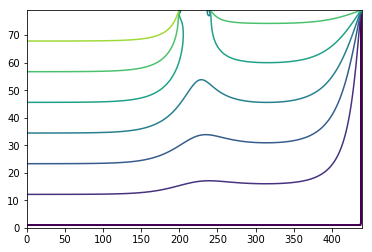

In [97]:
plt.contour(np.flipud(h))